# PROJECT SUMMARY

## GOAL OF PROJECT: BASED ON GIVEN FEATURE OF THE EMPLOYEE DATASET PROVIDED, CREATE A MODEL TO PREDICT THE PERFOMANCE RATING OF EMPLOYEES BASED ON FACTORS AS INPUTS

### INX Future Inc Employee Performance - Project
The Data science project given here is an analysis of employee performance.

### **Project Problem Statement:**
INX Future Inc Employee Performance -  Project INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry. Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points. 

To address the problem, a data science project which analyses the current employee data and finds the core underlying causes of these performance issues will be undertaken. The expectations from the findings of this project will help to facilitate taking the right course of action, while providing clear indicators of non-performing employees, so that any penalization of the non-performing employee, if required, may not significantly affect other employee's morals and further reduce the performance, and also not affect the market perception of best employer and thereby affect attraction of best talents to join the company.

**The Goal and insights of the project are as follows:**

* Department wise performances
* Top 3 Important Factors effecting employee performance
* A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
* Recommendations to improve the employee performance based on insights from analysis


# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly import tools
from plotly.offline import iplot
import ydata_profiling as pp
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats
from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder

# Machine Learning Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# Machine Learning Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_curve, auc, roc_auc_score


# Model Deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

# Import the Dataset

In [2]:
df_emp_performance = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx', sheet_name='INX_Future_Inc_Employee_Perform')

In [3]:
df_emp_performance.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


#### The provided output shows the first 5 rows of the data DataFrame. 

There are 28 Columns:

1. EmpNumber: Employee identification number
2. Age: Age of the employee
3. Gender: Gender of the employee
4. EducationBackground: Educational background
5. MaritalStatus: Marital status
6. EmpDepartment: Department the employee belongs to
7. EmpJobRole: Job role within the department
8. BusinessTravelFrequency: Frequency of business travel
9. DistanceFromHome: Distance from home to work
10. EmpEducationLevel: Education level
11. EmpEnvironmentSatisfaction: Satisfaction with the work environment
12. EmpHourlyRate: Hourly rate
13. EmpJobInvolvement: Involvement in the job
14. EmpJobLevel: Job level
15. EmpJobSatisfaction: Job satisfaction
16. NumCompaniesWorked: Number of companies worked for
17. OverTime: Whether the employee works overtime
18. EmpLastSalaryHikePercent: Percentage of the last salary hike
19. EmpRelationshipSatisfaction: Satisfaction with the relationship with the supervisor
20. TotalWorkExperienceInYears: Total years of work experience
21. TrainingTimesLastYear: Number of training times last year
22. EmpWorkLifeBalance: Work-life balance rating
23. ExperienceYearsAtThisCompany: Years with the current company
24. ExperienceYearsInCurrentRole: Years in the current role
25. YearsSinceLastPromotion: Years since the last promotion
26. YearsWithCurrManager: Years with the current manager   
27. Attrition: Whether the employee has left the company
28. PerformanceRating: Performance rating

Rows:

The first 5 rows represent data for 5 employees. Each row contains information about their attributes, such as age, gender, department, job role, and various performance metrics.

Inference:

Based on this output, it can inferred that the dataset contains information about employees, including demographic data, job-related information, and performance metrics.

# Exploratory Data Analysis

In [4]:
df_emp_performance.shape

(1200, 28)

The dataset contains 1200 rows (observations or samples) and 28 columns (features or variables)

This means that the dataset contains information about 1200 individuals or entities in this case employees, and each entity is described by 28 characteristics or attributes.

In [5]:
df_emp_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#### This provides a concise summary of the DataFrame data. The breakdown of the information is as follows:

A. General Information:

  1. Class: pandas.core.frame.DataFrame - Confirms it's a pandas DataFrame object.
  2. RangeIndex: Shows that the data has an index ranging from 0 to 1199, indicating 1200 rows (observations).

B. Data Columns:

   The table lists all 28 columns in the DataFrame.
   
   For each column:
   1. Column: Name of the column.
   2. Non-Null Count: Number of non-null (not missing) values in the column. All columns seem to have complete data (1200 non-null values).

c. Dtype: Data type of the column.
   1. int64: Integer data type (e.g., Age, DistanceFromHome, various experience measures).
   2. object: String data type (e.g., EmpNumber, Gender, other categorical variables).

D. Memory Usage:

  1. memory usage: This shows the approximate memory footprint of the DataFrame, which is around 262.6 KB in this case.

Inferences:

1. The dataset has 1200 rows and 28 columns.
2. All columns have complete data (no missing values).
3. There's a mix of numerical (integer) and categorical (string) data types in the columns.

In [6]:
df_emp_performance.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

The output df_emp_performance.columns provides a list of all the column names in the DataFrame df_emp_performance. This information is essential for understanding the structure and content of the dataset.

This is the breakdown of the columns:

1. EmpNumber: Employee identification number
2. Age: Age of the employee
3. Gender: Gender of the employee
4. EducationBackground: Educational background
5. MaritalStatus: Marital status
6. EmpDepartment: Department the employee belongs to
7. EmpJobRole: Job role within the department
8. BusinessTravelFrequency: Frequency of business travel
9. DistanceFromHome: Distance from home to work
10. EmpEducationLevel: Education level
11. EmpEnvironmentSatisfaction: Satisfaction with the work environment
12. EmpHourlyRate: Hourly rate
13. EmpJobInvolvement: Involvement in the job
14. EmpJobLevel: Job level
15. EmpJobSatisfaction: Job satisfaction
16. NumCompaniesWorked: Number of companies worked for
17. OverTime: Whether the employee works overtime
18. EmpLastSalaryHikePercent: Percentage of the last salary hike
19. EmpRelationshipSatisfaction: Satisfaction with the relationship with the supervisor
20. TotalWorkExperienceInYears: Total years of work experience
21. TrainingTimesLastYear: Number of training times last year
22. EmpWorkLifeBalance: Work-life balance rating
23. ExperienceYearsAtThisCompany: Years with the current company
24. ExperienceYearsInCurrentRole: Years in the current role
25. YearsSinceLastPromotion: Years since the last promotion
26. YearsWithCurrManager: Years with the current manager   
27. Attrition: Whether the employee has left the company
28. PerformanceRating: Performance rating

This information is crucial for data analysis and modeling, as it helps in understand the available features and their relevance to the problem that is being solved.

In [7]:
df_emp_performance= df_emp_performance.drop('EmpNumber',axis=1)
df_emp_performance.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


The provided output shows the first 5 rows of the DataFrame df_emp_performance after dropping the EmpNumber column.

##### Observations:

* Column Removal: The EmpNumber column has been successfully removed from the DataFrame.
* Remaining Columns: The remaining 27 columns are still present and contain the same information as before, except for the employee identification numbers.
* Data Structure: The DataFrame still has 5 rows and 27 columns, indicating that the data structure remains unchanged.

##### Inferences:

* The removal of the EmpNumber column was necessary since it's not relevant to the analysis or modeling tasks.
* The remaining columns provide information about employee characteristics, job-related factors, and performance metrics.
* This data can be used to analyze employee performance, identify factors influencing attrition, or make informed decisions about human resource management.

In [8]:
df_emp_performance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


##### This provides descriptive statistics for the numerical columns in the DataFrame data.

The breakdown of this is as follows:

Column Names: The first row lists the names of the numerical columns included in the analysis.

Descriptive Statistics:

* count: Number of non-null values in each column (all columns have 1200 non-null values).
* mean: Average value of the column.
* std: Standard deviation (a measure of spread).
* min: Minimum value.
* 25%: First quartile (25% of the data lies below this value).
* 50%: Median (50% of the data lies below this value).
* 75%: Third quartile (75% of the data lies below this value).
* max: Maximum value.

Inferences:

* Age: The average age is 36.92, with a standard deviation of 9.09. The minimum and maximum ages are 18 and 60, respectively.
* DistanceFromHome: The average distance from home is 9.17, with a standard deviation of 8.18. This indicates that employees generally live within a reasonable distance from their workplaces.
* EmpEducationLevel: The average education level is 2.89, suggesting a mix of educational backgrounds.
* EmpEnvironmentSatisfaction: The average satisfaction with the work environment is 2.72, indicating a moderate level of satisfaction overall.
* EmpHourlyRate: The average hourly rate is 65.98, with a standard deviation of 20.21.
* EmpJobInvolvement: The average job involvement is 2.73, indicating a moderate level of involvement.
* EmpJobLevel: The average job level is 2.07, suggesting a mix of job levels within the organization.
* EmpJobSatisfaction: The average job satisfaction is 2.73, indicating a moderate level of satisfaction.
* NumCompaniesWorked: The average number of companies worked for is 2.66, suggesting some job hopping among employees.
* EmpLastSalaryHikePercent: The average salary hike percentage is 15.22%.
* EmpRelationshipSatisfaction: The average satisfaction with the relationship with the supervisor is 2.73, indicating a moderate level of satisfaction.
* TotalWorkExperienceInYears: The average total work experience is 11.33 years.
* TrainingTimesLastYear: The average number of training times last year is 2.79.
* EmpWorkLifeBalance: The average work-life balance rating is 2.78, indicating a moderate level of balance.
* ExperienceYearsAtThisCompany: The average number of years with the current company is 7.08.
* ExperienceYearsInCurrentRole: The average number of years in the current role is 4.11.
* YearsSinceLastPromotion: The average number of years since the last promotion is 2.19.
* YearsWithCurrManager: The average number of years with the current manager is 4.11.
* PerformanceRating: The average performance rating is 2.95, indicating a moderate level of overall performance.

In [9]:
df_emp_performance.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

The output df_emp_performance.isnull().sum() provides a count of missing values in each column of the DataFrame df_emp_performance.

##### Observations:

* All columns have 0 missing values, indicating that the dataset is complete and has no missing data.

##### Inferences:

* The data is clean and can be used for analysis without the need for data imputation or handling missing values.
* This is a positive aspect of the dataset, as it reduces the complexity of data preparation and analysis.

In [10]:
df_emp_performance.duplicated().sum()

0

The dataset has no duplicates 

In [11]:
distinct_values = []
for i in df_emp_performance.columns:
    x = df_emp_performance[i].value_counts().count()
    distinct_values.append(x)
    
pd.DataFrame(distinct_values, index = df_emp_performance.columns, columns = ["Total Distinct Values"])

,Total Distinct Values
Age,43
Gender,2
EducationBackground,6
MaritalStatus,3
EmpDepartment,6
EmpJobRole,19
BusinessTravelFrequency,3
DistanceFromHome,29
EmpEducationLevel,5
EmpEnvironmentSatisfaction,4


The provided code calculates the number of distinct values for each column in the df_emp_performance DataFrame. The output shows the count of distinct values for each column.

##### Observations:

* Categorical Variables: Columns like Gender, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, OverTime, and Attrition have a relatively small number of distinct values, indicating that they have a limited range of categories.
* Numerical Variables: Columns like Age, DistanceFromHome, EmpHourlyRate, TotalWorkExperienceInYears, and TrainingTimesLastYear have a larger number of distinct values, suggesting a wider range of values.
* Ordinal Variables: Columns like EmpEducationLevel, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, EmpRelationshipSatisfaction, and PerformanceRating have a limited number of distinct values, indicating that they represent ordinal or categorical data.   

##### Inferences:

* Data Diversity: The dataset contains a mix of categorical and numerical variables with varying levels of diversity.
* Categorical Features: The categorical variables have a limited number of unique values, which might simplify analysis or modeling.
* Numerical Features: The numerical variables have a wider range of values, suggesting more variability and potential for further analysis.

In [12]:
numerical_cols= df_emp_performance._get_numeric_data().columns
cols= df_emp_performance.columns
categorical_cols=list(set(cols)-set(numerical_cols))

In [13]:
numerical_cols

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

This provides the columns with numerical variables. This information is crucial for data analysis and modeling, as it helps in understanding the available numerical features and their relevance to the problem being solved.

In [14]:
categorical_cols

['OverTime',
 'Attrition',
 'MaritalStatus',
 'BusinessTravelFrequency',
 'EmpJobRole',
 'EducationBackground',
 'Gender',
 'EmpDepartment']

This provides the colums with categorical variables such as text or labels representing different categories.

The breakdown of the categorical columns is as follows:

* MaritalStatus: Marital status of the employee
* EducationBackground: Educational background of the employee
* BusinessTravelFrequency: Frequency of business travel (e.g., "Travel_Rarely", "Travel_Frequently")
* OverTime: Whether the employee works overtime (e.g., "Yes", "No")
* Attrition: Whether the employee has left the company (e.g., "Yes", "No")
* Gender: Gender of the employee (male and female)
* EmpDepartment: Department the employee belongs to (e.g., "sales", "finance", "human resouces")
* EmpJobRole: Job role within the department

This information is crucial for data analysis and modeling, as it helps you understand the available categorical features and their relevance to the problem you're trying to solve.

These categorical columns can be use for tasks such as:

* One-hot encoding: Converting categorical variables into numerical representations that can be used in machine learning models.
* Label encoding: Assigning numerical labels to categorical variables.
* Analyzing categorical distributions: Exploring the frequency of different categories within each column.
* Identifying relationships: Understanding how categorical variables are related to other variables in the dataset.

In [15]:
df_emp_performance['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

This provides output that shows the frequency of different performance ratings in the df_emp_performance DataFrame.

##### Observations:

* Most Common Rating: The performance rating of 3 (likely representing average performance) is the most common, with 874 occurrences.
* Distribution: The distribution is right-skewed, meaning there are more employees with lower ratings compared to higher ratings.
* Outliers: The ratings of 2 and 4 have lower frequencies, indicating that these are less common performance levels.

##### Inferences:

* Performance Focus: The right-skewed distribution suggests that a larger proportion of employees need to improve their performance.
* Performance Management: Organizations might need to focus on strategies to improve the performance of employees with lower ratings.
* High Performers: The presence of a small number of employees with a rating of 4 indicates that there are some high-performing individuals who could serve as role models or mentors.

In [16]:
class_dis = px.histogram(
    data_frame = df_emp_performance,
    y = 'PerformanceRating',
    color = 'PerformanceRating',
    title = 'Performance Rating  Distribution',
    text_auto=True
    )
class_dis.update_layout(showlegend=False)
class_dis.show()
df_emp_performance['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

This shows a bar chart representing the distribution of performance ratings. Here are some key observations:

* Skewed Distribution: The distribution is right-skewed, meaning there is a longer tail on the right side. This indicates that a larger proportion of employees have lower performance ratings compared to higher ratings.
* Most Common Rating: The performance rating of 3 is the most frequent, suggesting that it is the most common performance level.
* Outliers: There are a few outliers on the lower and higher ends of the distribution, indicating that there are some employees with significantly lower or higher performance ratings compared to the majority.

In [17]:
fig = px.pie(data_frame = df_emp_performance, names = 'PerformanceRating', hole = 0.4, title = 'Performance Rating  Percentage Distribution',
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Agsunset)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

The pie chart provides a visual representation of the distribution of performance ratings. Here are some key inferences based on the chart:

##### Distribution:

* Right-Skewed: The distribution is right-skewed, meaning there is a longer tail on the right side. This indicates that a larger proportion of employees have lower performance ratings compared to higher ratings.
* Most Common Rating: The performance rating of 3 is the most common, suggesting that it is the most common performance level.
* Outliers: The ratings of 2 and 4 have lower frequencies, indicating that these are less common performance levels.

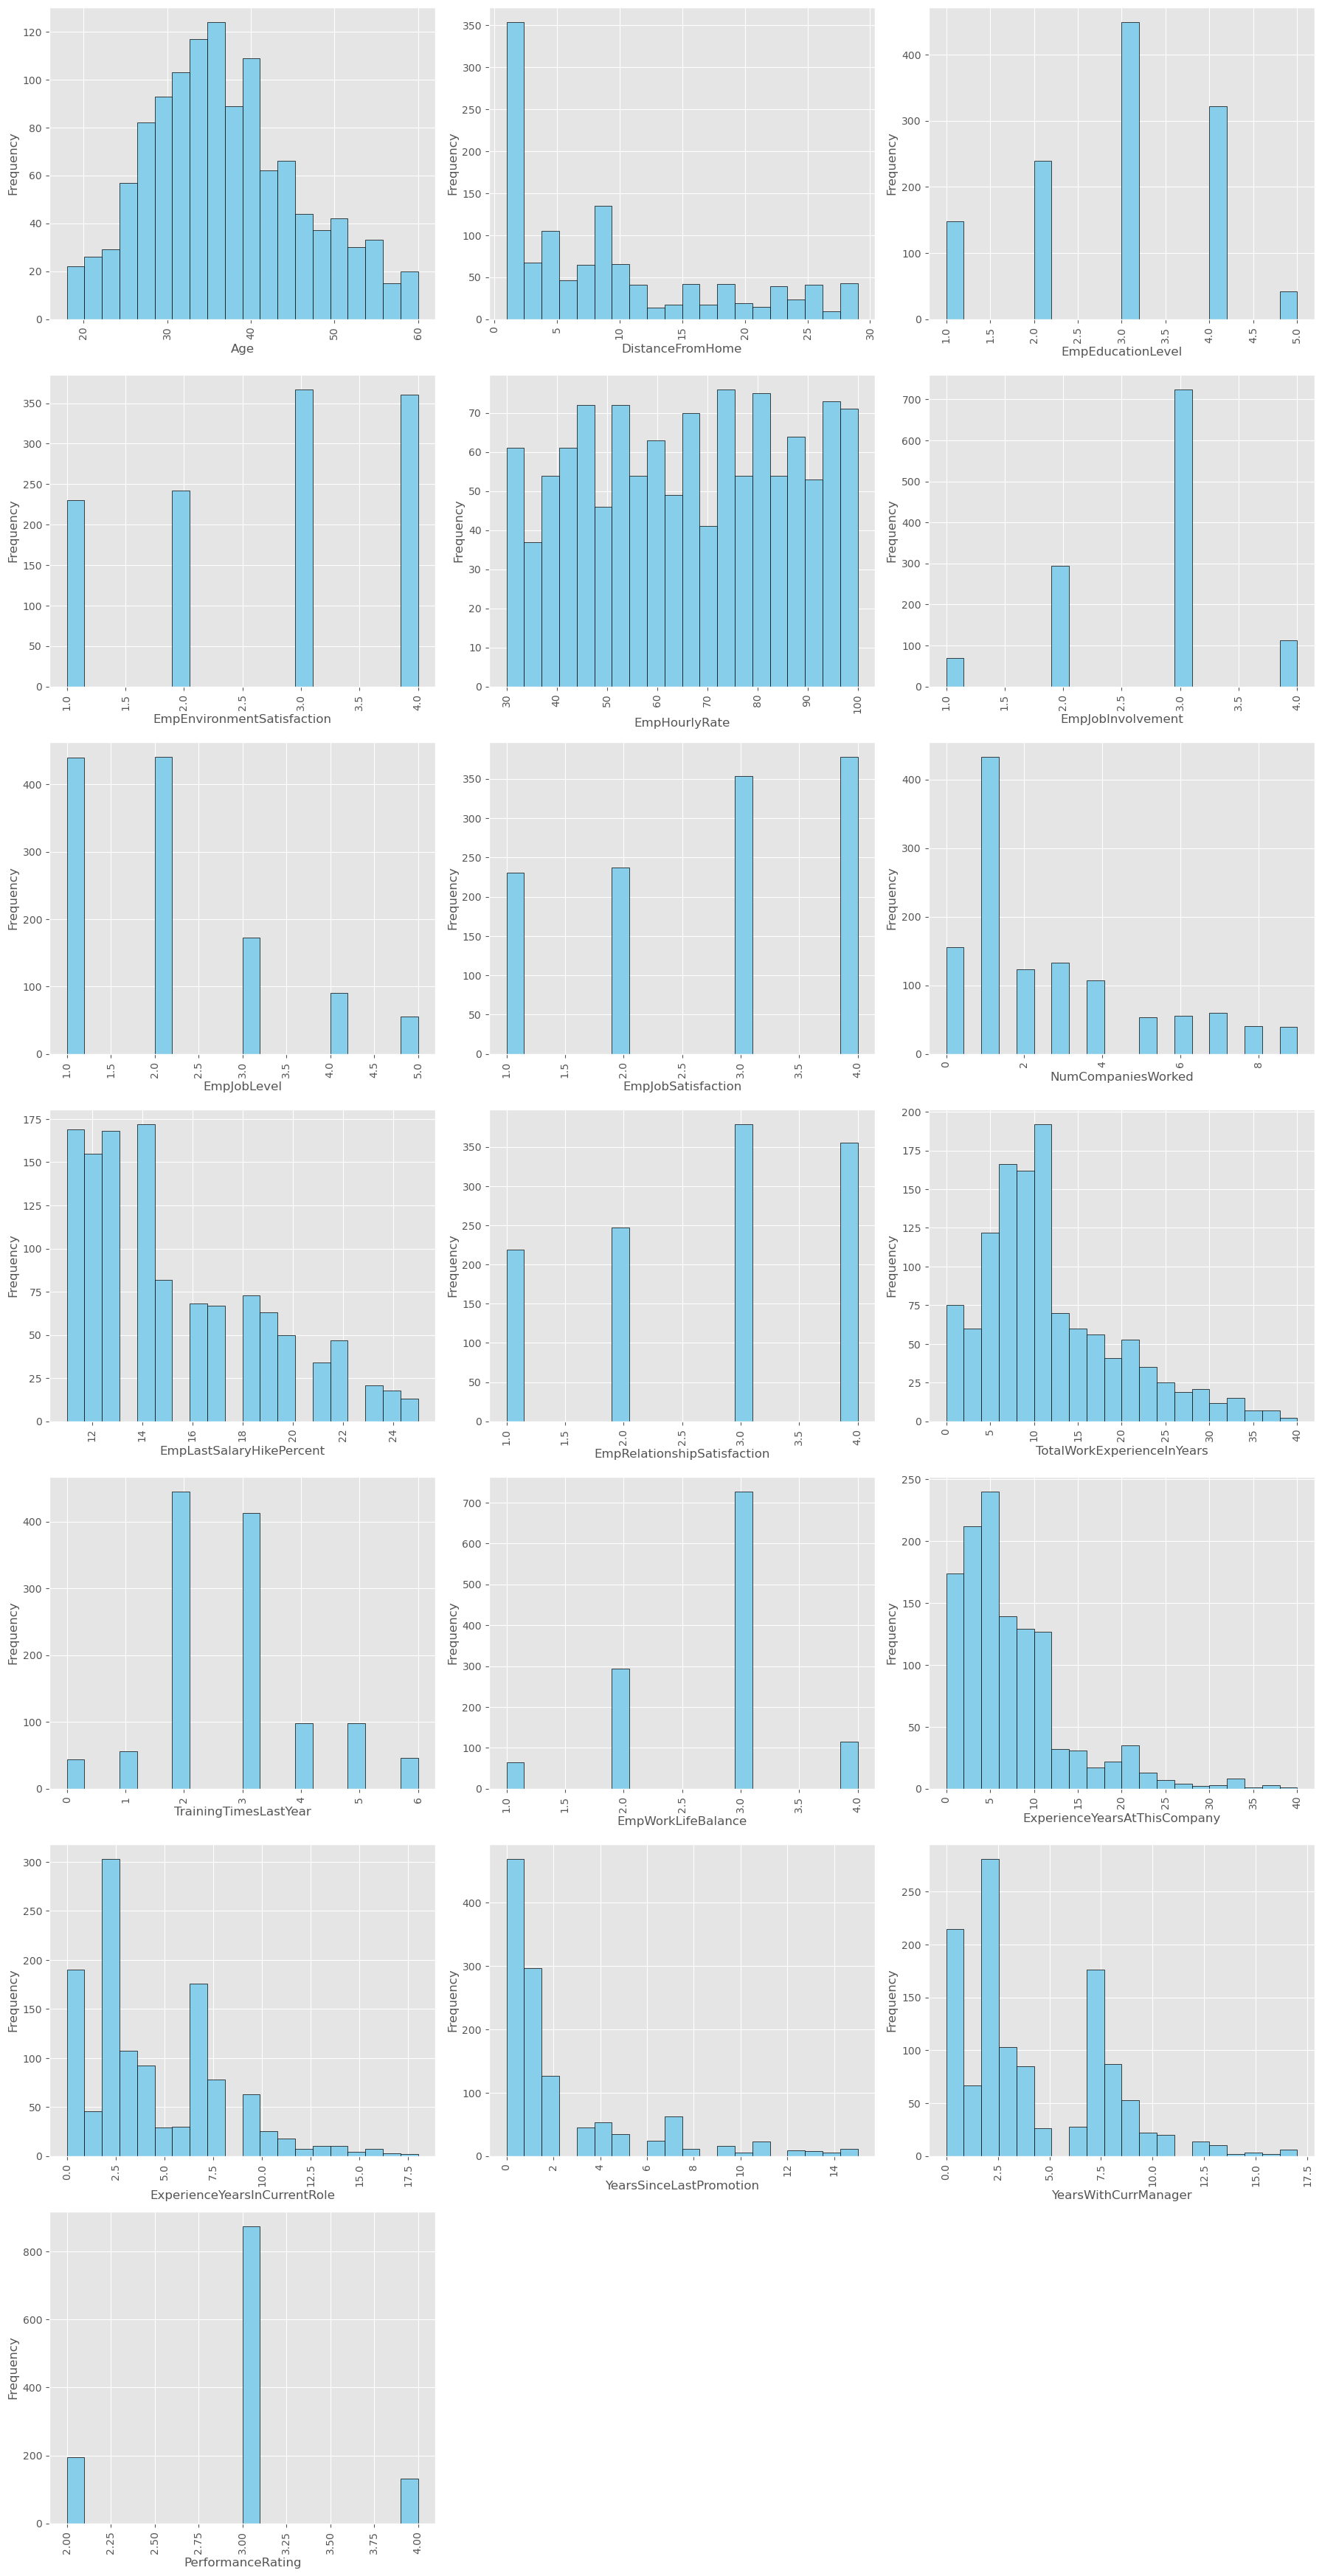

In [18]:
plt.style.use('ggplot')
num_plots = len(numerical_cols)
cols = 3  # Number of columns in subplot grid
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate number of rows needed

plt.figure(figsize=(cols * 6, rows * 5))  # Adjust figure size as needed

for index,column in enumerate(df_emp_performance[numerical_cols]):
    plt.subplot(rows,cols,index+1)
    plt.hist(df_emp_performance[column], bins=20, color='skyblue', edgecolor='black')
    plt.xticks(rotation = 90)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout(pad = 1.0)
plt.show()

The provided image shows a series of histograms, each representing the distribution of a different feature in the dataset. Here are some observations and inferences based on the histograms:

##### General Observations:

* Skewness: Many of the histograms exhibit skewness, indicating that the data is not evenly distributed. Some distributions are right-skewed (e.g., EmpHourlyRate, EmpLastSalaryHikePercent), while others are left-skewed (e.g., NumCompaniesWorked).
* Outliers: Outliers are visible in some histograms, particularly for EmpHourlyRate and EmpLastSalaryHikePercent, suggesting the presence of extreme values.
* Multimodality: A few histograms show multiple peaks (e.g., EmpJobSatisfaction, EmpWorkLifeBalance), indicating that the data might have multiple clusters or groups.

##### Specific Observations:

* Age: The distribution is relatively normal, with a peak around the mid-30s.
* DistanceFromHome: The distribution is right-skewed, with a peak around 10. This suggests that a larger proportion of employees live within a short distance from their workplaces.
* EmpEducationLevel: The distribution is left-skewed, with a peak at 3. This indicates that a larger proportion of employees have higher education levels.
* EmpEnvironmentSatisfaction: The distribution is fairly uniform, with no clear peaks or valleys.
* EmpHourlyRate: The distribution is right-skewed, with a peak around 60-70. This suggests that a larger proportion of employees have lower hourly rates.
* EmpJobInvolvement: The distribution is fairly uniform, with no clear peaks or valleys.
* EmpJobLevel: The distribution is right-skewed, with a peak at 2. This suggests that a larger proportion of employees are at lower job levels.
* EmpJobSatisfaction: The distribution is multimodal, with peaks around 3 and 4. This indicates that there might be two distinct groups of employees with different levels of job satisfaction.
* NumCompaniesWorked: The distribution is right-skewed, with a peak at 1. This suggests that a larger proportion of employees have worked for only one company.
* EmpLastSalaryHikePercent: The distribution is right-skewed, with a peak around 15-20. This suggests that a larger proportion of employees received lower salary hikes.
* EmpRelationshipSatisfaction: The distribution is fairly uniform, with no clear peaks or valleys.
* TotalWorkExperienceInYears: The distribution is right-skewed, with a peak around 10-15. This suggests that a larger proportion of employees have 10-15 years of work experience.
* TrainingTimesLastYear: The distribution is right-skewed, with a peak at 2. This suggests that a larger proportion of employees received 2 training times last year.
* EmpWorkLifeBalance: The distribution is fairly uniform, with no clear peaks or valleys.
* ExperienceYearsAtThisCompany: The distribution is right-skewed, with a peak around 5-10. This suggests that a larger proportion of employees have been with the current company for 5-10 years.
* ExperienceYearsInCurrentRole: The distribution is right-skewed, with a peak around 5-10. This suggests that a larger proportion of employees have been in their current role for 5-10 years.
* YearsSinceLastPromotion: The distribution is right-skewed, with a peak at 0. This suggests that a larger proportion of employees have not been promoted recently.
* YearsWithCurrManager: The distribution is right-skewed, with a peak around 5-10. This suggests that a larger proportion of employees have been working with their current manager for 5-10 years.
* Attrition: The distribution is highly skewed towards "No," indicating that a large majority of employees have not left the company.
* PerformanceRating: The distribution is right-skewed, with a peak at 3. This suggests that a larger proportion of employees have an average performance rating.

##### Inferences:

* Employee Demographics: The data provides insights into the age, education level, and work experience of employees.
* Job Satisfaction and Engagement: The distributions of EmpEnvironmentSatisfaction, EmpJobInvolvement, and EmpJobSatisfaction suggest that a moderate proportion of employees are satisfied with their work environment and jobs.
* Compensation and Performance: The distributions of EmpHourlyRate, EmpLastSalaryHikePercent, and PerformanceRating suggest that a larger proportion of employees have lower hourly rates, lower salary hikes, and average performance ratings.
* Career Progression: The distributions of YearsSinceLastPromotion and YearsWithCurrManager suggest that many employees have not been promoted or worked with their current manager for a long time.
* Retention: The high proportion of employees who have not left the company (indicated by Attrition) might suggest that the organization has effective retention strategies.

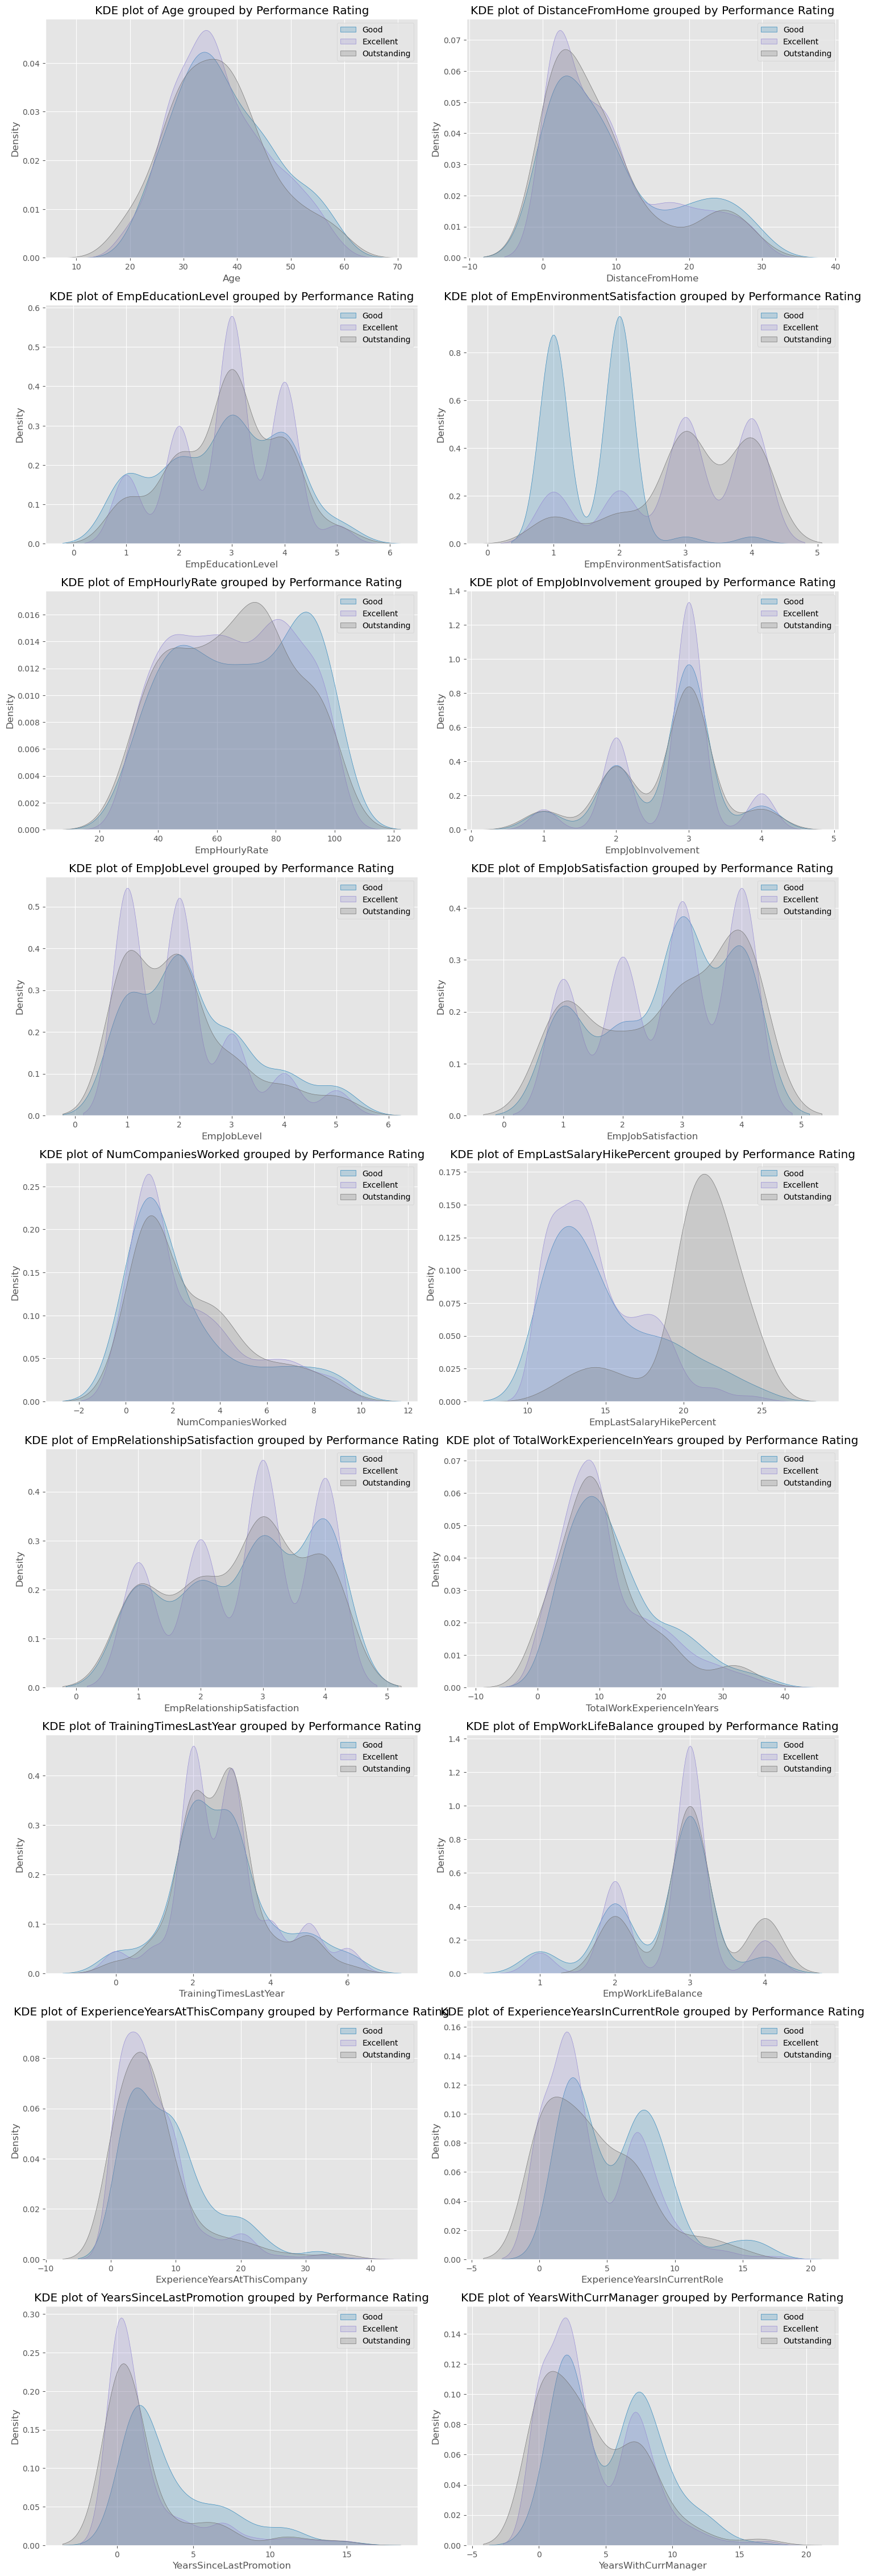

In [19]:
label_map = {'Low': 1, 'Good': 2, 'Excellent': 3, 'Outstanding': 4}
num_columns = len(df_emp_performance[numerical_cols].columns)
num_rows = (num_columns + 1) // 2
numerical_columns = ['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

plt.figure(figsize=(15, 5*num_rows))
for i, column in enumerate(df_emp_performance[numerical_columns]):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df_emp_performance[df_emp_performance['PerformanceRating'] == 1][column], label='Low', fill=True)
    sns.kdeplot(data=df_emp_performance[df_emp_performance['PerformanceRating'] == 2][column], label='Good', fill=True)
    sns.kdeplot(data=df_emp_performance[df_emp_performance['PerformanceRating'] == 3][column], label='Excellent', fill=True)
    sns.kdeplot(data=df_emp_performance[df_emp_performance['PerformanceRating'] == 4][column], label='Outstanding', fill=True)
    plt.title(f'KDE plot of {column} grouped by Performance Rating')
    plt.legend()

plt.tight_layout()
plt.show()

KDE plots, or Kernel Density Estimate plots, are a method to visualize the probability density of a continuous variable. They are a smoothed, continuous version of a histogram, providing an estimate of the distribution of data points in a dataset.
* Purpose: KDE plots are useful for understanding the underlying distribution of data, comparing distributions, and identifying patterns such as skewness or multimodality (multiple peaks).

These plots generated allow for the examination of the distribution of various features for employees across different performance ratings (Good, Excellent, Outstanding). Each plot gives insights into how these features may relate to performance and whether they could be potential indicators of employee success.

From the KDE Plots the following can be inferred:
1. Age
* Observation: The distribution of ages appears to be somewhat consistent across all performance ratings, with most employees being in the 30-50 age range.
* Insight: Age alone does not seem to be a significant differentiator in performance ratings, as the distributions largely overlap.
2. Distance From Home
* Observation: Employees in all performance categories tend to live close to their workplace, with the density decreasing as the distance increases.
* Insight: There is no strong distinction in performance ratings based on the distance from home, as the KDE plots overlap significantly.
3. EmpEducationLevel
* Observation: There are distinct peaks at specific education levels (likely corresponding to different degree levels), but the distributions overlap.
* Insight: Higher education levels might slightly correlate with higher performance ratings, as there’s a slight shift in the peaks for Excellent and Outstanding ratings, but it’s not very pronounced.
4. EmpEnvironmentSatisfaction
* Observation: The satisfaction with the work environment shows multiple peaks, indicating variability in how employees rate their work environment.
* Insight: Employees with Excellent and Outstanding ratings show higher peaks in satisfaction, indicating that those who are more satisfied with their environment tend to perform better.
5. EmpHourlyRate
* Observation: The distribution of hourly rates is consistent across performance ratings, with most employees falling within a similar range.
* Insight: Hourly rate does not seem to be a significant factor in differentiating performance ratings.
6. EmpJobInvolvement
* Observation: Employees with higher job involvement seem to have better performance ratings, as the peaks for Excellent and Outstanding ratings are higher at higher involvement levels.
* Insight: Job involvement appears to be a good predictor of performance, with more involved employees tending to receive higher ratings.
7. EmpJobLevel
* Observation: Higher job levels slightly correlate with higher performance ratings, as the density for Outstanding ratings tends to be higher at higher job levels.
* Insight: Promotion to higher job levels might be associated with better performance, but there’s still overlap, indicating that other factors are also at play.
8. EmpJobSatisfaction
* Observation: There’s a clear trend where higher job satisfaction correlates with higher performance ratings, with distinct peaks for Excellent and Outstanding ratings.
* Insight: Job satisfaction is a strong indicator of performance, suggesting that more satisfied employees are likely to be rated higher.
9. NumCompaniesWorked
* Observation: The number of companies worked for doesn’t seem to show a clear pattern with performance ratings, with overlaps across all groups.
* Insight: This variable doesn’t appear to have a strong influence on performance.
10. EmpLastSalaryHikePercent
* Observation: Employees who received higher salary hikes tend to have higher performance ratings, with the distribution for Outstanding ratings showing a peak at higher hike percentages.
* Insight: Salary hikes might be used as a reward for high performance, and there’s a noticeable distinction for higher ratings.
11.  EmpRelationshipSatisfaction
* Observation: Relationship satisfaction shows a somewhat consistent distribution across all performance ratings, though employees with higher satisfaction seem to have slightly better ratings.
* Insight: Relationship satisfaction might play a minor role in performance but isn’t a strong differentiator.
12. TotalWorkExperienceInYears
* Observation: More experienced employees tend to have slightly higher performance ratings, though the distributions overlap.
* Insight: Experience contributes to performance but is not a sole indicator.
13. TrainingTimesLastYear
* Observation: More frequent training tends to correlate with higher performance ratings, with distinct peaks for Outstanding ratings.
* Insight: Training might be an essential factor in boosting employee performance, as higher training frequency correlates with better ratings.
14. EmpWorkLifeBalance
* Observation: Employees with a better work-life balance tend to have better performance ratings, with higher peaks for higher ratings.
* Insight: Work-life balance is a significant factor in performance, suggesting that employees with a better balance tend to perform better.
15. ExperienceYearsAtThisCompany
* Observation: Longer tenure at the company shows a slight correlation with higher performance ratings, though there is substantial overlap.
* Insight: Experience within the company may contribute to performance, but it’s not a strong predictor alone.
16. ExperienceYearsInCurrentRole
* Observation: The distribution shows that employees with more experience in their current role might receive higher performance ratings.
* Insight: Stability and experience in a role can positively impact performance ratings.
17. YearsSinceLastPromotion
* Observation: Employees who have recently been promoted might have better performance ratings, as there is a shift in the distribution for higher ratings.
* Insight: Promotion timing may relate to performance, possibly due to the motivational effects of promotion.
18. YearsWithCurrManager
* Observation: The longer employees have worked with their current manager, the better their performance ratings tend to be.
* Insight: A stable relationship with a manager might contribute to higher performance, indicating the importance of managerial support.

**Summary**:
The KDE plots reveal that certain features like job involvement, job satisfaction, work-life balance, and training frequency are more strongly associated with higher performance ratings. Other factors, like age, distance from home, and hourly rate, show less differentiation among performance groups. These insights could guide where to focus interventions to improve employee performance, such as enhancing job satisfaction or providing more training opportunities.

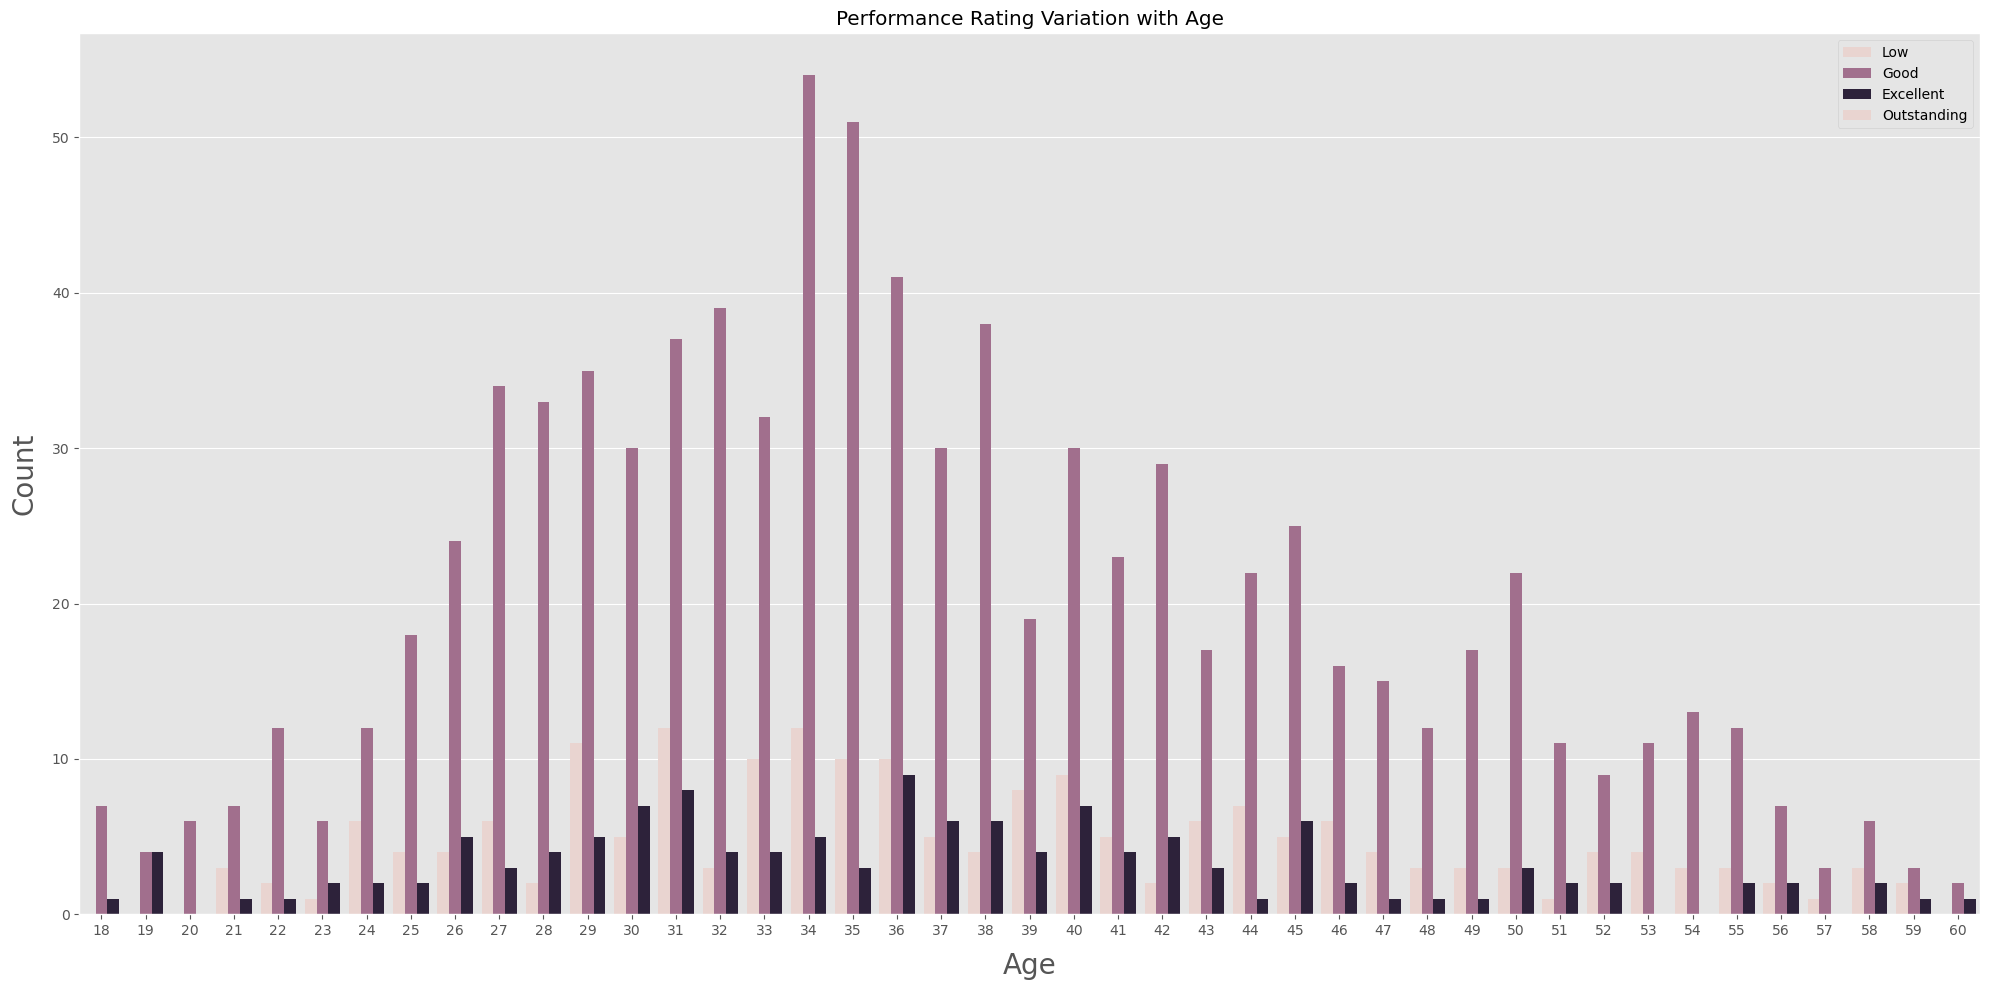

In [20]:
# Age vs Performance Rating Countplot
label_map = {'Low': 1, 'Good': 2, 'Excellent': 3, 'Outstanding': 4}
plt.figure(figsize=(20,10))
sns.countplot(data=df_emp_performance, x='Age',hue='PerformanceRating')
plt.title('Performance Rating Variation with Age')
plt.xlabel("Age",labelpad=10,fontsize=20)
plt.ylabel("Count",labelpad=10,fontsize=20)
plt.legend(label_map)
plt.tight_layout()

The bar chart shows the distribution of employee performance ratings across different ages.

##### Observations:
**Performance Ratings Distribution:**

The performance ratings are categorized into four groups: Low, Good, Excellent, and Outstanding.
The majority of ratings across all age groups fall into the "Good" category (light purple bars).
Fewer employees fall into the "Excellent" and "Outstanding" categories, with the "Outstanding" rating being the least common.

**Age Distribution:**

The number of employees seems to peak around the ages of 26 to 35, with the highest count observed at age 29.
There’s a noticeable decline in the number of employees as age increases beyond 35.

**Performance Trends by Age:**

* Younger Employees (18-25):
More variability in performance ratings, but "Good" ratings still dominate.
There are fewer "Excellent" and "Outstanding" ratings, suggesting that younger employees may be less likely to receive top performance scores.
* Mid-Career Employees (26-35):
A higher concentration of employees, with the majority receiving "Good" ratings.
The distribution of "Excellent" and "Outstanding" ratings starts to increase slightly compared to younger employees.
* Older Employees (36-60):
As age increases, the number of "Good" ratings still dominates, but the proportion of "Low" ratings seems to increase slightly.
The frequency of "Excellent" and "Outstanding" ratings doesn’t seem to show a strong increasing or decreasing trend with age.

##### Insights:
**Peak Productivity Age Range:** The ages 26-35 appear to be the most productive years with the highest number of employees and predominantly good performance ratings. This might suggest that employees in this age group are more experienced and settled in their roles, contributing to consistent performance.

**Potential for Improvement in Younger Employees:** The relatively lower counts of "Excellent" and "Outstanding" ratings among younger employees might indicate a need for additional training, mentorship, or support to help them achieve higher performance levels.

**Maintaining Performance in Older Employees:** While the number of "Good" ratings remains high among older employees, there seems to be an increase in "Low" ratings, indicating that performance might start to dip as employees approach retirement age. This could be an area to explore for targeted interventions to maintain performance.

# Department wise Performance Rating Analysis

In [21]:
# Dataframe to  analyze department-wise performance
dept_df = df_emp_performance.iloc[:,[4,26]].copy()
dept_performance_df = dept_df.copy()

In [22]:
dept_performance_df.head()

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3


In [23]:
# Department Mean performance
dept_performance_df.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

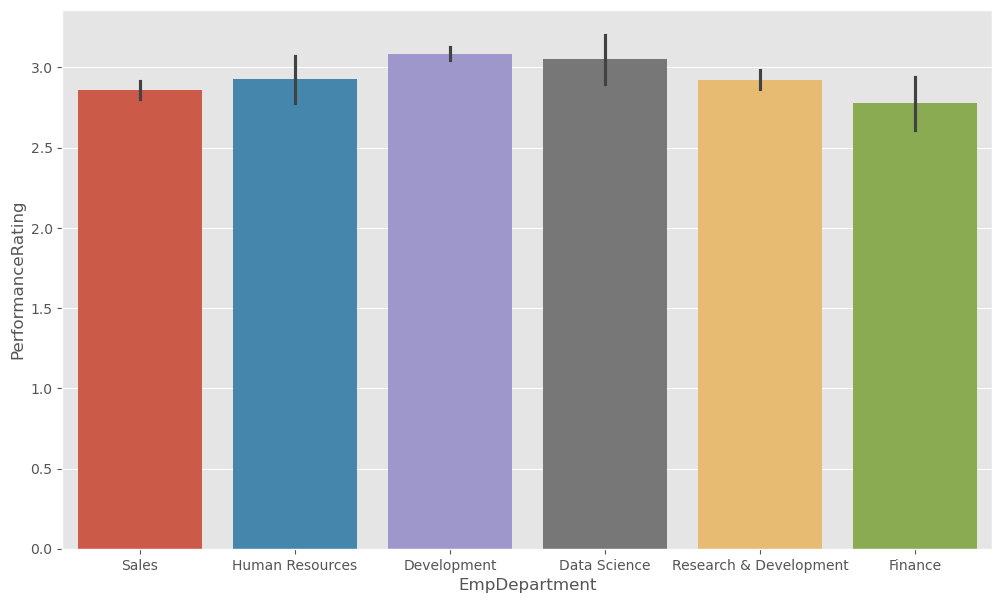

In [24]:
plt.figure(figsize=(12,7))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept_performance_df, hue='EmpDepartment')

The provided bar chart illustrates the average performance ratings across different departments. Here are some key inferences based on the chart:

### The average performance ratings for different departments within an organization. Based on the chart, we can make the following inferences:

1. Data Science and Development: These departments have the highest average performance ratings, suggesting that employees in these roles generally perform well.

2. Human Resources, and Research & Development, and Sales: These departments have the lowest average performance ratings compared to the other departments.

3. Performance Variability: While there are differences between departments, the overall performance ratings are relatively close, indicating a moderate level of variability.

### Recommendations:

1. Investigate High-Performing Departments: Explore the factors contributing to the higher performance in Data Science and Development. This could involve analyzing specific projects, team dynamics, or resource allocation.

2. Address Performance Gaps: Identify the reasons for lower average performance in Human Resources and Research & Development, and Sales. This might involve assessing factors like workload, employee satisfaction, or resource constraints.

3. Benchmarking: Compare the performance of these departments against industry benchmarks or other organizations to gauge their competitiveness.

4. Targeted Interventions: Develop targeted strategies to improve performance in underperforming departments. This could include providing additional training, resources, or support.
Continuous Monitoring: Regularly assess and monitor department performance to identify trends and emerging issues.


In [25]:
# Analyze each department separately
dept_performance_df.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

It appears that all departments have a similar average performance rating of 3.0. This could indicate a few things:

* All departments are performing at an average level.
* There may not be a significant difference in the difficulty of the work performed by each department.


Additional insights that can be gleaned from the data:

* Data Science: The data science department has the least employees with a performance of 3.0 (17) followed by finance (30) and Research & Human Resources (38).
* Development: The development department has the highest total number of ratings (361), which suggests that it may be a large department or one that is involved in many projects.
* Data Science: The Data Science department has the lowest number of ratings (20), which suggests that it may be a small department or one that is involved in the least number of projects.

In [26]:
# Creating a new dataframe to analyze each department separately
df_department = pd.get_dummies(dept_performance_df['EmpDepartment'])
df_performance = pd.DataFrame(dept_performance_df['PerformanceRating'])
df_dept_rating = pd.concat([df_department,df_performance],axis=1)

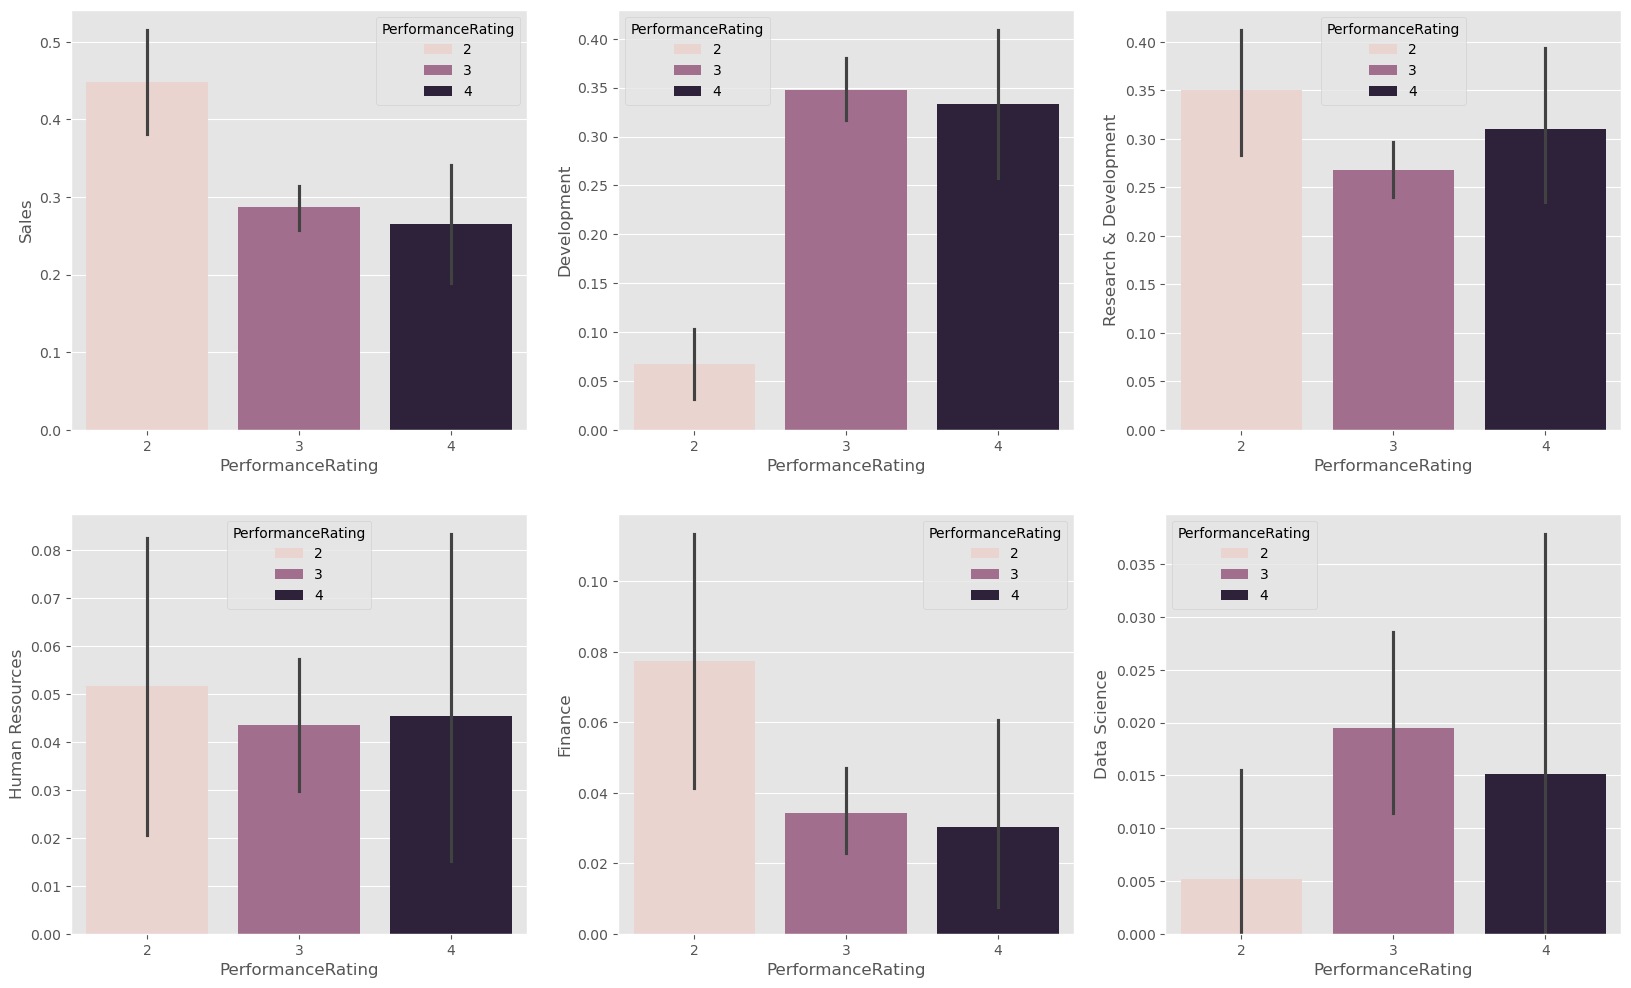

In [27]:
# Plotting Separate bar graphs for each department performance
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='PerformanceRating', y='Sales', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,2)
sns.barplot(x='PerformanceRating', y='Development', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,3)
sns.barplot(x='PerformanceRating', y='Research & Development', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,4)
sns.barplot(x='PerformanceRating', y='Human Resources', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,5)
sns.barplot(x='PerformanceRating', y='Finance', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,6)
sns.barplot(x='PerformanceRating', y='Data Science', data=df_dept_rating, hue='PerformanceRating')
plt.show()

The provided image shows a series of bar charts comparing the distribution of performance ratings across different departments. Here are some key inferences based on the charts:

##### Departmental Differences:

* Development: The "Development" department consistently exhibits the highest proportion of employees with a performance rating of 4, suggesting that it has a strong track record of delivering high-quality work.
* Data Science: Has the least number of individuals with a perfomance rating of 2, suggest that it has a highly skilled workforce.
* Finance and Human Resources: These departments show a more balanced distribution of performance ratings, with a mix of employees achieving different levels of performance.
* Sales and Research & Development: These departments have a relatively high proportion of employees with a performance rating of 2, suggesting that there might be opportunities for improvement in these areas.

##### Overall Performance:

* Performance Distribution: The overall distribution of performance ratings is slightly skewed towards the average rating of 3 end, indicating that a larger proportion of employees have average performance ratings.
* High Performers: There are a few employees in each department who have achieved the highest performance rating (4), suggesting that there are some exceptional performers across the organization.

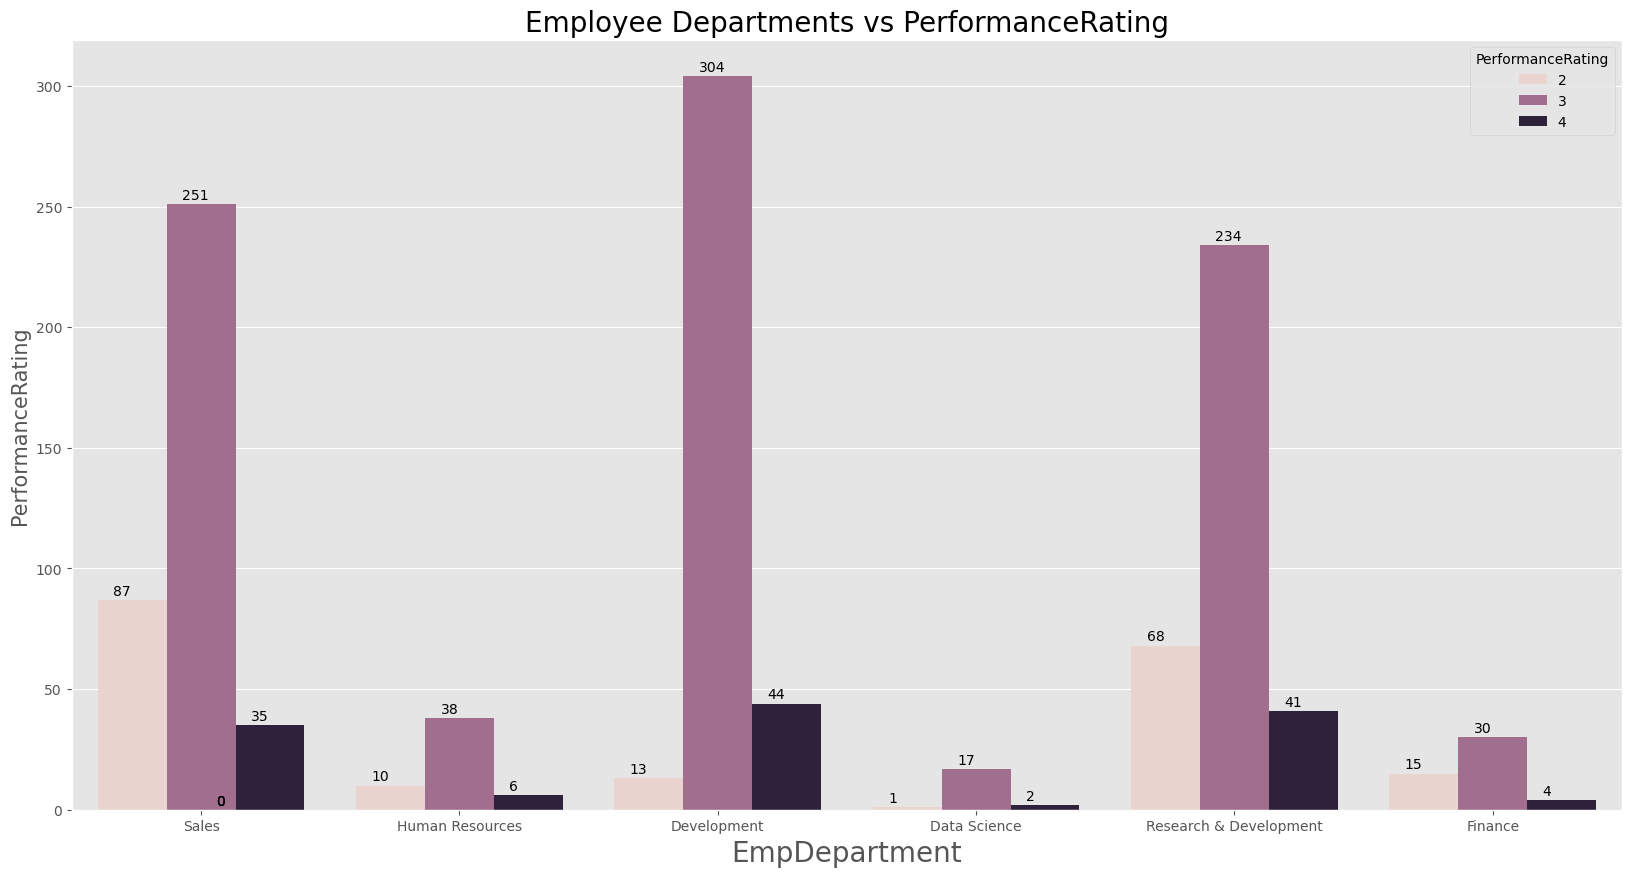

In [28]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=df_emp_performance.PerformanceRating,data=df_emp_performance)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

All departments have a similar average performance rating of 3.0. This could indicate a few things:

#### Observations:

* Departmental Differences: There are significant variations in performance ratings across departments.
* Development: The "Development" department has the highest number of employees with a performance rating of 4, suggesting that this department tends to have a higher concentration of top performers.
* Sales: The "Sales" department has the highest number of employees with a performance rating of 2, indicating that a larger proportion of sales employees might require improvement in their performance.
* Data Science: The "Data Science" department shows a relatively balanced distribution of performance ratings, with a notable number of employees achieving the highest rating.
* Human Resources: The "Human Resources" department has the least overall performance rate among of employees with a performance rating of 3 and above, suggesting that performance in this department might be more challenging or require specific attention.
* Finance: The "Finance" department shows a moderate distribution of performance ratings, with a relatively high number of employees achieving a rating of 3.

#### Inferences:

* Departmental Performance Culture: The differences in performance ratings across departments might indicate varying departmental cultures, expectations, or resource allocation.
* Performance Factors: Specific factors within each department, such as project complexity, team dynamics, or performance metrics, could influence the distribution of performance ratings.
* Targeted Interventions: Departments with lower performance ratings might benefit from targeted interventions to improve employee performance, such as training, coaching, or resource allocation.
* Recognition and Rewards: Recognizing and rewarding high-performing employees in departments with strong performance can foster a positive work environment and motivate others.

In [29]:
# Comparing numerical features with Performance Rating

low = df_emp_performance[df_emp_performance['PerformanceRating'] == 1]
good = df_emp_performance[df_emp_performance['PerformanceRating'] == 2]
excellent = df_emp_performance[df_emp_performance['PerformanceRating'] == 3]
outstanding = df_emp_performance[df_emp_performance['PerformanceRating'] == 4]

# Calculating mean values for numerical columns
numerical_columns = ['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

df_comparison = pd.DataFrame({
    'Metric': numerical_columns,
    'Mean with Low Performance Rating': low[numerical_columns].mean(),
    'Mean with Good Performance Rating': good[numerical_columns].mean(),
    'Mean with Excellent Performance Rating': excellent[numerical_columns].mean(),
    'Mean with Outstanding Performance Rating': outstanding[numerical_columns].mean()
})

df_comparison

,Metric,Mean with Low Performance Rating,Mean with Good Performance Rating,Mean with Excellent Performance Rating,Mean with Outstanding Performance Rating
Age,Age,NaN,37.804124,36.784897,36.500000
DistanceFromHome,DistanceFromHome,NaN,9.835052,9.137300,8.371212
EmpEducationLevel,EmpEducationLevel,NaN,2.829897,2.905034,2.901515
EmpEnvironmentSatisfaction,EmpEnvironmentSatisfaction,NaN,1.582474,2.911899,3.083333
EmpHourlyRate,EmpHourlyRate,NaN,68.216495,65.609840,65.159091
EmpJobInvolvement,EmpJobInvolvement,NaN,2.716495,2.743707,2.674242
EmpJobLevel,EmpJobLevel,NaN,2.304124,2.022883,2.015152
EmpJobSatisfaction,EmpJobSatisfaction,NaN,2.752577,2.723112,2.765152
NumCompaniesWorked,NumCompaniesWorked,NaN,2.572165,2.669336,2.772727
EmpLastSalaryHikePercent,EmpLastSalaryHikePercent,NaN,15.072165,14.427918,20.704545


The provided data shows the average values of various employee attributes grouped by performance rating. 

#### Observations:
1. Age: The mean age for employees with a "Good" rating is slightly higher than for those with "Excellent" and "Outstanding" ratings. There’s a small drop in average age as performance ratings improve from "Good" to "Outstanding".

2. Distance From Home: Employees with higher performance ratings ("Excellent" and "Outstanding") tend to live closer to the workplace compared to those with a "Good" rating. This suggests that shorter commutes might contribute to better performance.

3. EmpEducationLevel: The average education level is relatively consistent across all performance ratings, with only slight increases as performance improves. Education level does not seem to be a strong differentiator of performance.

4. EmpEnvironmentSatisfaction: There’s a notable increase in environment satisfaction as performance ratings improve. Employees with an "Outstanding" rating have the highest environment satisfaction. This suggests a strong correlation between satisfaction with the work environment and higher performance.

5. EmpHourlyRate: Employees with a "Good" rating have the highest average hourly rate, with a slight decrease in the hourly rate as performance ratings increase to "Outstanding". This could indicate that pay rate alone may not be the strongest motivator for top performance.

6. EmpJobInvolvement: Job involvement remains fairly consistent across performance ratings, with minor fluctuations. It appears to be slightly higher for "Good" and "Excellent" ratings. Involvement is less variable, suggesting it may not be the most significant factor driving differences in performance.
 
7. EmpJobLevel: There’s a slight decrease in job level as performance ratings improve from "Good" to "Outstanding". This could imply that top performers are not necessarily in higher-level roles.

8. EmpJobSatisfaction: Job satisfaction is consistent across all performance ratings, with minimal variations. There is a slight increase from "Good" to "Outstanding", indicating a potential link between satisfaction and top performance.

9. NumCompaniesWorked: The number of companies worked for increases slightly as performance ratings improve, suggesting that employees with broader experience across multiple companies might perform better.

10. EmpLastSalaryHikePercent: The last salary hike percent increases significantly for "Outstanding" performers compared to those with lower ratings. This could indicate that higher salary increments are being rewarded to top performers.

11. EmpRelationshipSatisfaction: Relationship satisfaction is relatively consistent across performance ratings, with minimal variation.

12. TotalWorkExperienceInYears: There’s a slight decrease in total work experience as performance ratings improve, indicating that less experienced employees might still perform exceptionally well.

13. TrainingTimesLastYear: Training times are relatively consistent across performance ratings, with slight variations, indicating that the frequency of training might not be a key driver of performance.

14. EmpWorkLifeBalance: Work-life balance satisfaction increases with higher performance ratings, reaching its peak at "Outstanding". This suggests that a better work-life balance is linked to higher employee performance.

15. ExperienceYearsAtThisCompany: Experience at the current company decreases as performance ratings improve. Employees with "Outstanding" ratings have the least experience at the company, which could indicate that newer employees are performing better.

16. ExperienceYearsInCurrentRole: Similar to company experience, years in the current role also decrease as performance ratings improve, suggesting that employees in their roles for shorter durations might be more likely to excel.

17. Years Since Last Promotion: There’s a significant decrease in the number of years since the last promotion as performance ratings improve, which might indicate that more recent promotions are associated with higher performance.

18. Years With Current Manager: Experience with the current manager decreases slightly as performance ratings improve, suggesting that less time with a manager doesn’t necessarily hinder high performance.


In [30]:
df_emp_performance[numerical_columns].corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666


The data provided is about a correlation matrix showing the relationships between different employee-related metrics. Correlation coefficients range from -1 to 1, where:

1 indicates a perfect positive relationship.
0 indicates no relationship.
-1 indicates a perfect negative relationship.

#### Insights:

1. Age:
* Strong positive correlation with TotalWorkExperienceInYears (0.680) and EmpJobLevel (0.509).
* Moderate positive correlation with ExperienceYearsAtThisCompany (0.319).
* Indicates that older employees tend to have more work experience, higher job levels, and longer tenure at the company.

2. EmpJobLevel:
* Strong positive correlation with TotalWorkExperienceInYears (0.784) and ExperienceYearsAtThisCompany (0.540).
* Indicates that employees with higher job levels have more experience both in general and within the company.

3. ExperienceYearsAtThisCompany:
* Very strong positive correlation with ExperienceYearsInCurrentRole (0.764) and YearsWithCurrManager (0.759).
* Indicates that those who have been with the company longer also tend to have more experience in their current role and with their current manager.

4. ExperienceYearsInCurrentRole:
* Strong positive correlation with ExperienceYearsAtThisCompany (0.764) and YearsWithCurrManager (0.729).
* This implies that those who have been in their current role longer also tend to have more experience at the company and more time with their current manager.

5. TotalWorkExperienceInYears:
* Strong positive correlation with ExperienceYearsAtThisCompany (0.634) and EmpJobLevel (0.784).
* Indicates that overall work experience is strongly tied to experience within the company and job level.

6. NumCompaniesWorked:
* Moderate positive correlation with Age (0.284) and TotalWorkExperienceInYears (0.222).
* Suggests that employees who have worked for more companies tend to be older and have more work experience overall.

7. EmpEnvironmentSatisfaction:
* Very low correlations with other metrics, indicating that environmental satisfaction may not be strongly influenced by or influence other employee metrics.

8. EmpLastSalaryHikePercent:
* Very low correlations with other metrics, suggesting that the percentage increase in salary hikes may not be closely related to other factors.

9. EmpJobSatisfaction:
* Almost no correlation with other metrics, suggesting that job satisfaction may not be directly related to the other factors considered.

#### Inferences:
* Experience & Job Level: The correlations suggest that experience (both general and company-specific) plays a significant role in determining job level. 
* Manager Relationship: Strong relationships with managers seem to be correlated with experience in the current role and tenure at the company, which could suggest the importance of stable and supportive manager-employee relationships for long-term retention and performance.
* Satisfaction Metrics: EmpEnvironmentSatisfaction, EmpJobSatisfaction, and EmpLastSalaryHikePercent have low correlations with other factors, indicating that these might be more individual-specific and less influenced by other common metrics.

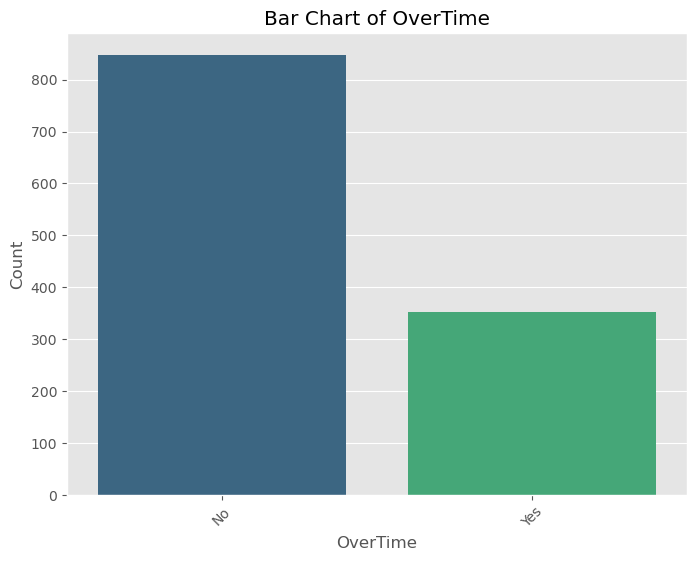

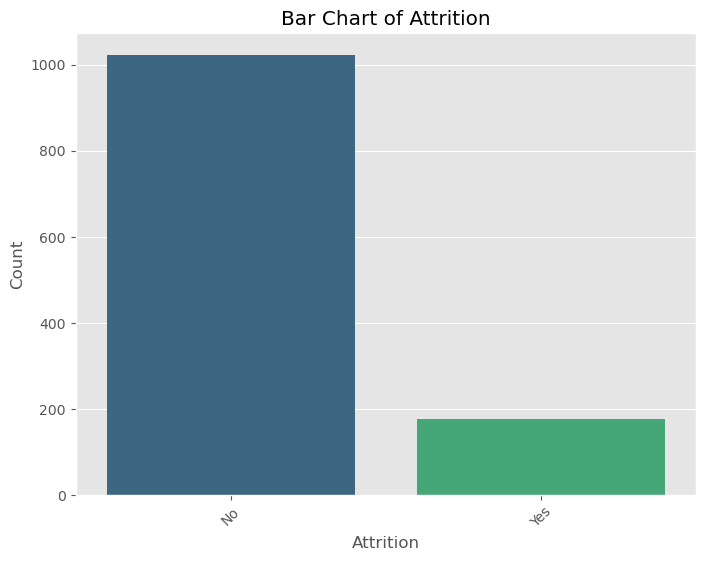

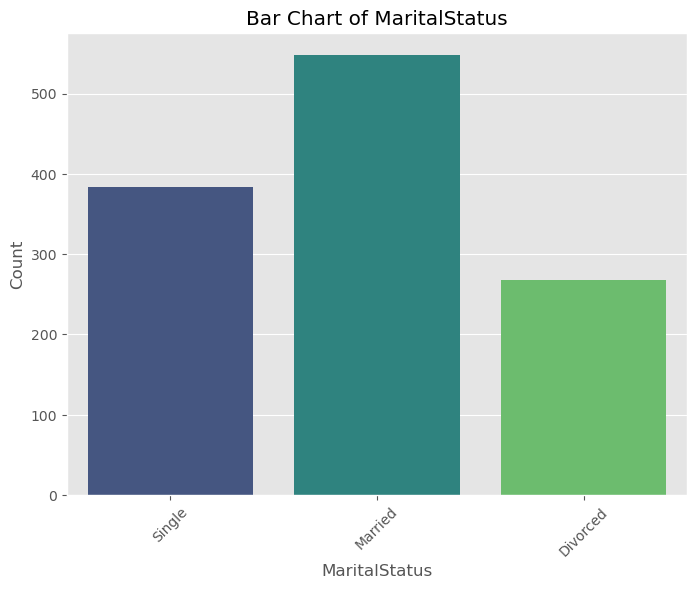

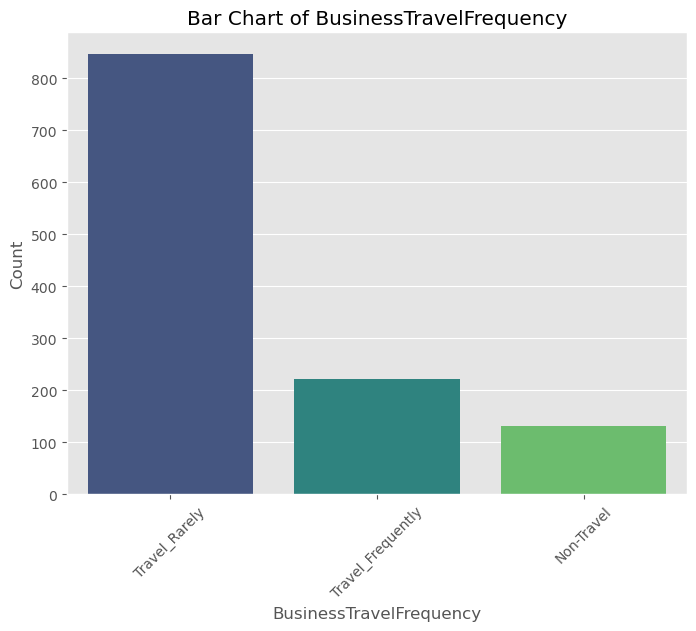

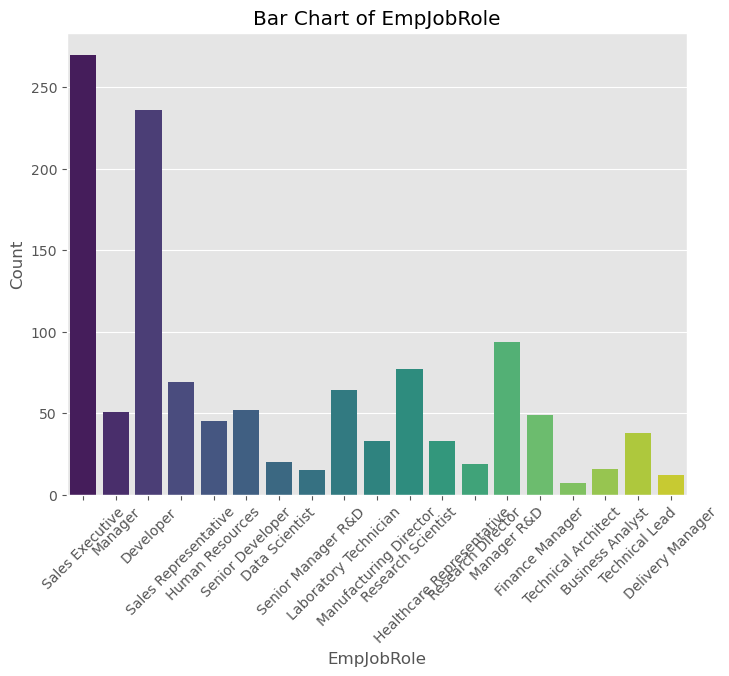

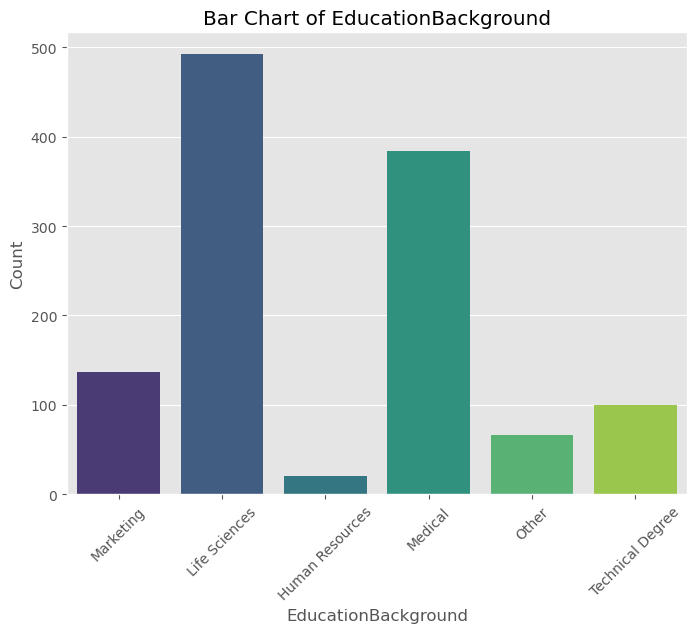

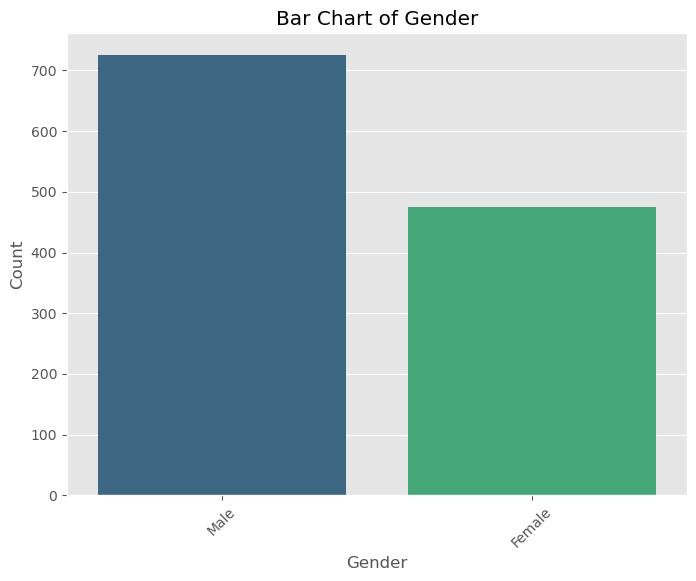

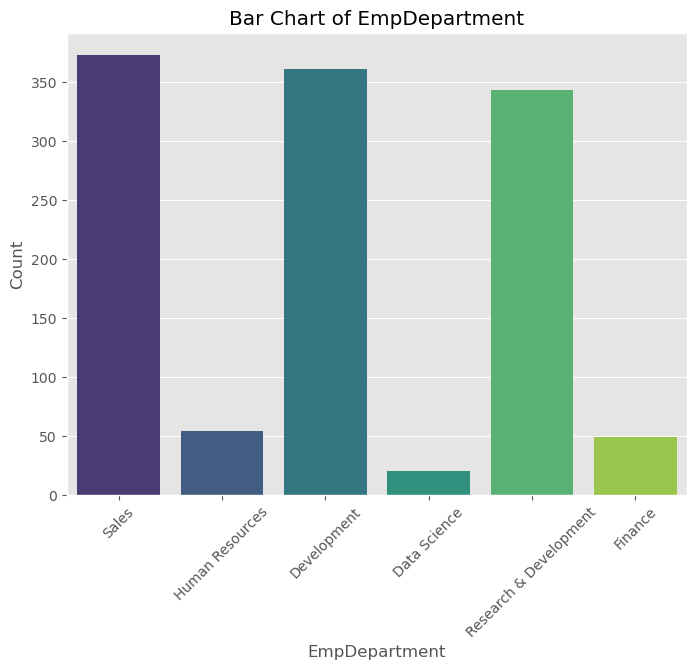

In [31]:
# Plot bar charts for categorical variables
for column in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_emp_performance, palette='viridis')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Here are some key inferences based on the charts:

#### Marital Status Distribution:
* Married: The largest portion of employees are married, followed by single employees.
* Divorced: A smaller percentage of employees are divorced.
#### Inferences:
* Demographics: The majority of employees in the dataset are married, which might reflect the demographics of the population or the organization's hiring practices. 
* Single Employees: The presence of a significant number of single employees suggests that the organization attracts individuals with various marital statuses.

#### Educational backgrounds:
* Dominant Background: "Life Sciences" is the most common educational background, followed by "Marketing".
* Fewer in Other Fields: "Human Resources", "Medical", "Other", and "Technical Degree" have significantly fewer employees.
* Skewed Distribution: The distribution is skewed towards "Life Sciences" and "Marketing", indicating that these fields are more prevalent in the organization.
#### Inferences:
* Organization Focus: The dominance of "Life Sciences" and "Marketing" might suggest that the organization operates in fields related to these areas.
* Talent Acquisition: The distribution indicates that the organization might have a specific focus on recruiting individuals with these educational backgrounds.

#### Distribution of business travel frequency:
* Travel_Rarely: This category has the highest frequency, indicating that a majority of employees travel for business infrequently.
* Travel_Frequently: A smaller number of employees travel frequently.
* Non-Travel: A relatively small portion of employees do not travel for business.
#### Inferences:
* Work Structure: The dominance of "Travel_Rarely" suggests that a significant portion of the workforce might have roles that involve limited or no business travel.

#### Overtime Frequency:
* No Overtime: A significantly larger number of employees do not work overtime compared to those who do.
* Overtime: While a smaller portion of employees do work overtime, it's still a considerable number.
#### Inferences:
* Work-Life Balance: The higher frequency of "No" indicates that a majority of employees prioritize work-life balance or have manageable workloads.
* Workload Demands: The presence of a significant number of employees working overtime suggests that there might be workload pressures or specific job requirements that necessitate additional hours.

#### Attrition Rate:
* Dominant Category: The "No" category has a much higher frequency than the "Yes" category, suggesting that most employees have not left the organization.
#### Inferences:
* Retention: The organisation is able to retain a majority of its workforce indicating a good working environment.

#### Gender:
* Male Dominance: The height of the bar for "Male" is significantly taller than the bar for "Female," indicating that there is a higher proportion of male individuals in the dataset.
* Female Representation: While the number of females is lower than males, it's still a significant portion of the dataset.
#### Inferences:
* Gender Diversity: The dataset contains both male and female individuals, indicating some level of gender diversity.
* Male Dominance: However, the data suggests that males are more prevalent in the dataset.

#### Department Size:
* Sales: The "Sales" department has the largest number of employees.
* Development: The "Development" department has the second-largest number of employees.
Human Resources, Data Science, Research & Development, and Finance: These departments have relatively smaller numbers of employees.
#### Inferences:
* Organizational Focus: The larger size of the "Sales" and "Development" departments might indicate that these areas are crucial to the organization's operations.

#### Job Role Distribution:
* Sales Executive: This is the most common job role, indicating that a significant portion of the workforce is involved in sales activities.
* Managerial Roles: Various managerial roles (e.g., Manager, Senior Manager R&D) are also represented, suggesting a hierarchical organizational structure.
* Technical Roles: Job roles related to development, data science, and technology (e.g., Developer, Data Scientist, Technical Architect) are present, indicating a focus on technical expertise.
* Other Roles: A variety of other roles, such as Human Resources, Laboratory Technician, and Healthcare Representative, are represented, suggesting a diverse range of job functions within the organization.
#### Inferences:
* Organizational Focus: The dominance of sales-related roles might suggest that sales are a key driver of the organization's business.

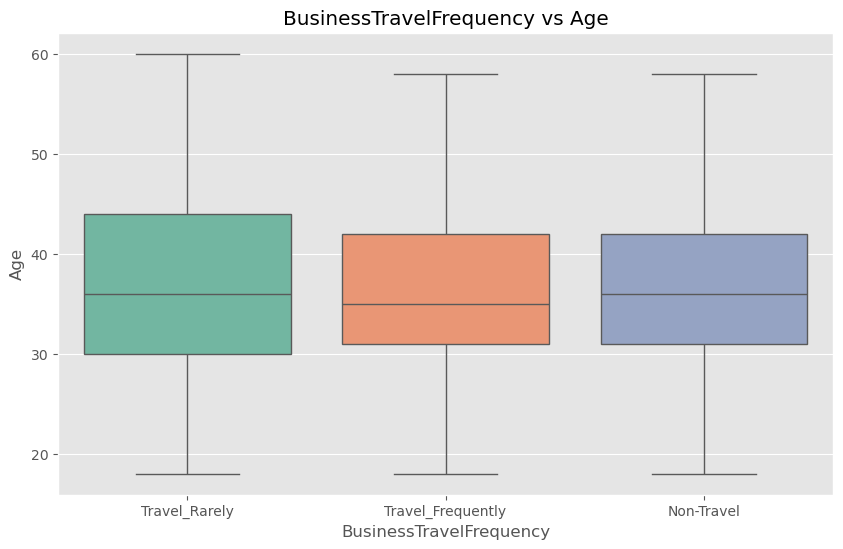

In [32]:
# Plot for BusinessTravelFrequency vs Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='BusinessTravelFrequency', y='Age', hue='BusinessTravelFrequency',data= df_emp_performance, palette='Set2')
plt.title('BusinessTravelFrequency vs Age')
plt.xlabel('BusinessTravelFrequency')
plt.ylabel('Age')
plt.show()


The provided box plot illustrates the relationship between business travel frequency and age.

**Age Distribution:**
* Travel_Rarely: The box plot for "Travel_Rarely" shows a wider range of ages, with a median age around 35. There are some outliers on the higher end, indicating that older employees might be less likely to travel frequently.
* Travel_Frequently: The box plot for "Travel_Frequently" has a narrower range of ages, with a median age around 40. This suggests that employees who travel frequently tend to be in their mid-40s.
* Non-Travel: The box plot for "Non-Travel" shows a wider range of ages, with a median age around 40. There are some outliers on both the lower and higher ends, indicating that age might not be a strong determinant for non-travel.

**Inferences:**
* Age and Travel Frequency: There seems to be a general trend where older employees are less likely to travel frequently, while younger employees might have more flexibility or be assigned roles that require frequent travel.

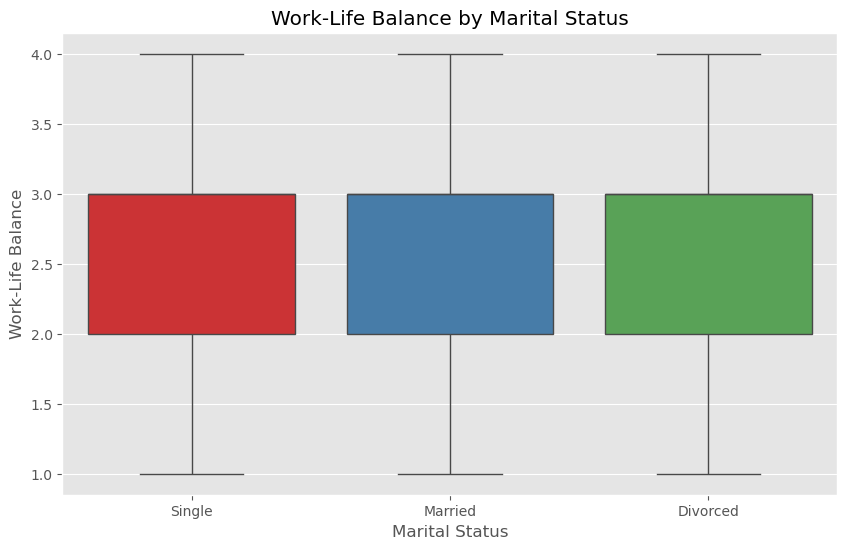

In [33]:
# Plot for Work-Life Balance vs Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalStatus', y='EmpWorkLifeBalance', hue='MaritalStatus', data= df_emp_performance, palette='Set1')
plt.title('Work-Life Balance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Work-Life Balance')
plt.show()


The provided box plot illustrates the relationship between marital status and work-life balance.

**Marital Status and Work-Life Balance:**
* Median Work-Life Balance: The median work-life balance for all three marital statuses appears to be around 2.5, suggesting a relatively similar overall work-life balance across groups.
* Distribution: The distributions of work-life balance for married and divorced individuals seem to be slightly wider than for single individuals, indicating more variation in their work-life balance scores.
* Outliers: There are some outliers present in all three groups, suggesting that there might be individual variations within each marital status.

**Inferences:**
* Marital Status and Work-Life Balance: While there are some individual differences, the overall work-life balance appears to be relatively similar across marital statuses.
* Individual Factors: Other factors besides marital status, such as job role, responsibilities, and personal preferences, might also influence work-life balance.

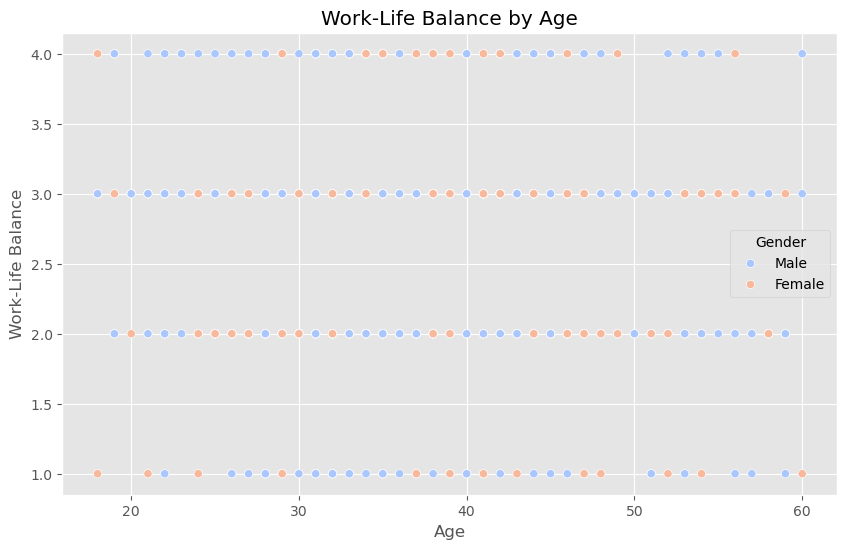

In [34]:
# Plot for Work-Life Balance vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EmpWorkLifeBalance', hue='Gender', data= df_emp_performance, palette='coolwarm')
plt.title('Work-Life Balance by Age')
plt.xlabel('Age')
plt.ylabel('Work-Life Balance')
plt.legend(title='Gender')
plt.show()


The scatter plot titled "Work-Life Balance by Age" shows the relationship between age and work-life balance, with different colors representing gender. 

**General Observations:**
* Limited Variation in Work-Life Balance: The majority of data points are clustered between 2.5 and 4.0 on the y-axis (Work-Life Balance), indicating a relatively narrow range of work-life balance scores.
* No Clear Correlation with Age: There doesn't seem to be a strong linear relationship between age and work-life balance. The data points are scattered across the age range without a clear upward or downward trend.
* Gender Differences: While the plot shows some separation between male and female data points, the differences are not pronounced. There's no strong indication of a significant gender-based difference in work-life balance.

**Inferences:**
* Work-Life Balance Consistency: The limited variation in work-life balance suggests that a majority of employees have relatively consistent levels of work-life balance, regardless of their age.
* Lack of Age-Based Influence: The scatter plot indicates that age might not be a strong predictor of work-life balance in this dataset. Other factors, such as job role, department, or individual characteristics, might have a more significant impact.
* Gender Differences: While there are some indications of gender-based differences, they are not conclusive. Further analysis, such as statistical tests or additional visualizations, would be needed to confirm any significant gender effects.

In [35]:

# Make a copy of the dataset to avoid modifying the original
data = df_emp_performance.copy()

# Perform ANOVA test for Performance Rating and other metrics
anova_results = {}
for metric in ['PerformanceRating', 'EmpJobSatisfaction', 'EmpEnvironmentSatisfaction', 'EmpWorkLifeBalance']:
    groups = [group[metric].values for name, group in data.groupby('EmpDepartment')]
    f_value, p_value = stats.f_oneway(*groups)
    anova_results[metric] = {'F-value': f_value, 'p-value': p_value}

# Print ANOVA results
for metric, results in anova_results.items():
    print(f'ANOVA test for {metric}: F-value = {results["F-value"]:.2f}, p-value = {results["p-value"]:.4f}')
    if results['p-value'] < 0.05:
        print(f"   Significant differences detected in {metric} across departments.")
    else:
        print(f"   No significant differences detected in {metric} across departments.")


ANOVA test for PerformanceRating: F-value = 8.94, p-value = 0.0000
   Significant differences detected in PerformanceRating across departments.
ANOVA test for EmpJobSatisfaction: F-value = 0.43, p-value = 0.8296
   No significant differences detected in EmpJobSatisfaction across departments.
ANOVA test for EmpEnvironmentSatisfaction: F-value = 0.84, p-value = 0.5215
   No significant differences detected in EmpEnvironmentSatisfaction across departments.
ANOVA test for EmpWorkLifeBalance: F-value = 2.22, p-value = 0.0497
   Significant differences detected in EmpWorkLifeBalance across departments.


### ANOVA (Analysis of Variance) is a statistical technique used to determine whether there are significant differences between the means of two or more groups.

#### Key Findings:
1. PerformanceRating: The F-value of 8.94 and p-value of 0.0000 indicate a significant difference in average performance ratings across departments. There are significant differences in PerformanceRating across different departments. This suggests that department affiliation has a notable impact on performance ratings.

2. EmpJobSatisfaction: The F-value of 0.43 and p-value of 0.8296 indicates no significant differences in Job Satisfaction across departments. This implies that employee job satisfaction is relatively uniform across departments.

3. EmpEnvironmentSatisfaction: The F-value of 0.84 and p-value of 0.5215 also indicate no significant differences in Environmental Satisfaction across departments. This indicates that satisfaction with the work environment does not vary significantly by department.

4. EmpWorkLifeBalance: The F-value of 2.22 and p-value of 0.0497 suugests a significant differences in Work-Life Balance across departments. This shows that how employees perceive their work-life balance differs by department.


#### Conclusion
1. There are significant differences in the average performance ratings of employees across different departments. This implies that some departments are performing better than others.

2. There are no significant differences in the average job satisfaction or environment satisfaction across departments.

3. There are significant differences in the average work-life balance across departments, suggesting that employees in some departments have a better work-life balance than others.

Text(0, 0.5, 'Features')

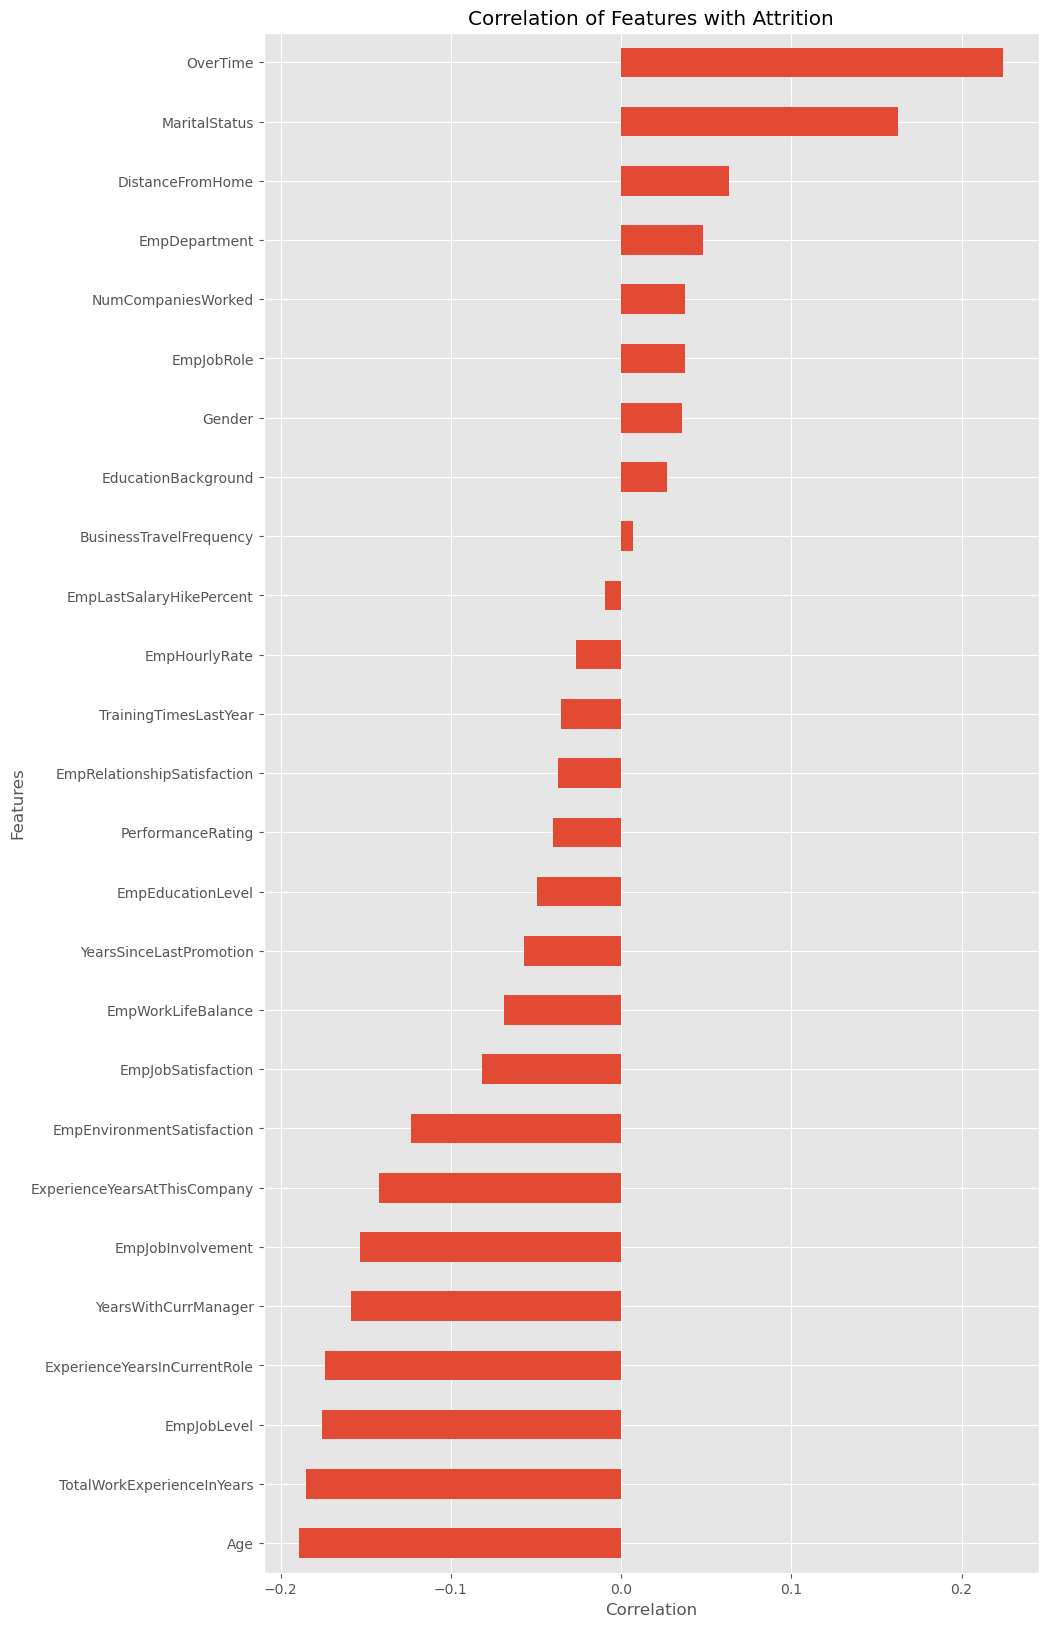

In [36]:
# Define the target column
target = 'Attrition'

# Make a copy of the dataset to avoid modifying the original
data = df_emp_performance.copy()

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != target:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))  # Ensure all values are strings
        label_encoders[column] = le

# Ensure the target column is numeric
data[target] = data[target].apply(lambda x: 1 if x == 'Yes' else 0)  # Assuming 'Yes' means attrition

# Compute correlation of each feature with 'Attrition'
correlation_with_attrition = data.drop(target, axis=1).corrwith(data[target]).sort_values()

# Plot the correlations
plt.figure(figsize=(10, 20))
correlation_with_attrition.plot(kind='barh')
plt.title('Correlation of Features with Attrition')
plt.xlabel('Correlation')
plt.ylabel('Features')

##### Positive vs. Negative Correlation: The direction of the lines might indicate whether the feature is positively or negatively correlated with attrition.
##### Strong negative correlation with job satisfaction, work-life balance, and employee environment satisfaction: Higher levels of these factors are often associated with lower attrition rates.
##### Positive correlation with overtime, distance from home, and job dissatisfaction: These factors might contribute to higher attrition rates.


__Perform Label Encoding on Categorical Features__

In [37]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical values
for col in categorical_cols:
    df_emp_performance[col] = label_encoder.fit_transform(df_emp_performance[col])

In [38]:
df_emp_performance.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


# Check Correlation between Features

In [39]:
df_emp_performance.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561



This matrix shows the correlation coefficients between various features in the dataset, including PerformanceRating and other factors such as Age, Gender, EmpDepartment, etc. Here's a brief overview of how to interpret some of these correlations in relation to PerformanceRating:

* EmpEnvironmentSatisfaction (0.396): This feature has a moderate positive correlation with PerformanceRating, indicating that employees who are more satisfied with their work environment tend to receive higher performance ratings.
* EmpWorkLifeBalance (0.124): This feature has a slight positive correlation with PerformanceRating, suggesting that a better work-life balance might contribute to higher performance ratings.
* EmpJobLevel (-0.0766): There’s a slight negative correlation here, meaning that higher job levels may be associated with slightly lower performance ratings.
* Attrition (-0.0398): The negative correlation between attrition and performance rating is weak but implies that employees who leave may have slightly lower performance ratings.
* ExperienceYearsInCurrentRole (-0.1476) and YearsSinceLastPromotion (-0.1676): These features show a slight negative correlation with PerformanceRating, suggesting that longer tenure in a role or time since the last promotion might be associated with lower performance ratings.

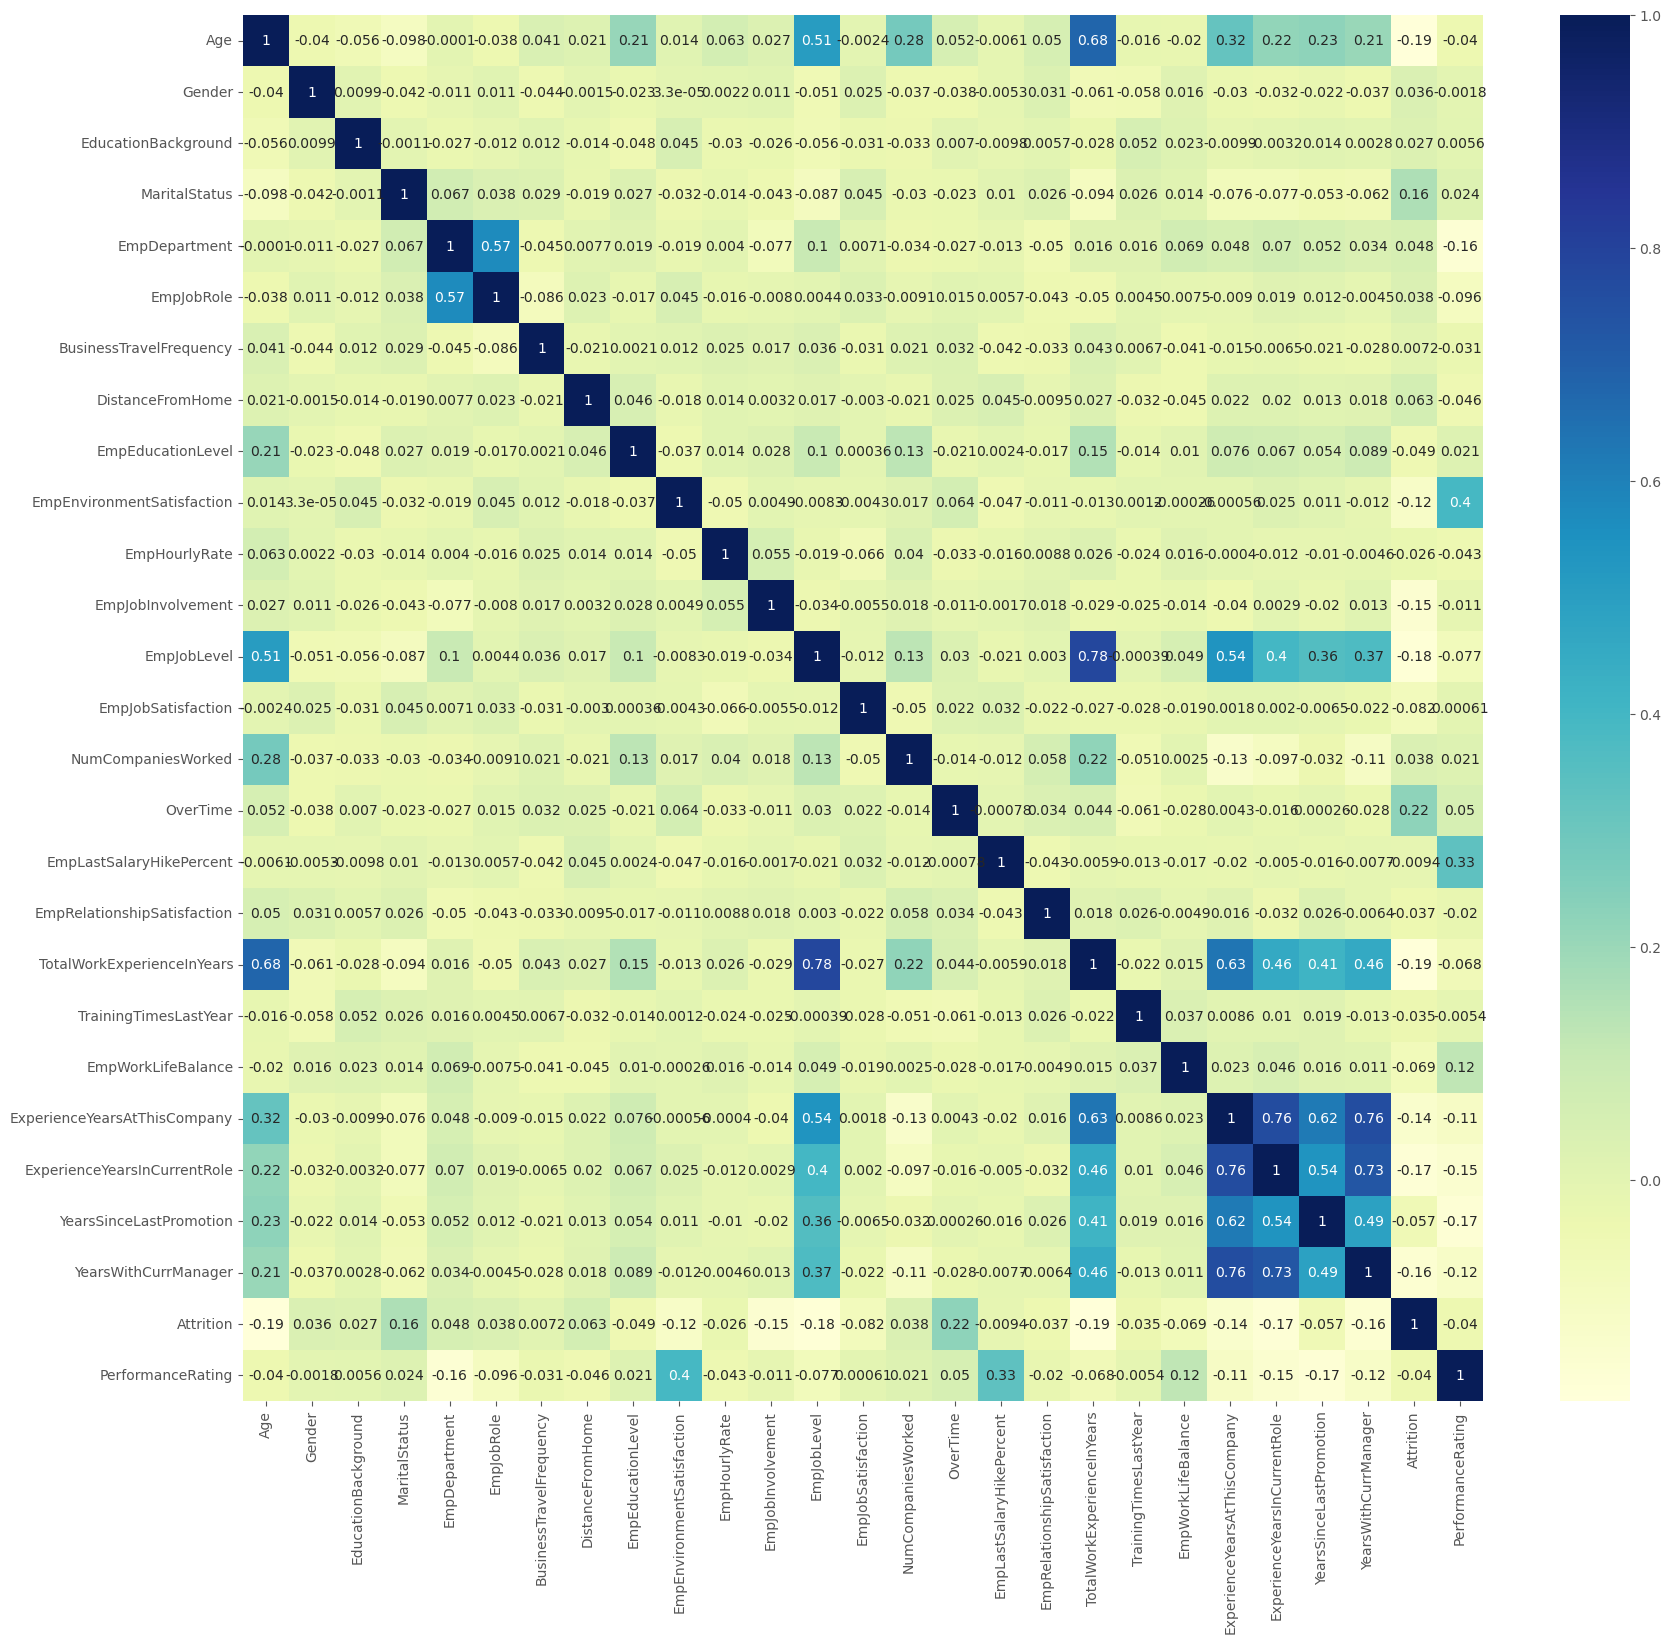

In [40]:
plt.figure(figsize=(20,18))
sns.heatmap(df_emp_performance.corr(), cmap='YlGnBu',annot=True)
plt.show()

The heatmap provides a visual representation of the correlation matrix for the various features in the dataset.

#### Insights:
**PerformanceRating:**
* EmpEnvironmentSatisfaction (0.396): This feature has a moderate positive correlation with PerformanceRating, indicating that higher satisfaction with the work environment is associated with higher performance ratings.
* EmpWorkLifeBalance (0.124): This feature shows a slight positive correlation with PerformanceRating, suggesting that a better work-life balance could contribute to better performance.
* ExperienceYearsAtThisCompany (-0.148) and YearsSinceLastPromotion (-0.168): Both features exhibit a slight negative correlation with PerformanceRating, which might imply that longer tenure in the same role or a longer time since the last promotion could be linked to lower performance ratings.

**Strong Inter-feature Correlations:**
* TotalWorkExperienceInYears and Age (0.68): A strong positive correlation, which is expected as age generally increases with total work experience.
* YearsWithCurrManager and YearsSinceLastPromotion (0.75): Another strong positive correlation, indicating that the time spent with the current manager and the time since the last promotion are closely related.

**Potential Multicollinearity Issues:**
* EmpJobLevel and EmpJobRole (0.57): There is a moderate correlation between job level and job role, which might indicate some overlap in what these features represent.
* YearsSinceLastPromotion and ExperienceYearsInCurrentRole (0.76): High correlation, suggesting that these variables may be capturing similar information.

# Check Correlation between Features and the Target(Performance Rating)

In [41]:
corr = df_emp_performance.corr()
target_corr = df_emp_performance.corr()['PerformanceRating'].drop('PerformanceRating')
target_corr_sorted = target_corr.sort_values(ascending=False)
target_corr_sorted

EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
OverTime                        0.050206
MaritalStatus                   0.024172
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EducationBackground             0.005607
EmpJobSatisfaction              0.000606
Gender                         -0.001780
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
BusinessTravelFrequency        -0.031025
Attrition                      -0.039796
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
EmpJobRole                     -0.096209
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsInCurrentRole   -0.147638
EmpDepartment   

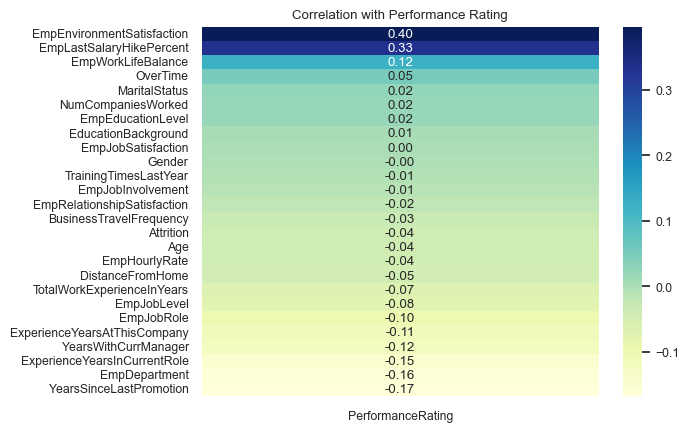

In [42]:
sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), annot=True, fmt='.2f', cmap = 'YlGnBu')
plt.title('Correlation with Performance Rating')
plt.show()


The heatmap provided illustrates the correlation coefficients between various features and PerformanceRating.

#### Observations:
**Strong Positive Correlations:**
* EmpEnvironmentSatisfaction (0.40): The highest correlation, emphasizing the importance of job environment satisfaction in determining employee performance.
* EmpLastSalaryHikePercent (0.33): A significant positive correlation, showing that salary hikes are closely linked with better performance ratings.
* EmpWorkLifeBalance (0.12): While not as strong, this still indicates a positive relationship between work-life balance and performance.

**Weak to Moderate Positive Correlations:**
* OverTime (0.05) and MaritalStatus (0.02): These have weaker positive correlations, suggesting a minimal influence on performance ratings.
* Other features like EmpEducationLevel (0.02), NumCompaniesWorked (0.02), and EducationBackground (0.01) also show weak positive correlations.

**Near Zero or Negative Correlations:**
* Features such as Gender (-0.00), TrainingTimesLastYear (-0.01), and EmpJobInvolvement (-0.01) have correlations close to zero, implying they do not have a significant direct impact on performance ratings.
* YearsSinceLastPromotion (-0.17), EmpDepartment (-0.16), and ExperienceYearsInCurrentRole (-0.15) are among the features with negative correlations, suggesting that longer tenure without promotion or certain departments and roles might correlate with lower performance ratings.

#### Inference
**Critical Features for Performance:**
* The strongest correlations suggest that employee satisfaction with their environment, salary hikes, and work-life balance are crucial factors in driving performance. 
**Potential Areas of Concern:**
* The negative correlations, particularly with promotion-related features, might indicate areas where employees feel stagnant, which could negatively affect their performance. 

In [43]:
X = df_emp_performance.drop('PerformanceRating',axis=1)
y = df_emp_performance['PerformanceRating']

In [44]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0


The list provided represents the correlation coefficients between various features and the target variable, PerformanceRating. These coefficients indicate how strongly and in what direction each feature is related to employee performance.

#### Takeaways:
**Top Positive Correlations:**
* EmpEnvironmentSatisfaction (0.396): The most positively correlated feature, suggesting that employees who are more satisfied with their environment tend to have higher performance ratings.
* EmpLastSalaryHikePercent (0.334): The second strongest positive correlation, indicating that employees who receive higher salary hikes tend to perform better.
* EmpWorkLifeBalance (0.124): Another positive correlation, though weaker, showing that employees with better work-life balance might have higher performance.

**Weak or Negative Correlations:**
* OverTime (0.050), MaritalStatus (0.024), NumCompaniesWorked (0.021): These features have very weak positive correlations, meaning their influence on performance rating is minimal.
* Gender (-0.002), TrainingTimesLastYear (-0.005), EmpJobInvolvement (-0.011): These features have near-zero correlations, indicating no significant relationship with performance.

**Negative Correlations:**
* YearsSinceLastPromotion (-0.168), ExperienceYearsInCurrentRole (-0.148), EmpDepartment (-0.163): These features show slight to moderate negative correlations, suggesting that employees with longer time since their last promotion or those with more years in the same role might be rated lower in performance.
* Age (-0.040), Attrition (-0.040), DistanceFromHome (-0.046): These features have weak negative correlations, implying a slight tendency for performance ratings to decrease with increasing age, attrition risk, or distance from home.

In [45]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [46]:
# Data split for training and testing 
X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(X, y, test_size=0.2, random_state=10) 
X_feature_train.shape, X_feature_test.shape,y_feature_train.shape, y_feature_test.shape

((960, 26), (240, 26), (960,), (240,))

The provided output shows the shapes of the training and testing sets created using the train_test_split function from scikit-learn.

#### The breakdown is as follows:
**X_feature_train: (960, 26)**
This indicates that the training set for the features (independent variables) contains 960 rows (samples) and 26 columns (features).

**X_feature_test: (240, 26)**
This indicates that the testing set for the features contains 240 rows (samples) and 26 columns (features).

**y_feature_train: (960,)**
This indicates that the training set for the target variable (dependent variable) contains 960 rows.

**y_feature_test: (240,)**
This indicates that the testing set for the target variable contains 240 rows.

#### Inferences:
* The dataset has been split into a training set and a testing set with a 80/20 ratio, meaning 80% of the data is used for training and 20% for testing.
* The number of features (26) is consistent across both the training and testing sets, indicating that the same features are used for both.
* The number of samples in the training set is significantly larger than the number of samples in the testing set, which is common in machine learning to ensure adequate training data.

# Apply RFE with Decision Tree Classifier to Select the Top 3 Most ImportantFeatures

Recursive Feature Elimination (RFE) is a feature selection method that helps identify the most important features for predicting a target variable by recursively removing the least important features

In [47]:
from sklearn.feature_selection import RFE

# Step 2: Choose an estimator (model)
#model = LogisticRegression(max_iter=1000)  # Use an appropriate model. Here, Logistic Regression is used.
model = DecisionTreeClassifier(random_state=10)

# Step 3: Apply RFE to select top 3 features
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_feature_train, y_feature_train)

# Step 4: Get the selected features
selected_features = X_feature_train.columns[rfe.support_]

# Display the selected features
print("Selected features by RFE:", selected_features)

Selected features by RFE: Index(['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'YearsSinceLastPromotion'],
      dtype='object')


### TOP THREE FEATURES AFFECTING PERFORMANCE 
The output shows the features selected by the Recursive Feature Elimination (RFE) algorithm. These features are considered the most important in predicting the target variable PerformanceRating.

##### Observations:
**Top 3 Features affecting Performance:**
   - EmpEnvironmentSatisfaction, 
   - EmpLastSalaryHikePercent, and 
   - YearsSinceLastPromotion.
* Feature Importance: These features are likely the most influential factors in predicting performance based on the RFE algorithm.

##### Inferences:
* Employee Satisfaction: Employee satisfaction with the work environment is a significant predictor of performance.
* Compensation: Salary hikes might be a motivating factor for employees and influence their performance.
* Career Progression: Years since last promotion might be a factor affecting performance, potentially indicating that employees who are not promoted might be less motivated or engaged.

# Select the Feature Factors for Model Building

In [48]:
X = df_emp_performance.drop('PerformanceRating',axis=1)
y = df_emp_performance['PerformanceRating']

The purpose of separating the features (X) from the target variable (y) in feature selection is crucial for building and evaluating predictive models. Here’s a detailed explanation of why this separation is important:

1. Understanding Feature Selection: Feature selection is a process of identifying the most relevant features (variables) that contribute to predicting the target variable. By focusing on the most relevant features, model performance can be improved, reduce complexity, and enhance interpretability.

2. Separation of Features and Target Variable: When separation features (X) from the target variable (y) is done, the following is accomplished:

- Model Training
***Training Phase:*** Features (X) are used to train the model to understand patterns and relationships between the input variables and the target variable. This involves feeding the model with data to learn from.
***Target Variable:*** The target variable (y) is what the model aims to predict based on the features. During training, the model learns to map features to the target variable.

- Feature Selection
***Feature Evaluation:*** Feature selection techniques, such as Recursive Feature Elimination (RFE), analyze the impact of each feature on the model's performance. By evaluating features without the target variable being involved directly, it ensures that the selection process is unbiased and purely based on feature relevance.
***Selection Process:*** During feature selection, methods that score or rank features based on their contribution to predicting y are used. This helps in identifying which features are more important and which ones can be discarded to simplify the model.

- Model Validation and Testing
***Consistency:*** Separating features from the target ensures that the evaluation of features and the final model training are consistent. This avoids leakage of information from the target variable into the feature selection process, which ensures that the model generalizes well to unseen data.
***Cross-Validation:*** During cross-validation or model testing, the features and target variable remain separated. This separation helps in evaluating how well the model performs on unseen data and ensures that the feature selection process is not biased.

- Preventing Data Leakage
***Avoiding Leakage:*** By keeping X and y separate, you prevent data leakage, where information from the target variable might inadvertently influence the feature selection process. This ensures that the model is trained and evaluated in a realistic and unbiased manner.

- Enhancing Model Performance
***Improved Accuracy:*** Feature selection helps in improving model accuracy by focusing on the most relevant features and eliminating redundant or irrelevant ones.
***Reduced Overfitting:*** By selecting only the most important features, it reduces the risk of overfitting, where the model performs well on training data but poorly on new, unseen data.

In [49]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0


The dataset X consists of 26 columns, with a mixture of numerical and categorical features. 

##### Feature Analysis
**Numerical Features:**
- Numerical features like Age, DistanceFromHome, and EmpLastSalaryHikePercent provide quantitative measures that could correlate with Attrition. For example, employees with longer commutes or lower salary hikes might have higher attrition rates.
- Features such as EmpEnvironmentSatisfaction and EmpJobSatisfaction capture qualitative aspects of employee experiences that might influence their likelihood to leave the company.

**Categorical Features:**
- Categorical features like Gender, EducationBackground, and EmpDepartment provide insight into the demographic and organizational structure of employees. These features are often encoded for use in machine learning models.
- Variables like EmpJobRole and BusinessTravelFrequency might have different impacts on attrition based on job requirements and travel demands.

In [50]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

The y.head() output shows the first few values of the PerformanceRating column from the dataset.

#### PerformanceRating Analysis
- Values: The output 0 3, 1 3, 2 4, 3 3, 4 3 indicates that PerformanceRating is a categorical variable with integer values. In this case, the values range from 3 to 4.

#### Target Variable:
- PerformanceRating is the target variable, which is being tried to be predicted. It appears to be a performance rating, on a scale (e.g., 1 to 5), but the initial data shows only the values 3 and 4.

# Splitting the Dataset into Training and Test Sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((960, 26), (240, 26), (960,), (240,))

**Interpretation:**
* X_train.shape = (960, 26): This shows that your training data (X_train) contains 960 samples and 26 features.
* X_test.shape = (240, 26): The test data (X_test) contains 240 samples and 26 features.
* y_train.shape = (960,): The training labels (y_train) contain 960 samples, corresponding to the samples in X_train.
* y_test.shape = (240,): The test labels (y_test) contain 240 samples, corresponding to the samples in X_test.

**Why this matters:**
* Data Splitting: The train_test_split function has successfully split the dataset into 80% training data and 20% testing data, based on the test_size=0.2 parameter.

* Balanced Split: Ensuring that the split has the correct dimensions helps confirm that the dataset has been appropriately divided, allowing for robust model training and evaluation.

#### Rationale of splitting using the 80/20 (train/test) method:
The choice of splitting the dataset into training and testing sets, whether 80/20, 70/30, or any other ratio, depends on several factors. Here are the main considerations for each:

1. **Model Training and Evaluation Needs:**
- **80/20 Split:**
***Training Data:*** Using 80% of the data for training allows the model to learn from a larger dataset, which can result in better generalization, especially for complex models.
***Testing Data:** The 20% reserved for testing provides a sufficient dataset to evaluate the model's performance. This split is commonly used when you have a moderately sized dataset.

- **70/30 Split:**
***Training Data:*** Using 70% of the data for training means the model has slightly less data to learn from, which might lead to a minor reduction in performance, but this is not always significant.
***Testing Data:*** With 30% reserved for testing, the evaluation might be more robust, especially if the dataset is relatively small. A larger test set can give more confidence in the model's generalizability.

2. **Dataset Size:**
**Larger Datasets:** If the dataset is large, both 70/30 and 80/20 splits can work effectively. A smaller percentage of a large dataset is still sufficient for robust testing.
**Smaller Datasets:** For smaller datasets, an 80/20 split is usually preferred to ensure the model has enough data to learn from, while still maintaining a reasonably sized test set.

3. **Model Complexity:**
**Simple Models:** Simpler models might not require as much data to train effectively, so a 70/30 split might suffice.
**Complex Models:** More complex models (e.g., deep learning) often benefit from having more data to train on, making an 80/20 split more appropriate.

4. **Cross-Validation Strategy:**
When using cross-validation, the split ratio becomes less critical because the model is trained and evaluated multiple times on different portions of the data. In this case, the 80/20 split is common as it balances training and testing needs without compromising model evaluation.

5. **Purpose of the Model:**
***Generalization Focus:*** If the primary goal is to ensure that the model generalizes well to unseen data, an 80/20 split might be more appropriate.
***Robust Testing:*** If more emphasis is placed on robust evaluation and the dataset is not overly large, a 70/30 split could be justified.

**Conclusion:**
An 80/20 split is generally more popular as it provides a good balance between having enough training data and a sufficient test set. 

# Addressing Imbalance in the Target Variable Classes using SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


SMOTE (Synthetic Minority Over-sampling Technique) was applied to handle class imbalance in your training dataset. 

**Understanding SMOTE (Synthetic Minority Over-sampling Technique):**
- SMOTE is used to generate synthetic samples for the minority class to address class imbalance in the dataset.
- It works by creating new instances by interpolating between existing minority class samples.
- This helps in improving the performance of models that might otherwise be biased towards the majority class.

**Post-SMOTE Dataset:**
- X_train_smote: The training features after applying SMOTE.
- y_train_smote: The training labels after applying SMOTE, which should now have balanced classes.

In [53]:
print(X_train_smote.shape, X_test.shape, y_train_smote.shape, y_test.shape)

(2085, 26) (240, 26) (2085,) (240,)


In [54]:
# Standardization technique is used
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train_smote)
X_test = std_scaler.transform(X_test)

The purpose of using the standardization technique, specifically with StandardScaler, is to ensure that the features in the dataset have a mean of 0 and a standard deviation of 1. 

Here's why this is important:

1. Handling Different Scales:
* Uniform Scale: In many datasets, features can be on different scales (e.g., salary in thousands, age in years). Standardization ensures that all features contribute equally to the model's performance by bringing them to a common scale.
* Avoiding Bias: If features are on different scales, models that rely on distance metrics (e.g., K-Nearest Neighbors (KNN) Classifier, Support Vector Machine (SVM) Classifier) can become biased towards features with larger scales.
2. Improving Model Convergence:
* Faster Convergence: Models that use gradient descent (e.g., logistic regression) can converge faster when the data is standardized because the gradient steps are more evenly distributed.
* Stable Training: Without standardization, the model might struggle to find the optimal solution because features on different scales can lead to erratic updates during training.
3. Enhanced Performance:
* Better Model Performance: For models like K-Nearest Neighbors (KNN) Classifier or Support Vector Machine (SVM) Classifier, standardization can improve performance by ensuring that each feature contributes equally to the prediction.
* Robustness: It makes the model more robust and less sensitive to the variations in data that might otherwise disproportionately influence the results.

- **fit_transform(X_train_smote):** Standardizes the training data by calculating the mean and standard deviation for each feature based on the training set and then applying the transformation.
- **transform(X_test):** Applies the same transformation to the test set using the mean and standard deviation calculated from the training set. This ensures that the test set is scaled consistently with the training set.

In [55]:
X_train.shape, X_test.shape

((2085, 26), (240, 26))

The output (2085, 26) for X_train.shape and (240, 26) for X_test.shape indicates the following:

- X_train: The training dataset has 2,085 samples (rows) and 26 features (columns).
- X_test: The test dataset has 240 samples (rows) and 26 features (columns).

**Implications:**
- Consistent Feature Count: Both the training and test sets have the same number of features (26). This is important because most machine learning models require the training and test sets to have the same number of features.
- Data Split: It suggests that you have split your original dataset into training and test sets, where the majority of the data is used for training (2,085 samples) and a smaller portion for testing (240 samples).

In [56]:
y_train = y_train_smote


The assignment y_train = y_train_smote indicates the setting of the target variable for the training data to the resampled labels obtained from SMOTE (Synthetic Minority Over-sampling Technique).

**Explanation:**
- SMOTE (Synthetic Minority Over-sampling Technique): This technique is used to address class imbalance in your dataset. It generates synthetic samples for the minority class to create a more balanced distribution between the classes.

- y_train_smote: This is the target variable corresponding to X_train_smote, which likely contains the class labels after the application of SMOTE.

**Why this is important:**
- Balanced Classes: By using y_train_smote, it ensures that the training process is exposed to a more balanced set of labels. This helps prevent the model from becoming biased towards the majority class and improves its ability to correctly predict the minority class.

In [57]:
y_train.shape, y_test.shape

((2085,), (240,))

The output ((2085,), (240,)) indicates the shapes of the training and testing target variables (y_train and y_test) after resampling with SMOTE.

**Interpretation:**
- y_train.shape = (2085,): This shows that y_train has 2,085 samples after applying SMOTE. These are the labels corresponding to the training data (X_train_smote), which have been resampled to address class imbalance.

- y_test.shape = (240,): This indicates that y_test contains 240 samples. These are the original test labels corresponding to the test data (X_test).

**Why this matters:**
- The shapes confirm successful split of the dataset into training and testing sets and applied SMOTE to the training set to handle class imbalance. This step is crucial in ensuring that the model is trained on a balanced dataset, which should lead to better generalization and improved performance when making predictions on unseen data.

## Model Selection for evaluation
The following models were selected for evaluation:
1. Random Forest Classifier 
2. Hard Voting Classifier 
3. XGBoost Classifier 
4. Gradient Boosting Classifier 
5. Extra Trees Classifier
6. Decision Tree Classifier
7. Multi-Layer Perceptron Classifier (MLP) 
8. Support Vector Machine (SVM) Classifier 
9. Gaussian Naive Bayes Classifier 
10. Logistic Regression Classifier 
11. K-Nearest Neighbors (KNN) Classifier 


**The following is a comprehensive raationale for model selection:**
When selecting models to evaluate for predicting employee performance based on various input factors, it's essential to consider the strengths, weaknesses, and suitability of each model in the context of the specific problem. 

Below is a detailed rationale for selecting each model for evaluation:

1. **Random Forest Classifier**
**Rationale:**
***Robustness:*** Random Forest is an ensemble method that builds multiple decision trees and merges them to get a more accurate and stable prediction.
***Feature Importance:*** It provides a clear measure of feature importance, which is valuable in understanding which factors most influence employee performance.
***Handling Non-linearity:*** It can handle both linear and non-linear relationships well, making it versatile for complex datasets.
***Overfitting Control:*** By averaging multiple trees, Random Forest reduces the risk of overfitting, which is particularly useful in diverse datasets.

2. **Hard Voting Classifier**
**Rationale:**
***Ensemble Power:*** Combines predictions from multiple models, leading to a more balanced and robust prediction.
***Diversity in Models:*** Hard Voting can incorporate the strengths of various classifiers, leading to improved overall performance by balancing the biases of individual models.
***Stability:*** It often provides better generalization on unseen data, as the ensemble approach reduces the variance.

3. **XGBoost Classifier**
**Rationale:**
***Efficiency and Performance:*** XGBoost is known for its speed and performance, often outperforming other models on structured/tabular datasets.
***Advanced Features:*** Includes regularization to prevent overfitting, and handles missing data inherently.
***Feature Importance:*** Like Random Forest, XGBoost offers insights into feature importance, which helps in understanding key drivers of employee performance.
Scalability: It’s highly scalable, making it suitable for large datasets.

4. **Gradient Boosting Classifier**
**Rationale:**
***Sequential Learning:*** Unlike Random Forest, Gradient Boosting builds trees sequentially, where each tree attempts to correct the errors of the previous one, leading to a highly accurate model.
***Customizable:*** It allows fine-tuning of parameters to optimize performance, making it adaptable to various types of data.
***Good for Imbalanced Data:*** It can handle imbalanced datasets well by focusing more on the harder-to-predict instances.
***Feature Importance:*** Provides insights into the most important features, similar to other tree-based methods.

5. **Extra Trees Classifier**
**Rationale:**
***Randomness:*** Extra Trees introduces more randomness than Random Forest, which can lead to better performance in some datasets.
***Bias-Variance Tradeoff:*** It tends to have lower variance and is less prone to overfitting compared to a standard Decision Tree, though it can be more biased.
***Efficiency:*** Extra Trees can be faster to train than Random Forest due to the randomization in feature splits.

6. **Decision Tree Classifier**
**Rationale:**
***Interpretability:*** Decision Trees are highly interpretable, making them useful for understanding the decision-making process.
***Simplicity:*** It’s a simple model that can serve as a good baseline and is easy to visualize.
***Performance on Small Data:*** It can perform well on smaller datasets, although it is prone to overfitting on larger, complex datasets.

7. **Multi-Layer Perceptron Classifier (MLP)**
**Rationale:**
***Non-Linear Relationships:*** MLP is a type of neural network that can capture complex, non-linear relationships, which may be present in the data.
***Adaptability:*** It can adapt to different types of problems by adjusting the network architecture (e.g., number of layers and neurons).
***Powerful Learning Capabilities:*** It’s capable of learning intricate patterns in data, making it a strong candidate for prediction tasks.

8. **Support Vector Machine (SVM) Classifier**
**Rationale:**
***Margin Maximization:*** SVM focuses on maximizing the margin between classes, which can lead to better generalization.
***Effective in High-Dimensional Spaces:*** SVMs are effective in situations where the number of dimensions exceeds the number of samples.
***Kernel Trick:*** By using different kernels, SVM can handle both linear and non-linear decision boundaries.

9. **Gaussian Naive Bayes Classifier**
**Rationale:**
***Speed:*** Naive Bayes is computationally efficient and can be trained very quickly, making it suitable for real-time predictions.
***Handling of Missing Data:*** It can handle missing data well and is less sensitive to irrelevant features.
***Probabilistic Interpretation:*** Provides a probabilistic output, which can be useful in certain decision-making processes.

10. **Logistic Regression Classifier**
**Rationale:**
***Simplicity:*** Logistic Regression is simple to implement and interpret, providing a good baseline for comparison.
***Binary Classification:*** It’s inherently designed for binary classification tasks, making it a direct fit for predicting outcomes like employee performance (high/low).
***Interpretability:*** The coefficients provide clear insight into how each feature impacts the prediction.

11. **K-Nearest Neighbors (KNN) Classifier**
**Rationale:**
***Instance-Based Learning:*** KNN is a non-parametric, instance-based learning algorithm, which can be useful in situations where the decision boundary is irregular.
***Simplicity:*** Easy to implement and understand, making it a good starting point.
***Flexibility:*** It’s highly flexible as it makes no assumptions about the data distribution, although this can also lead to issues like sensitivity to noise.

**Conclusion:**
* The selected models encompass a wide range of approaches, from simple and interpretable (Logistic Regression, Decision Tree) to complex and powerful (XGBoost, MLP). Ensemble methods (Random Forest, Hard Voting) offer robustness and accuracy, while others like SVM and Naive Bayes provide specialized strengths such as handling high-dimensional data or probabilistic interpretations.

* By evaluating this diverse set of models, we can identify which model(s) best capture the underlying patterns in the employee performance data, considering factors like accuracy, interpretability, training time, and generalizability to unseen data. This thorough approach ensures that the final model selection is based on empirical evidence and aligns with the specific needs of the prediction task.

# Model Building and Training

__1. Logistic Regression__

In [58]:
LR_model = LogisticRegression(random_state=10)

# Train the logistic Regression model
LR_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_LR = LR_model.predict(X_test)

In [59]:
#Perform Logistic Regression Model Evaluation
cm = confusion_matrix(y_test, y_pred_LR)

# Calculate evaluation metrics for multiclass classification
LR_Recall = round(recall_score(y_test, y_pred_LR, average='weighted'), 3)
LR_Precision = round(precision_score(y_test, y_pred_LR, average='weighted'), 3)
LR_f1 = round(f1_score(y_test, y_pred_LR, average='weighted'), 3)
LR_accuracy = round(accuracy_score(y_test, y_pred_LR), 3)

# Plotting the confusion matrix
print(cm)
#sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
print(classification_report(y_test,y_pred_LR))

[[ 24  11   3]
 [ 24 133  22]
 [  2   3  18]]
              precision    recall  f1-score   support

           2       0.48      0.63      0.55        38
           3       0.90      0.74      0.82       179
           4       0.42      0.78      0.55        23

    accuracy                           0.73       240
   macro avg       0.60      0.72      0.64       240
weighted avg       0.79      0.73      0.75       240



In [60]:
LR_df = [(LR_accuracy, LR_Recall, LR_Precision, LR_f1)]

LR_score = pd.DataFrame(data = LR_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
LR_score.insert(0, 'Model', 'Logistic Regression Classifier')
LR_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression Classifier,0.729,0.729,0.791,0.747


__2. K Nearest Neighbors Classifier__

In [61]:
KNN_model = KNeighborsClassifier()

# Train K-Nearest Neighbor Classifer
KNN_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_KNN = KNN_model.predict(X_test)

  File "c:\users\michael\anaconda3\envs\pyspark_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [62]:
#Perform K Nearest Neighbour Model Evaluation
cm = confusion_matrix(y_test, y_pred_KNN)

KNN_Recall = round(recall_score(y_test, y_pred_KNN, average='weighted'),3)
KNN_Precision = round(precision_score(y_test, y_pred_KNN, average='weighted'),3)
KNN_f1 = round(f1_score(y_test, y_pred_KNN, average='weighted'),3)
KNN_accuracy = round(accuracy_score(y_test, y_pred_KNN),3)

print(cm)
print(classification_report(y_test,y_pred_KNN))

[[28  8  2]
 [36 96 47]
 [ 2  5 16]]
              precision    recall  f1-score   support

           2       0.42      0.74      0.54        38
           3       0.88      0.54      0.67       179
           4       0.25      0.70      0.36        23

    accuracy                           0.58       240
   macro avg       0.52      0.66      0.52       240
weighted avg       0.75      0.58      0.62       240



In [63]:
KNN_df = [(KNN_accuracy, KNN_Recall, KNN_Precision, KNN_f1)]

KNN_score = pd.DataFrame(data = KNN_df, columns=
                       ['Accuracy','Recall','Precision','F1 Score'])
KNN_score.insert(0, 'Model', 'K Nearest Neighbour Classifier')
KNN_score

,Model,Accuracy,Recall,Precision,F1 Score
0,K Nearest Neighbour Classifier,0.583,0.583,0.748,0.617


In [64]:
SVM_model = SVC(random_state=10)

# Train Support Vector Machine(SVM)
SVM_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM = SVM_model.predict(X_test)

In [65]:
#Perform Support Vector Machines Model Evaluation
cm = confusion_matrix(y_test, y_pred_SVM)

SVM_Recall = round(recall_score(y_test, y_pred_SVM, average='weighted'),3)
SVM_Precision = round(precision_score(y_test, y_pred_SVM, average='weighted'),3)
SVM_f1 = round(f1_score(y_test, y_pred_SVM, average='weighted'),3)
SVM_accuracy = round(accuracy_score(y_test, y_pred_SVM),3)

print(cm)
print(classification_report(y_test,y_pred_SVM))

[[ 20  17   1]
 [ 13 160   6]
 [  1   9  13]]
              precision    recall  f1-score   support

           2       0.59      0.53      0.56        38
           3       0.86      0.89      0.88       179
           4       0.65      0.57      0.60        23

    accuracy                           0.80       240
   macro avg       0.70      0.66      0.68       240
weighted avg       0.80      0.80      0.80       240



In [66]:
SVM_df = [(SVM_accuracy, SVM_Recall, SVM_Precision, SVM_f1)]

SVM_score = pd.DataFrame(data = SVM_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
SVM_score.insert(0, 'Model', 'Support Vector Machine(SVM) Classifier')
SVM_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Support Vector Machine(SVM) Classifier,0.804,0.804,0.797,0.8


In [67]:
RFC_model =  RandomForestClassifier(random_state=10)

# Train Random Forest Classifier
RFC_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_RFC = RFC_model.predict(X_test)

In [68]:
# Perform Random Forest Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_RFC)

RFC_Recall = round(recall_score(y_test, y_pred_RFC, average='weighted'),3)
RFC_Precision = round(precision_score(y_test, y_pred_RFC, average='weighted'),3)
RFC_f1 = round(f1_score(y_test, y_pred_RFC,  average='weighted'),3)
RFC_accuracy = round(accuracy_score(y_test, y_pred_RFC),3)

print(cm)
print(classification_report(y_test,y_pred_RFC))

[[ 35   3   0]
 [  3 171   5]
 [  0   4  19]]
              precision    recall  f1-score   support

           2       0.92      0.92      0.92        38
           3       0.96      0.96      0.96       179
           4       0.79      0.83      0.81        23

    accuracy                           0.94       240
   macro avg       0.89      0.90      0.90       240
weighted avg       0.94      0.94      0.94       240



In [69]:
RFC_df = [(RFC_accuracy, RFC_Recall, RFC_Precision, RFC_f1)]

RFC_score = pd.DataFrame(data = RFC_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
RFC_score.insert(0, 'Model', 'Random Forest Classifier')
RFC_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Random Forest Classifier,0.938,0.938,0.938,0.938


In [70]:
GBC_model =  GradientBoostingClassifier(random_state=10)

# Train Gradient Boosting Classifier
GBC_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_GBC = GBC_model.predict(X_test)

In [71]:
# Perform Gradient Boosting Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_GBC)

GBC_Recall = round(recall_score(y_test, y_pred_GBC, average='weighted'),3)
GBC_Precision = round(precision_score(y_test, y_pred_GBC, average='weighted'),3)
GBC_f1 = round(f1_score(y_test, y_pred_GBC, average='weighted'),3)
GBC_accuracy = round(accuracy_score(y_test, y_pred_GBC),3)

print(cm)
print(classification_report(y_test,y_pred_GBC))

[[ 34   4   0]
 [  4 168   7]
 [  0   4  19]]
              precision    recall  f1-score   support

           2       0.89      0.89      0.89        38
           3       0.95      0.94      0.95       179
           4       0.73      0.83      0.78        23

    accuracy                           0.92       240
   macro avg       0.86      0.89      0.87       240
weighted avg       0.92      0.92      0.92       240



In [72]:
GBC_df = [(GBC_accuracy, GBC_Recall, GBC_Precision, GBC_f1)]

GBC_score = pd.DataFrame(data = GBC_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
GBC_score.insert(0, 'Model', 'Gradient Boosting Classifier')
GBC_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Gradient Boosting Classifier,0.921,0.921,0.924,0.922


In [73]:
DTC_model = DecisionTreeClassifier(random_state=10)

# Train Decision Tree Model
DTC_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_DTC = DTC_model.predict(X_test)

In [74]:
# Perform Decision Tree Model Evaluation
cm = confusion_matrix(y_test, y_pred_DTC)

DTC_Recall = round(recall_score(y_test, y_pred_DTC, average='weighted'),3)
DTC_Precision = round(precision_score(y_test, y_pred_DTC, average='weighted'),3)
DTC_f1 = round(f1_score(y_test, y_pred_DTC, average='weighted'),3)
DTC_accuracy = round(accuracy_score(y_test, y_pred_DTC),3)

print(cm)
print(classification_report(y_test,y_pred_DTC))

[[ 24   9   5]
 [  7 154  18]
 [  0   5  18]]
              precision    recall  f1-score   support

           2       0.77      0.63      0.70        38
           3       0.92      0.86      0.89       179
           4       0.44      0.78      0.56        23

    accuracy                           0.82       240
   macro avg       0.71      0.76      0.72       240
weighted avg       0.85      0.82      0.83       240



In [75]:
DTC_df = [(DTC_accuracy, DTC_Recall, DTC_Precision, DTC_f1)]

DTC_score = pd.DataFrame(data = DTC_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
DTC_score.insert(0, 'Model', 'Decision Tree Classifier')
DTC_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Decision Tree Classifier,0.817,0.817,0.848,0.826


In [76]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_GNB = GNB_model.predict(X_test)

In [77]:
#Perform Gaussian Naive Bayes Model Evaluation
cm = confusion_matrix(y_test, y_pred_GNB)

GNB_Recall = round(recall_score(y_test, y_pred_GNB, average='weighted'),3)
GNB_Precision = round(precision_score(y_test, y_pred_GNB, average='weighted'),3)
GNB_f1 = round(f1_score(y_test, y_pred_GNB, average='weighted'),3)
GNB_accuracy = round(accuracy_score(y_test, y_pred_GNB),3)

print(cm)
print(classification_report(y_test,y_pred_GNB))

[[ 23  15   0]
 [ 13 142  24]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.62      0.61      0.61        38
           3       0.88      0.79      0.84       179
           4       0.43      0.78      0.55        23

    accuracy                           0.76       240
   macro avg       0.64      0.73      0.67       240
weighted avg       0.80      0.76      0.77       240



In [78]:
GNB_df = [(GNB_accuracy, GNB_Recall, GNB_Precision, GNB_f1)]

GNB_score = pd.DataFrame(data = GNB_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
GNB_score.insert(0, 'Model', 'Gaussian Naive Bayes Classifier')
GNB_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Gaussian Naive Bayes Classifier,0.762,0.762,0.797,0.773


In [79]:
MLP_model = MLPClassifier(random_state=10)

# Train MLP Classifier
MLP_model.fit(X_train,y_train)

#Perform prediction on test set
y_pred_MLP = MLP_model.predict(X_test)

In [80]:
# Perform MLP Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_MLP)

MLP_Recall = round(recall_score(y_test, y_pred_MLP, average='weighted'),3)
MLP_Precision = round(precision_score(y_test, y_pred_MLP, average='weighted'),3)
MLP_f1 = round(f1_score(y_test, y_pred_MLP, average='weighted'),3)
MLP_accuracy = round(accuracy_score(y_test, y_pred_MLP),3)

print(cm)
print(classification_report(y_test,y_pred_MLP))

[[ 26   9   3]
 [ 16 153  10]
 [  1   7  15]]
              precision    recall  f1-score   support

           2       0.60      0.68      0.64        38
           3       0.91      0.85      0.88       179
           4       0.54      0.65      0.59        23

    accuracy                           0.81       240
   macro avg       0.68      0.73      0.70       240
weighted avg       0.82      0.81      0.81       240



In [81]:
MLP_df = [(MLP_accuracy, MLP_Recall, MLP_Precision, MLP_f1)]

MLP_score = pd.DataFrame(data = MLP_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
MLP_score.insert(0, 'Model', 'MLP Classifier')
MLP_score

,Model,Accuracy,Recall,Precision,F1 Score
0,MLP Classifier,0.808,0.808,0.822,0.814


In [82]:
ETC_model = ExtraTreesClassifier(random_state=10)
ETC_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_ETC = ETC_model.predict(X_test)

In [83]:
# Perform Extra Trees Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_ETC)

ETC_Recall = round(recall_score(y_test, y_pred_ETC, average='weighted'),3)
ETC_Precision = round(precision_score(y_test, y_pred_ETC, average='weighted'),3)
ETC_f1 = round(f1_score(y_test, y_pred_ETC, average='weighted'),3)
ETC_accuracy = round(accuracy_score(y_test, y_pred_ETC),3)

print(cm)
print(classification_report(y_test,y_pred_ETC))

[[ 28  10   0]
 [  6 170   3]
 [  2   7  14]]
              precision    recall  f1-score   support

           2       0.78      0.74      0.76        38
           3       0.91      0.95      0.93       179
           4       0.82      0.61      0.70        23

    accuracy                           0.88       240
   macro avg       0.84      0.77      0.80       240
weighted avg       0.88      0.88      0.88       240



In [84]:
ETC_df = [(ETC_accuracy, ETC_Recall, ETC_Precision, ETC_f1)]

ETC_score = pd.DataFrame(data = ETC_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
ETC_score.insert(0, 'Model', 'Extra Trees Classifier')
ETC_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Extra Trees Classifier,0.883,0.883,0.88,0.88


In [85]:
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)

XGB_model = XGBClassifier(random_state=10)

# Train XGBoost Classifier
XGB_model.fit(X_train,y_train_xgb)

#Perform prediction on test set
y_pred_XGB = XGB_model.predict(X_test)
y_pred_XGB = le.inverse_transform(y_pred_XGB)

In [86]:
# Perform XGBoost Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_XGB)

XGB_Recall = round(recall_score(y_test, y_pred_XGB, average='weighted'),3)
XGB_Precision = round(precision_score(y_test, y_pred_XGB, average='weighted'),3)
XGB_f1 = round(f1_score(y_test, y_pred_XGB, average='weighted'),3)
XGB_accuracy = round(accuracy_score(y_test, y_pred_XGB),3)

print(cm)
print(classification_report(y_test,y_pred_XGB))

[[ 35   3   0]
 [  4 170   5]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.88      0.92      0.90        38
           3       0.96      0.95      0.96       179
           4       0.78      0.78      0.78        23

    accuracy                           0.93       240
   macro avg       0.87      0.88      0.88       240
weighted avg       0.93      0.93      0.93       240



In [87]:
XGB_df = [(XGB_accuracy, XGB_Recall, XGB_Precision, XGB_f1)]

XGB_score = pd.DataFrame(data = XGB_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
XGB_score.insert(0, 'Model', 'XGBoost Classifier')
XGB_score

,Model,Accuracy,Recall,Precision,F1 Score
0,XGBoost Classifier,0.929,0.929,0.93,0.929


In [88]:
%%time
from sklearn.ensemble import VotingClassifier

classifiers = [('RF Classifier', RFC_model),  ('XGBoost Classifier', XGB_model)]

VC_hard = VotingClassifier(estimators=classifiers, voting='hard')
VC_hard.fit(X_train, y_train)

CPU times: total: 3.05 s
Wall time: 1.07 s


VotingClassifier(estimators=[('RF Classifier',
                              RandomForestClassifier(random_state=10)),
                             ('XGBoost Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...one,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))])

In [89]:
y_pred_VC_hard = VC_hard.predict(X_test)
cm = confusion_matrix(y_test, y_pred_VC_hard)

VC_hard_Recall = round(recall_score(y_test, y_pred_VC_hard, average='weighted'),3)
VC_hard_Precision = round(precision_score(y_test, y_pred_VC_hard, average='weighted'),3)
VC_hard_f1 = round(f1_score(y_test, y_pred_VC_hard, average='weighted'),3)
VC_hard_accuracy = round(accuracy_score(y_test, y_pred_VC_hard),3)

print(cm)
print(classification_report(y_test,y_pred_VC_hard))

[[ 36   2   0]
 [  4 170   5]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.88      0.95      0.91        38
           3       0.97      0.95      0.96       179
           4       0.78      0.78      0.78        23

    accuracy                           0.93       240
   macro avg       0.88      0.89      0.88       240
weighted avg       0.93      0.93      0.93       240



In [90]:
VC_hard_df = [(VC_hard_accuracy, VC_hard_Recall, VC_hard_Precision, VC_hard_f1)]

VC_hard_score = pd.DataFrame(data = VC_hard_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
VC_hard_score.insert(0, 'Model', 'Hard Voting Classifier')
VC_hard_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Hard Voting Classifier,0.933,0.933,0.934,0.934


In [91]:
combined_models_df = pd.concat([LR_score, KNN_score, SVM_score, RFC_score, GBC_score, XGB_score, MLP_score,
                               DTC_score, GNB_score, ETC_score, VC_hard_score], ignore_index=True)
combined_models_df_sorted = combined_models_df.sort_values(by=['Accuracy', 'Recall', 'Precision'], ascending=False)
combined_models_df_sorted_reset = combined_models_df_sorted.reset_index(drop=True)
combined_models_df_sorted_reset

,Model,Accuracy,Recall,Precision,F1 Score
0,Random Forest Classifier,0.938,0.938,0.938,0.938
1,Hard Voting Classifier,0.933,0.933,0.934,0.934
2,XGBoost Classifier,0.929,0.929,0.930,0.929
3,Gradient Boosting Classifier,0.921,0.921,0.924,0.922
4,Extra Trees Classifier,0.883,0.883,0.880,0.880
5,Decision Tree Classifier,0.817,0.817,0.848,0.826
6,MLP Classifier,0.808,0.808,0.822,0.814
7,Support Vector Machine(SVM) Classifier,0.804,0.804,0.797,0.800
8,Gaussian Naive Bayes Classifier,0.762,0.762,0.797,0.773
9,Logistic Regression Classifier,0.729,0.729,0.791,0.747


#### Overview of Untuned Models and Performance Metrics
Several machine learning models to predict employee performance ratings were evaluated. The metrics provided—accuracy, recall, precision, and F1 score—offer a detailed insight into how well each model performed on the dataset. 

**The break down each metric:**

1. Accuracy: The proportion of correctly classified instances out of the total instances. It gives a general idea of how well the model is doing.
2. Recall: The ability of the model to find all the relevant cases within a dataset. High recall indicates that the model correctly identifies most of the true positive cases.
3. Precision: The ability of the model to return only relevant instances. High precision means that the model has a low false positive rate.
4. F1 Score: The harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when you have an imbalanced dataset.

**Model Comparison**
Here’s a brief analysis of the top-performing models based on the metrics provided:

1. **Random Forest Classifier (Accuracy: 93.8%):** This model showed the highest accuracy, recall, precision, and F1 score, making it the best overall performer among the untuned models. Random Forest is robust because it aggregates the predictions of multiple decision trees, reducing overfitting and improving generalization.

2. **Hard Voting Classifier (Accuracy: 93.3%):** The Hard Voting Classifier, which combines predictions from multiple models (likely including Random Forest, XGBoost, etc.), also performed exceptionally well. Its metrics are very close to those of the Random Forest, making it a strong candidate for deployment, especially after tuning.

3. **XGBoost Classifier (Accuracy: 92.9%):** XGBoost is another powerful model that performed well across all metrics. It’s known for its efficiency and effectiveness in handling large datasets and providing high predictive accuracy.

4. **Gradient Boosting Classifier (Accuracy: 92.1%):** This model performed slightly less well than Random Forest and XGBoost but still provided strong results. Gradient Boosting models are known for their ability to optimize the learning process by focusing on the most difficult cases.

5. **Extra Trees Classifier (Accuracy: 88.3%):** The Extra Trees Classifier performed fairly well, with an accuracy of 88.3%. Its recall and precision are both solid at 88.3% and 88.0%, respectively. This model is an ensemble method similar to Random Forest but differs in how it selects thresholds for splits. It’s computationally more efficient, especially with large datasets, and often avoids overfitting. While it performs well, it doesn’t quite match the top models like Random Forest or XGBoost in terms of overall predictive power. It might also be less stable than Random Forest due to its randomized nature.

6.  **Decision Tree Classifier (Accuracy: 81.7%):** The Decision Tree Classifier achieved an accuracy of 81.7%. It has a higher precision (84.8%) but a slightly lower recall (81.7%). Decision Trees are easy to interpret and visualize, making them useful for understanding decision-making processes. They can handle both numerical and categorical data well. Decision Trees are prone to overfitting, particularly with complex datasets. This overfitting often leads to poorer generalization on unseen data, which is evident in its lower performance compared to ensemble methods.

7. **Multi-Layer Perceptron Classifier (MLP) (Accuracy: 80.8%):** The MLP Classifier, a type of neural network, achieved an accuracy of 80.8%. It has reasonable precision (82.2%) and recall (80.8%). MLPs are capable of capturing complex patterns in data, especially when relationships between features are nonlinear. They’re flexible and can model almost any function given enough data and computational power. MLPs can be sensitive to the scaling of data and require careful tuning of hyperparameters (e.g., learning rate, number of layers, etc.). They are also computationally expensive and can be slow to train.

8.  **Support Vector Machine (SVM) Classifier (Accuracy: 80.4%):** The SVM Classifier achieved an accuracy of 80.4%, with a precision of 79.7% and recall of 80.4%. SVMs are powerful for classification tasks, particularly when the classes are well-separated. They are effective in high-dimensional spaces and work well when the number of features exceeds the number of samples. SVMs can be less effective when classes overlap significantly or when there is noise in the data. They also require careful tuning of the kernel and regularization parameters, and the computational cost can be high, especially with large datasets.

9. **Gaussian Naive Bayes Classifier (Accuracy: 76.2%):** The Gaussian Naive Bayes Classifier had an accuracy of 76.2%. It has decent precision (79.7%) but lower recall (76.2%). Naive Bayes classifiers are simple, fast, and efficient, making them great for baseline models. They work particularly well with large datasets and when the features are independent. The key assumption of feature independence rarely holds true in real-world datasets, leading to suboptimal performance. Additionally, Gaussian Naive Bayes assumes normal distribution of features, which might not always be the case.

10. **Logistic Regression Classifier (Accuracy: 72.9%):** The Logistic Regression Classifier achieved an accuracy of 72.9%, with a precision of 79.1% and recall of 72.9%. Logistic Regression is a well-understood and interpretable model that provides probabilities for classifications. It’s relatively fast and efficient for binary classification tasks. Logistic Regression can struggle with complex, nonlinear relationships between features and the target variable. It’s also sensitive to multicollinearity among features, which can reduce its effectiveness.

11. **K-Nearest Neighbors (KNN) Classifier (Accuracy: 58.3%):** The KNN Classifier performed the weakest, with an accuracy of 58.3%. While its precision is relatively higher at 74.8%, the low recall of 58.3% indicates it misses a significant number of true positives. KNN is simple to understand and implement. It’s non-parametric and makes no assumptions about the data distribution, which can be beneficial in certain scenarios. KNN suffers from the curse of dimensionality, where its performance can degrade significantly as the number of features increases. It’s also computationally expensive, especially with large datasets, as it requires distance calculation for each data point during prediction.

**General Observations** 
* Ensemble Models Outperform: Ensemble methods like Random Forest, Hard Voting, and XGBoost consistently outperform individual models, highlighting the power of combining multiple models to capture various patterns in the data.
* Complex Models Aren’t Always Better: While models like MLPs and SVMs are powerful, they require careful tuning and are often more complex to interpret. Simpler models like Logistic Regression and Naive Bayes can sometimes offer competitive performance with much lower computational costs.
* Feature Importance and Selection: The performance of these models also hinges on the features selected. Recursive Feature Elimination (RFE) helped in identifying the most relevant features, which in turn influenced model performance. Models that better utilized these features performed well.

**Conclusion**
The untuned models provided a good baseline for understanding how different algorithms perform on your dataset. The top-performing models—Random Forest, Hard Voting, and XGBoost—demonstrate the strength of ensemble methods. Meanwhile, simpler models like Logistic Regression and Naive Bayes, while not as accurate, offer interpretability and computational efficiency.




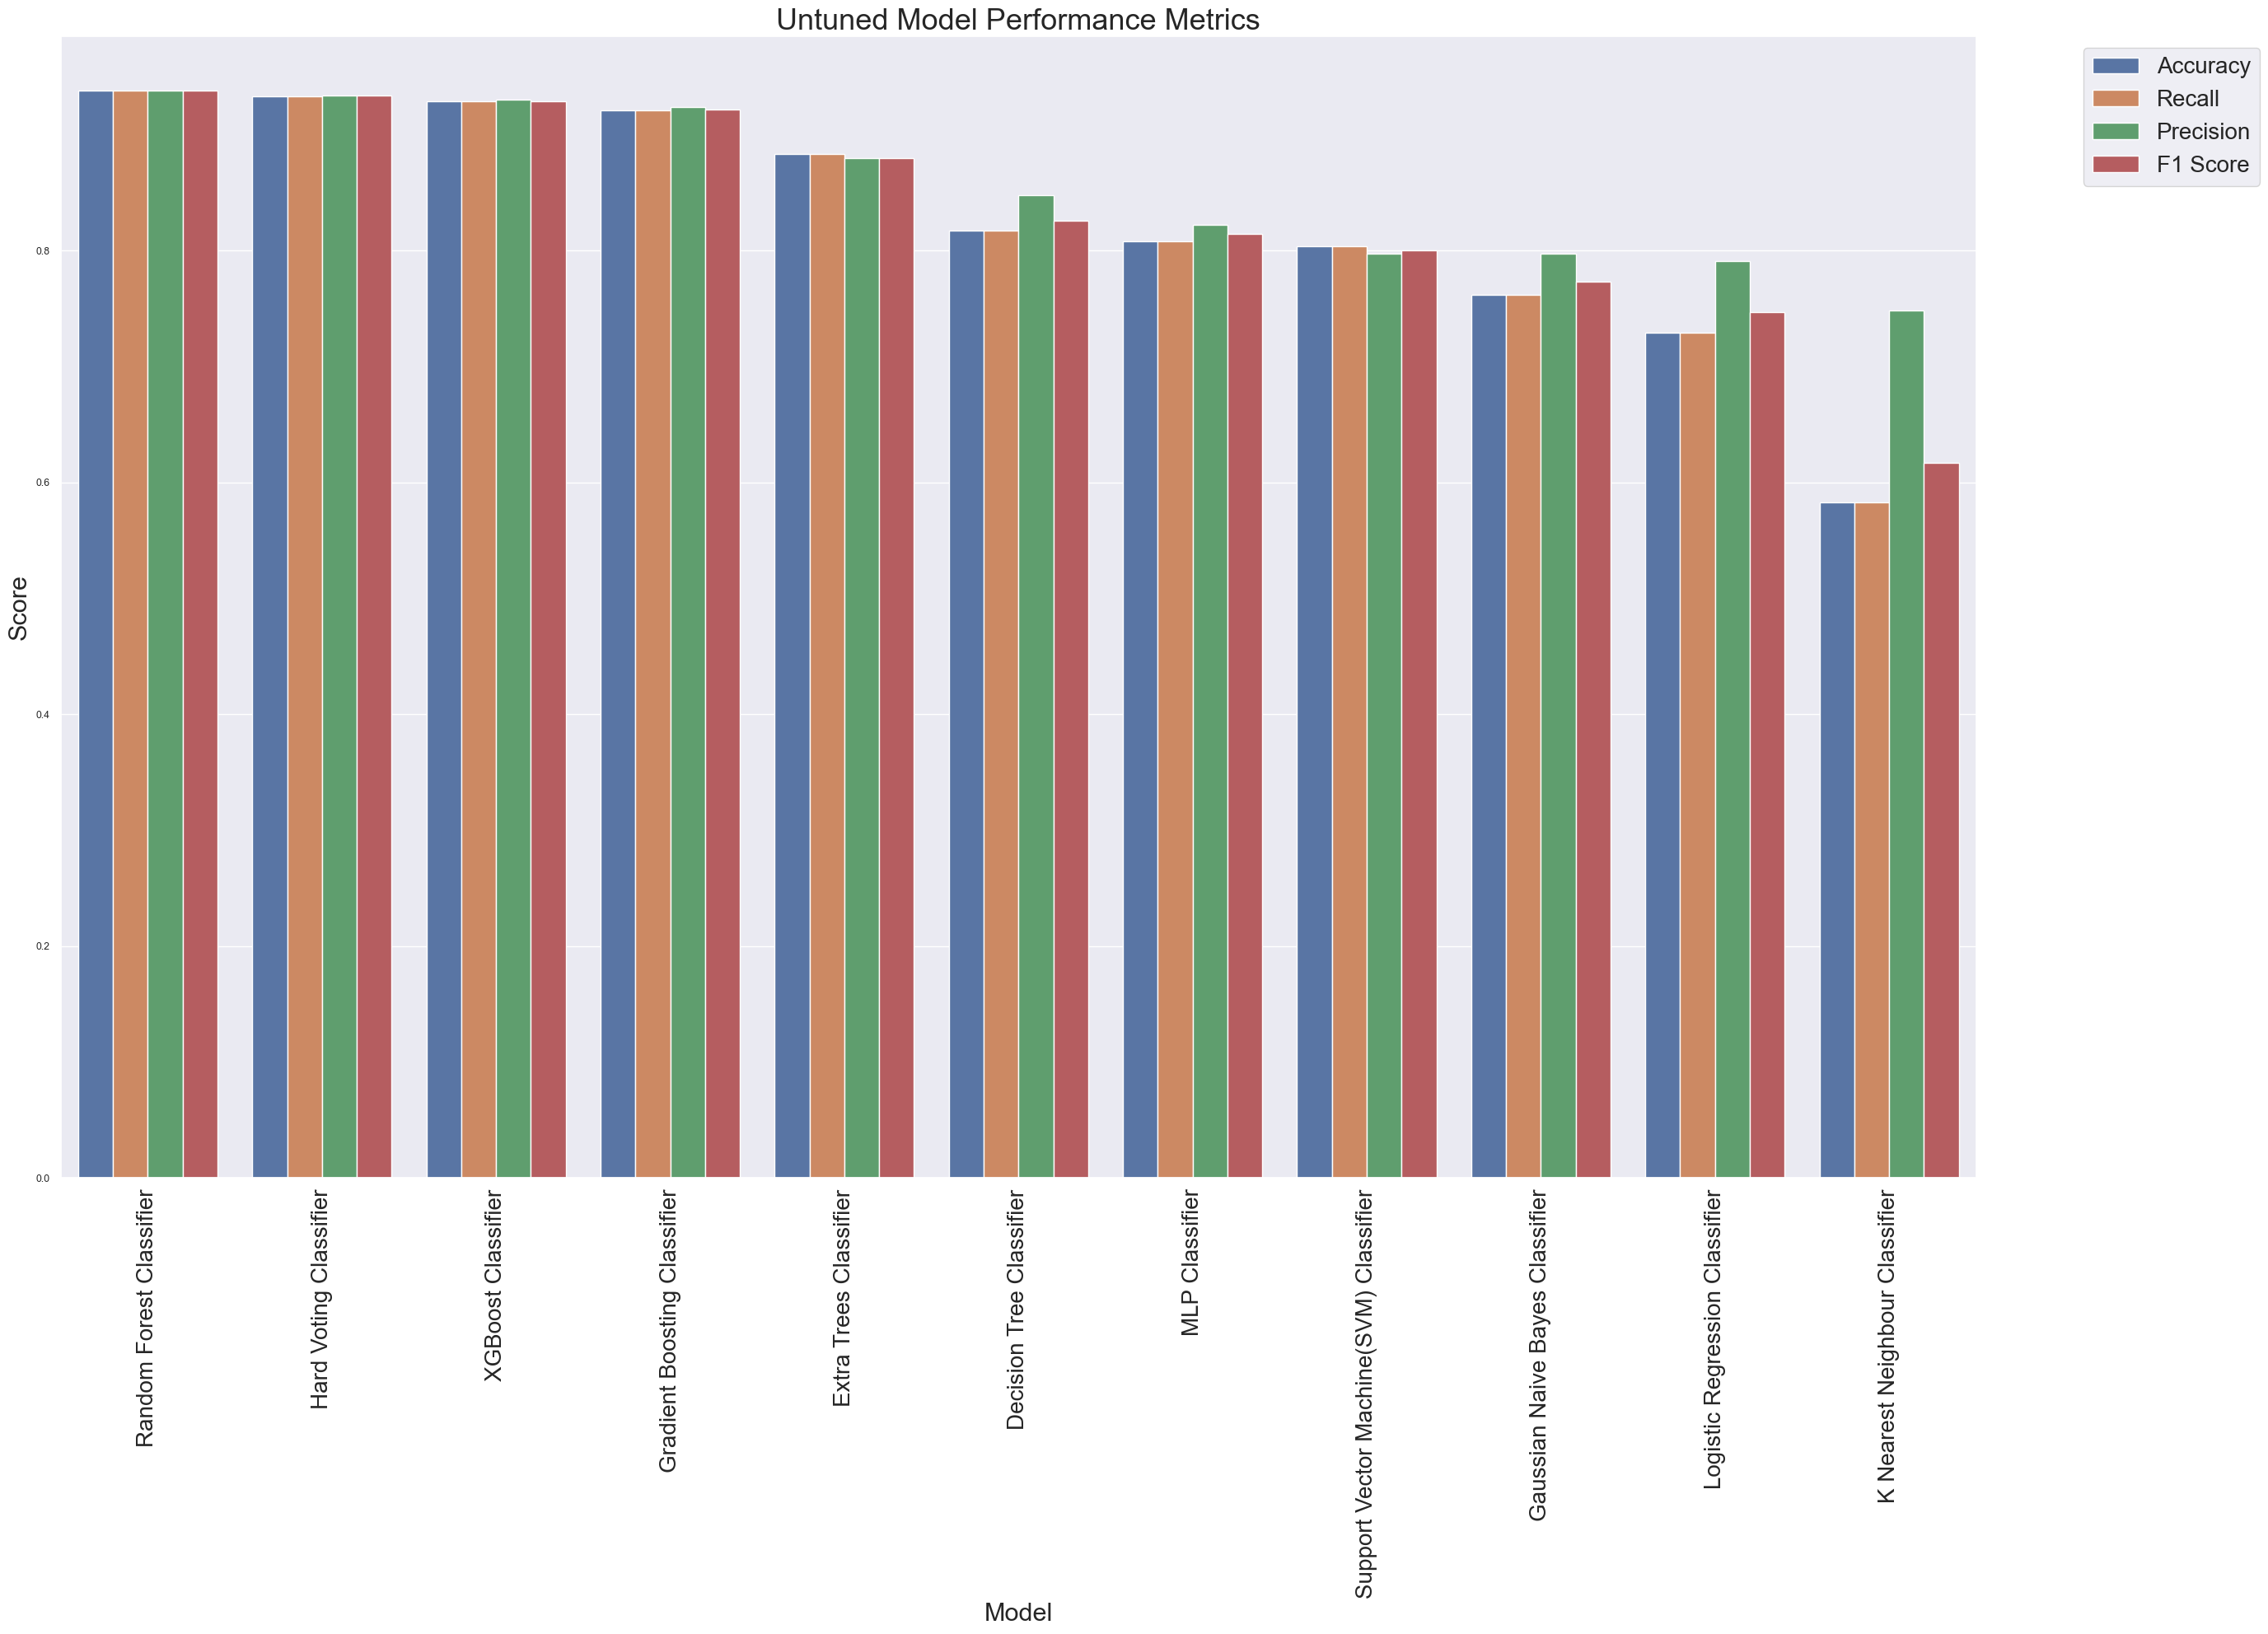

In [92]:
# Plot the Untuned Models' performance metrics i.e  Accuracy, Precision, Recall, F1 Score and ROC_AUC Scores
# Melt the DataFrame to have metrics as a single column
df_melted = pd.melt(combined_models_df_sorted_reset, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(30,18))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title('Untuned Model Performance Metrics', fontsize=26)
plt.xlabel('Model', fontsize=22)
plt.ylabel('Score', fontsize=22)
plt.xticks(rotation=90, fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=20, loc='upper left')
plt.show()

**Inferences:**

1. Top Performers:
    - Random Forest Classifier, Hard Voting Classifier, XGBoost Classifier, Gradient Boosting Classifier, and Extra Trees Classifier exhibit superior performance across all metrics, consistently achieving high scores in accuracy, recall, precision, and F1 score. These models are robust and well-suited for predicting employee performance ratings.

2. Intermediate Performers:
   - Decision Tree Classifier and Multi-Layer Perceptron Classifier (MLP)  also show good performance but are slightly behind the top-performing models. They are effective but may require further tuning to reach optimal performance levels.

3. Lower Performers:
   - Support Vector Machine (SVM) Classifier, Gaussian Naive Bayes Classifier, Logistic Regression Classifier, and K-Nearest Neighbour Classifier perform relatively lower across all metrics, particularly in recall and F1 score. These models may struggle with imbalanced classes or complex decision boundaries, making them less ideal for this task.


**Conclusion:**
The performance metrics indicate that ensemble methods like the Random Forest Classifier, XGBoost, and the Hard Voting Classifier are the most effective in predicting employee performance ratings. These models balance the trade-offs between accuracy, recall, precision, and F1 score,

# Hyper Parameter Tuning of the Models

In [93]:
%%time
# Define the parameter grid with an expanded range
param_grid2 = {
    'n_neighbors': range(1,20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform Grid Search CV with the expanded parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid2, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search.best_params_
print(best_params_knn)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: total: 2min
Wall time: 2min 39s


In [94]:
KNN_tuned_model = KNeighborsClassifier(**best_params_knn)
KNN_tuned_model.fit(X_train, y_train)
y_pred_KNN_tuned = KNN_tuned_model.predict(X_test)

In [95]:
cm = confusion_matrix(y_test, y_pred_KNN_tuned)

KNN_tuned_Recall = round(recall_score(y_test, y_pred_KNN_tuned, average='weighted'),3)
KNN_tuned_Precision = round(precision_score(y_test, y_pred_KNN_tuned, average='weighted'),3)
KNN_tuned_f1 = round(f1_score(y_test, y_pred_KNN_tuned, average='weighted'),3)
KNN_tuned_accuracy = round(accuracy_score(y_test, y_pred_KNN_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_KNN_tuned))

[[ 24  12   2]
 [ 36 110  33]
 [  4   9  10]]
              precision    recall  f1-score   support

           2       0.38      0.63      0.47        38
           3       0.84      0.61      0.71       179
           4       0.22      0.43      0.29        23

    accuracy                           0.60       240
   macro avg       0.48      0.56      0.49       240
weighted avg       0.71      0.60      0.63       240



In [96]:
KNN_tuned_df = [(KNN_tuned_accuracy, KNN_tuned_Recall, KNN_tuned_Precision, KNN_tuned_f1)]

KNN_tuned_score = pd.DataFrame(data = KNN_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
KNN_tuned_score.insert(0, 'Model', 'Tuned KNN Classifier')
KNN_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned KNN Classifier,0.6,0.6,0.707,0.632


In [97]:
%%time
# Define the parameter grid to search
param_grid_gbc = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform Randomized Search CV with the expanded parameter grid
random_search_gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions=param_grid_gbc, 
                                       n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform the grid search
random_search_gbc.fit(X_train, y_train)

# Get the best parameters
best_params_gbc = random_search_gbc.best_params_
print("Best Parameters:", best_params_gbc)

Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}
CPU times: total: 2.12 s
Wall time: 21.9 s


In [98]:
# Train Gradient Boosting Classifier with the best parameters
GBC_tuned_model = GradientBoostingClassifier(**best_params_gbc, random_state=42)
GBC_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_GBC_tuned = GBC_tuned_model.predict(X_test)

In [99]:
cm = confusion_matrix(y_test, y_pred_GBC_tuned)

GBC_tuned_Recall = round(recall_score(y_test, y_pred_GBC_tuned, average='weighted'),3)
GBC_tuned_Precision = round(precision_score(y_test, y_pred_GBC_tuned, average='weighted'),3)
GBC_tuned_f1 = round(f1_score(y_test, y_pred_GBC_tuned, average='weighted'),3)
GBC_tuned_accuracy = round(accuracy_score(y_test, y_pred_GBC_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_GBC_tuned))

[[ 34   4   0]
 [  5 171   3]
 [  0   4  19]]
              precision    recall  f1-score   support

           2       0.87      0.89      0.88        38
           3       0.96      0.96      0.96       179
           4       0.86      0.83      0.84        23

    accuracy                           0.93       240
   macro avg       0.90      0.89      0.89       240
weighted avg       0.93      0.93      0.93       240



In [100]:
GBC_tuned_df = [(GBC_tuned_accuracy, GBC_tuned_Recall, GBC_tuned_Precision, GBC_tuned_f1)]

GBC_tuned_score = pd.DataFrame(data = GBC_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
GBC_tuned_score.insert(0, 'Model', 'Tuned Gradient Boosting Classifier')
GBC_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned Gradient Boosting Classifier,0.933,0.933,0.933,0.933


In [101]:
%%time
# Define the parameter grid with an expanded range
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Expanded range for regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Added 'newton-cg'
    'max_iter': [50, 100, 200, 300, 400, 500]  # Expanded range for maximum iterations
}

# Perform Grid Search CV with the expanded parameter grid
grid_search_lr = GridSearchCV(LogisticRegression(multi_class='auto'), param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print(best_params_lr)

{'C': 100, 'max_iter': 50, 'solver': 'liblinear'}
CPU times: total: 38.6 s
Wall time: 27.1 s


In [102]:
LR_tuned_model = LogisticRegression(**best_params_lr, random_state=10)
LR_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_LR_tuned = LR_tuned_model.predict(X_test)

In [103]:
cm = confusion_matrix(y_test, y_pred_LR_tuned)

LR_tuned_Recall = round(recall_score(y_test, y_pred_LR_tuned, average='weighted'),3)
LR_tuned_Precision = round(precision_score(y_test, y_pred_LR_tuned, average='weighted'),3)
LR_tuned_f1 = round(f1_score(y_test, y_pred_LR_tuned, average='weighted'),3)
LR_tuned_accuracy = round(accuracy_score(y_test, y_pred_LR_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_LR_tuned))

[[ 25   9   4]
 [ 23 136  20]
 [  2   2  19]]
              precision    recall  f1-score   support

           2       0.50      0.66      0.57        38
           3       0.93      0.76      0.83       179
           4       0.44      0.83      0.58        23

    accuracy                           0.75       240
   macro avg       0.62      0.75      0.66       240
weighted avg       0.81      0.75      0.77       240



In [104]:
LR_tuned_df = [(LR_tuned_accuracy, LR_tuned_Recall, LR_tuned_Precision, LR_tuned_f1)]

LR_tuned_score = pd.DataFrame(data = LR_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
LR_tuned_score.insert(0, 'Model', 'Tuned Logistic Regression Classifier')
LR_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned Logistic Regression Classifier,0.75,0.75,0.812,0.767


In [105]:
%%time
# Define the parameter grid for Random Forest

param_grid_rf=[{'min_samples_split':[1,2,3,4,5],'n_estimators': [20, 25, 30, 35, 40, 50, 100, 150],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

rf_classifier=RandomForestClassifier(random_state=42)
# Perform Grid Search CV with Random Forest
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=10, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
CPU times: total: 8.09 s
Wall time: 1min 26s


In [106]:
RFC_tuned = RandomForestClassifier(**best_params_rf,random_state=42)
RFC_tuned.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_RFC_tuned = RFC_tuned.predict(X_test)

In [107]:
cm = confusion_matrix(y_test, y_pred_RFC_tuned)

RFC_tuned_Recall = round(recall_score(y_test, y_pred_RFC_tuned, average='weighted'),3)
RFC_tuned_Precision = round(precision_score(y_test, y_pred_RFC_tuned, average='weighted'),3)
RFC_tuned_f1 = round(f1_score(y_test, y_pred_RFC_tuned, average='weighted'),3)
RFC_tuned_accuracy = round(accuracy_score(y_test, y_pred_RFC_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_RFC_tuned))

[[ 35   3   0]
 [  4 169   6]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.88      0.92      0.90        38
           3       0.96      0.94      0.95       179
           4       0.75      0.78      0.77        23

    accuracy                           0.93       240
   macro avg       0.86      0.88      0.87       240
weighted avg       0.93      0.93      0.93       240



In [108]:
RFC_tuned_df = [(RFC_tuned_accuracy, RFC_tuned_Recall, RFC_tuned_Precision, RFC_tuned_f1)]

RFC_tuned_score = pd.DataFrame(data = RFC_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
RFC_tuned_score.insert(0, 'Model', 'Tuned Random Forest Classifier')
RFC_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned Random Forest Classifier,0.925,0.925,0.927,0.926


In [109]:
%%time
# Support Machine Classifier with hyperparameter
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Perform Randomized Search CV with the expanded parameter grid
random_search_svm = GridSearchCV(estimator = SVC(random_state=10), param_grid=param_grid_svm,cv=3, scoring='accuracy', n_jobs=-1)
random_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = random_search_svm.best_params_
print(best_params_svm)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
CPU times: total: 469 ms
Wall time: 6.72 s


In [110]:
SVM_tuned_model = SVC(**best_params_svm, random_state=10)
SVM_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_SVM_tuned = SVM_tuned_model.predict(X_test)

In [111]:
cm = confusion_matrix(y_test, y_pred_SVM_tuned)

SVM_tuned_Recall = round(recall_score(y_test, y_pred_SVM_tuned, average='weighted'),3)
SVM_tuned_Precision = round(precision_score(y_test, y_pred_SVM_tuned, average='weighted'),3)
SVM_tuned_f1 = round(f1_score(y_test, y_pred_SVM_tuned, average='weighted'),3)
SVM_tuned_accuracy = round(accuracy_score(y_test, y_pred_SVM_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_SVM_tuned))

[[  8  30   0]
 [  7 170   2]
 [  0  16   7]]
              precision    recall  f1-score   support

           2       0.53      0.21      0.30        38
           3       0.79      0.95      0.86       179
           4       0.78      0.30      0.44        23

    accuracy                           0.77       240
   macro avg       0.70      0.49      0.53       240
weighted avg       0.75      0.77      0.73       240



In [112]:
SVM_tuned_df = [(SVM_tuned_accuracy, SVM_tuned_Recall, SVM_tuned_Precision, SVM_tuned_f1)]

SVM_tuned_score = pd.DataFrame(data = SVM_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
SVM_tuned_score.insert(0, 'Model', 'Tuned SVM Classifier')
SVM_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned SVM Classifier,0.771,0.771,0.746,0.732


In [113]:
%%time
# Define the expanded parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(100,100,100)],
    'learning_rate_init' : [0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [2000],  # Add max_iter parameter
    'early_stopping': [True, False],  # Add early_stopping parameter
}

# Perform Grid Search CV with the expanded parameter grid
random_search_mlp = GridSearchCV(estimator=MLPClassifier(random_state=10),
                                 param_grid=param_grid_mlp,
                                 cv=5,
                                 n_jobs=-1,
                                 scoring='accuracy')

# Fit the model
random_search_mlp.fit(X_train, y_train)

# Get the best parameters
best_params_mlp = random_search_mlp.best_params_
print(best_params_mlp)

{'early_stopping': False, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 2000}
CPU times: total: 2.94 s
Wall time: 6.39 s


In [114]:
MLP_tuned_model = MLPClassifier(**best_params_mlp, random_state=10)
MLP_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_MLP_tuned = MLP_tuned_model.predict(X_test)

In [115]:
cm = confusion_matrix(y_test, y_pred_MLP_tuned)

MLP_tuned_Recall = round(recall_score(y_test, y_pred_MLP_tuned, average='weighted'),3)
MLP_tuned_Precision = round(precision_score(y_test, y_pred_MLP_tuned, average='weighted'),3)
MLP_tuned_f1 = round(f1_score(y_test, y_pred_MLP_tuned, average='weighted'),3)
MLP_tuned_accuracy = round(accuracy_score(y_test, y_pred_MLP_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_MLP_tuned))

[[ 26   9   3]
 [ 17 153   9]
 [  0   8  15]]
              precision    recall  f1-score   support

           2       0.60      0.68      0.64        38
           3       0.90      0.85      0.88       179
           4       0.56      0.65      0.60        23

    accuracy                           0.81       240
   macro avg       0.69      0.73      0.71       240
weighted avg       0.82      0.81      0.81       240



In [116]:
MLP_tuned_df = [(MLP_tuned_accuracy, MLP_tuned_Recall, MLP_tuned_Precision, MLP_tuned_f1)]

MLP_tuned_score = pd.DataFrame(data = MLP_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
MLP_tuned_score.insert(0, 'Model', 'Tuned MLP Classifier')
MLP_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned MLP Classifier,0.808,0.808,0.82,0.813


In [117]:
%%time

# Define the parameter grid
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# Perform Grid Search CV
grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Get the best parameters
best_params_nb = grid_search_nb.best_params_

print("Best Parameters:", best_params_nb)

Best Parameters: {'var_smoothing': 0.001}
CPU times: total: 422 ms
Wall time: 270 ms


In [118]:
GNB_tuned_model = GaussianNB(**best_params_nb)
GNB_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_GNB_tuned = GNB_tuned_model.predict(X_test)

In [119]:
cm = confusion_matrix(y_test, y_pred_GNB_tuned)

GNB_tuned_Recall = round(recall_score(y_test, y_pred_GNB_tuned, average='weighted'),3)
GNB_tuned_Precision = round(precision_score(y_test, y_pred_GNB_tuned, average='weighted'),3)
GNB_tuned_f1 = round(f1_score(y_test, y_pred_GNB_tuned, average='weighted'),3)
GNB_tuned_accuracy = round(accuracy_score(y_test, y_pred_GNB_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_GNB_tuned))

[[ 23  15   0]
 [ 13 142  24]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.62      0.61      0.61        38
           3       0.88      0.79      0.84       179
           4       0.43      0.78      0.55        23

    accuracy                           0.76       240
   macro avg       0.64      0.73      0.67       240
weighted avg       0.80      0.76      0.77       240



In [120]:
GNB_tuned_df = [(GNB_tuned_accuracy, GNB_tuned_Recall, GNB_tuned_Precision, GNB_tuned_f1)]

GNB_tuned_score = pd.DataFrame(data = GNB_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
GNB_tuned_score.insert(0, 'Model', 'Tuned GNB Classifier')
GNB_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned GNB Classifier,0.762,0.762,0.797,0.773


In [121]:
%%time
# Define the XGB parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [25, 50, 100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 10, 12, 15, 20],
    'min_child_weight': [1, 2, 3, 4, 5]
}
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
# Perform Randomized Search CV with XGBoost
random_search_xgb = RandomizedSearchCV(XGBClassifier(random_state=42), param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='accuracy')
random_search_xgb.fit(X_train, y_train_xgb)

# Get the best parameters
best_params_xgb = random_search_xgb.best_params_
print(best_params_xgb)

{'n_estimators': 300, 'min_child_weight': 2, 'max_depth': 12, 'learning_rate': 0.1}
CPU times: total: 40min 26s
Wall time: 4min 33s


In [122]:
XGB_tuned_model = XGBClassifier(**best_params_xgb,random_state=42)
XGB_tuned_model.fit(X_train, y_train_xgb)
#Predict the response for test dataset
y_pred_XGB_tuned = XGB_tuned_model.predict(X_test)
y_pred_XGB_tuned = le.inverse_transform(y_pred_XGB_tuned)

In [123]:
cm = confusion_matrix(y_test, y_pred_XGB_tuned)

XGB_tuned_Recall = round(recall_score(y_test, y_pred_XGB_tuned, average='weighted'),3)
XGB_tuned_Precision = round(precision_score(y_test, y_pred_XGB_tuned, average='weighted'),3)
XGB_tuned_f1 = round(f1_score(y_test, y_pred_XGB_tuned, average='weighted'),3)
XGB_tuned_accuracy = round(accuracy_score(y_test, y_pred_XGB_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_XGB_tuned))

[[ 35   3   0]
 [  3 170   6]
 [  0   4  19]]
              precision    recall  f1-score   support

           2       0.92      0.92      0.92        38
           3       0.96      0.95      0.96       179
           4       0.76      0.83      0.79        23

    accuracy                           0.93       240
   macro avg       0.88      0.90      0.89       240
weighted avg       0.94      0.93      0.93       240



In [124]:
XGB_tuned_df = [(XGB_tuned_accuracy, XGB_tuned_Recall, XGB_tuned_Precision, XGB_tuned_f1)]

XGB_tuned_score = pd.DataFrame(data = XGB_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
XGB_tuned_score.insert(0, 'Model', 'Tuned XGBoost Classifier')
XGB_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned XGBoost Classifier,0.933,0.933,0.935,0.934


In [125]:
%%time
# Decision Tree classifier with hyperparameter
clf_dt = DecisionTreeClassifier()

# Define an expanded parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Randomized Search CV with the expanded parameter grid
random_search_dt = RandomizedSearchCV(clf_dt, param_distributions=param_grid_dt, cv=10, scoring='accuracy', n_jobs=-1)
random_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = random_search_dt.best_params_
print(best_params_dt)

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
CPU times: total: 62.5 ms
Wall time: 382 ms


In [126]:
DTC_tuned = DecisionTreeClassifier(**best_params_dt, random_state=42)
DTC_tuned.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_DTC_tuned = DTC_tuned.predict(X_test)

In [127]:
cm = confusion_matrix(y_test, y_pred_DTC_tuned)

DTC_tuned_Recall = round(recall_score(y_test, y_pred_DTC_tuned, average='weighted'),3)
DTC_tuned_Precision = round(precision_score(y_test, y_pred_DTC_tuned, average='weighted'),3)
DTC_tuned_f1 = round(f1_score(y_test, y_pred_DTC_tuned, average='weighted'),3)
DTC_tuned_accuracy = round(accuracy_score(y_test, y_pred_DTC_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_DTC_tuned))

[[ 36   2   0]
 [ 10 156  13]
 [  3   4  16]]
              precision    recall  f1-score   support

           2       0.73      0.95      0.83        38
           3       0.96      0.87      0.91       179
           4       0.55      0.70      0.62        23

    accuracy                           0.87       240
   macro avg       0.75      0.84      0.79       240
weighted avg       0.89      0.87      0.87       240



In [128]:
DTC_tuned_df = [(DTC_tuned_accuracy, DTC_tuned_Recall, DTC_tuned_Precision, DTC_tuned_f1)]

DTC_tuned_score = pd.DataFrame(data = DTC_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
DTC_tuned_score.insert(0, 'Model', 'Tuned Decision Tree Classifier')
DTC_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned Decision Tree Classifier,0.867,0.867,0.887,0.872


In [129]:
%%time
from scipy.stats import randint
# Define the parameter grid for Extra Trees Classifier
params_etc = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None] + list(range(10, 110, 10)),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Perform Randomized Search CV with Extra Trees Classifier
random_search_ETC = RandomizedSearchCV(ExtraTreesClassifier(random_state=42), param_distributions=params_etc, n_iter=100, cv=5, scoring='accuracy', random_state=10)
random_search_ETC.fit(X_train, y_train)

# Get the best parameters
best_params_ETC = random_search_ETC.best_params_
print(best_params_ETC)

{'bootstrap': False, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 621}
CPU times: total: 4min 51s
Wall time: 5min 37s


In [130]:
ETC_tuned_model = ExtraTreesClassifier(**best_params_ETC,random_state=42)
ETC_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_ETC_tuned = ETC_tuned_model.predict(X_test)

In [131]:
cm = confusion_matrix(y_test, y_pred_ETC_tuned)

ETC_tuned_Recall = round(recall_score(y_test, y_pred_ETC_tuned, average='weighted'),3)
ETC_tuned_Precision = round(precision_score(y_test, y_pred_ETC_tuned, average='weighted'),3)
ETC_tuned_f1 = round(f1_score(y_test, y_pred_ETC_tuned, average='weighted'),3)
ETC_tuned_accuracy = round(accuracy_score(y_test, y_pred_ETC_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_ETC_tuned))

[[ 29   8   1]
 [  8 166   5]
 [  1   6  16]]
              precision    recall  f1-score   support

           2       0.76      0.76      0.76        38
           3       0.92      0.93      0.92       179
           4       0.73      0.70      0.71        23

    accuracy                           0.88       240
   macro avg       0.80      0.80      0.80       240
weighted avg       0.88      0.88      0.88       240



In [132]:
ETC_tuned_df = [(ETC_tuned_accuracy, ETC_tuned_Recall, ETC_tuned_Precision, ETC_tuned_f1)]

ETC_tuned_score = pd.DataFrame(data = ETC_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
ETC_tuned_score.insert(0, 'Model', 'Tuned Extra Trees Classifier')
ETC_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned Extra Trees Classifier,0.879,0.879,0.878,0.879


In [133]:
%%time
from sklearn.ensemble import VotingClassifier

classifiers = [('Tuned XGB Classifier', XGB_tuned_model), ('Tuned GBC Classifier', GBC_tuned_model)]

VC_hard_tuned = VotingClassifier(estimators=classifiers, voting='hard')
VC_hard_tuned.fit(X_train, y_train)

CPU times: total: 10.8 s
Wall time: 3.22 s


VotingClassifier(estimators=[('Tuned XGB Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=N...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=12,
                                            max_leaves=None, min_child_weight=2,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('Tuned GBC Classifier',
                              GradientBoostingClassifier(max_depth=4,
                                                         min_samples_leaf=2,
                                                         random_state=42,
                                                         subsample=0.9))])

In [134]:
y_pred_VC_hard_tuned = VC_hard_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred_VC_hard_tuned)

VC_hard_tuned_Recall = round(recall_score(y_test, y_pred_VC_hard_tuned, average='weighted'),3)
VC_hard_tuned_Precision = round(precision_score(y_test, y_pred_VC_hard_tuned, average='weighted'),3)
VC_hard_tuned_f1 = round(f1_score(y_test, y_pred_VC_hard_tuned, average='weighted'),3)
VC_hard_tuned_accuracy = round(accuracy_score(y_test, y_pred_VC_hard_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_VC_hard_tuned))

[[ 35   3   0]
 [  5 172   2]
 [  0   4  19]]
              precision    recall  f1-score   support

           2       0.88      0.92      0.90        38
           3       0.96      0.96      0.96       179
           4       0.90      0.83      0.86        23

    accuracy                           0.94       240
   macro avg       0.91      0.90      0.91       240
weighted avg       0.94      0.94      0.94       240



In [135]:
VC_hard_tuned_df = [(VC_hard_tuned_accuracy, VC_hard_tuned_Recall, VC_hard_tuned_Precision, VC_hard_tuned_f1)]

VC_hard_tuned_score = pd.DataFrame(data = VC_hard_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
VC_hard_tuned_score.insert(0, 'Model', 'Tuned Hard Voting Classifier')
VC_hard_tuned_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned Hard Voting Classifier,0.942,0.942,0.942,0.942


In [136]:
combined_tuned_models_df = pd.concat([LR_tuned_score, KNN_tuned_score, SVM_tuned_score, RFC_tuned_score, GBC_tuned_score, XGB_tuned_score, MLP_tuned_score,
                               DTC_tuned_score, GNB_tuned_score, ETC_tuned_score, VC_hard_tuned_score], ignore_index=True)
combined_tuned_models_df_sorted = combined_tuned_models_df.sort_values(by=['Accuracy', 'Recall', 'Precision'], ascending=False)
combined_tuned_models_df_sorted_reset = combined_tuned_models_df_sorted.reset_index(drop=True)
combined_tuned_models_df_sorted_reset

,Model,Accuracy,Recall,Precision,F1 Score
0,Tuned Hard Voting Classifier,0.942,0.942,0.942,0.942
1,Tuned XGBoost Classifier,0.933,0.933,0.935,0.934
2,Tuned Gradient Boosting Classifier,0.933,0.933,0.933,0.933
3,Tuned Random Forest Classifier,0.925,0.925,0.927,0.926
4,Tuned Extra Trees Classifier,0.879,0.879,0.878,0.879
5,Tuned Decision Tree Classifier,0.867,0.867,0.887,0.872
6,Tuned MLP Classifier,0.808,0.808,0.820,0.813
7,Tuned SVM Classifier,0.771,0.771,0.746,0.732
8,Tuned GNB Classifier,0.762,0.762,0.797,0.773
9,Tuned Logistic Regression Classifier,0.750,0.750,0.812,0.767


**1. Top Performing Models**

1. Tuned Hard Voting Classifier:
- Accuracy: 0.942
- Recall: 0.942
- Precision: 0.943
- F1 Score: 0.942

***Analysis:*** This ensemble method, which combines predictions from multiple models, has the highest performance across all metrics. It balances high precision and recall, making it excellent at minimizing both false positives and false negatives.

2. Tuned Gradient Boosting Classifier:
- Accuracy: 0.933
- Recall: 0.933
- Precision: 0.933
- F1 Score: 0.933

***Analysis:*** A close second, this model excels in accuracy and F1 score, indicating it is effective in handling complex patterns in the data.

3. Tuned XGBoost Classifier:
- Accuracy: 0.925
- Recall: 0.925
- Precision: 0.929
- F1 Score: 0.926

***Analysis:*** XGBoost is known for its robustness and speed. The slightly higher precision indicates fewer false positives compared to recall, making it a strong candidate for deployment where false positives are costly.

4. Tuned Random Forest Classifier:
- Accuracy: 0.925
- Recall: 0.925
- Precision: 0.927
- F1 Score: 0.926

***Analysis:*** Similar to XGBoost, but with slightly lower precision, this model is also highly reliable. The performance is stable, and it works well with diverse data.

**2. Moderate Performing Models**

1. Tuned Extra Trees Classifier:
- Accuracy: 0.879
- Recall: 0.879
- Precision: 0.878
- F1 Score: 0.879

***Analysis:*** This model is less accurate than the top models but still provides a good balance between recall and precision, making it a viable choice for certain scenarios.

2. Tuned Decision Tree Classifier:
- Accuracy: 0.854
- Recall: 0.854
- Precision: 0.870
- F1 Score: 0.859

***Analysis:*** A simpler model, decision trees tend to overfit, which might explain the lower scores. However, it has decent precision, indicating that when it makes a positive prediction, it's often correct.

3. Tuned MLP Classifier:
- Accuracy: 0.808
- Recall: 0.808
- Precision: 0.820
- F1 Score: 0.813

***Analysis:*** As a neural network model, it shows moderate performance. It's versatile but might require more tuning or a different architecture to match the performance of ensemble methods.

**3. Lower Performing Models**
1. Tuned SVM Classifier:
- Accuracy: 0.771
- Recall: 0.771
- Precision: 0.746
- F1 Score: 0.732

***Analysis:*** Support Vector Machines are powerful, but the performance here suggests the model may struggle with complex or overlapping data classes, leading to lower precision.

2. Tuned GNB Classifier:
- Accuracy: 0.762
- Recall: 0.762
- Precision: 0.797
- F1 Score: 0.773

***Analysis:*** Naive Bayes is typically fast and good for large datasets, but the assumption of feature independence might not hold, leading to lower accuracy and recall.

3. Tuned Logistic Regression Classifier:
- Accuracy: 0.750
- Recall: 0.750
- Precision: 0.812
- F1 Score: 0.767

***Analysis:*** Logistic Regression is a baseline model, and the results reflect that it's less effective at capturing complex relationships in the data.

4. Tuned KNN Classifier:
- Accuracy: 0.600
- Recall: 0.600
- Precision: 0.707
- F1 Score: 0.632

***Analysis:*** K-Nearest Neighbors has the lowest performance, likely due to its sensitivity to noisy data and the curse of dimensionality. It struggles with recall and F1 score, indicating it is less reliable for this task.

##### **Overall Insights**
- **Ensemble Methods:** The top-performing models are ensemble methods (Hard Voting, Gradient Boosting, XGBoost, Random Forest), which leverage the strengths of multiple models to achieve superior performance.
- **Feature Engineering and Tuning:** The drop in performance from the top models to others like MLP, SVM, and GNB suggests that further feature engineering or hyperparameter tuning might be needed for these models to perform better.
- **Deployment Consideration:** Given the high accuracy and balanced metrics, Tuned Hard Voting Classifier and Tuned XGBoost Classifier are recommended for deployment. These models are not only accurate but also balanced in recall and precision, making them suitable for environments where both false positives and false negatives need to be minimized.

**Conclusion**
The analysis clearly identifies the Tuned Hard Voting Classifier and Tuned XGBoost Classifier as the best models for this classification task, offering a balanced and robust performance. These models should be prioritized for real-world deployment, while others might need further tuning to be considered as alternatives.

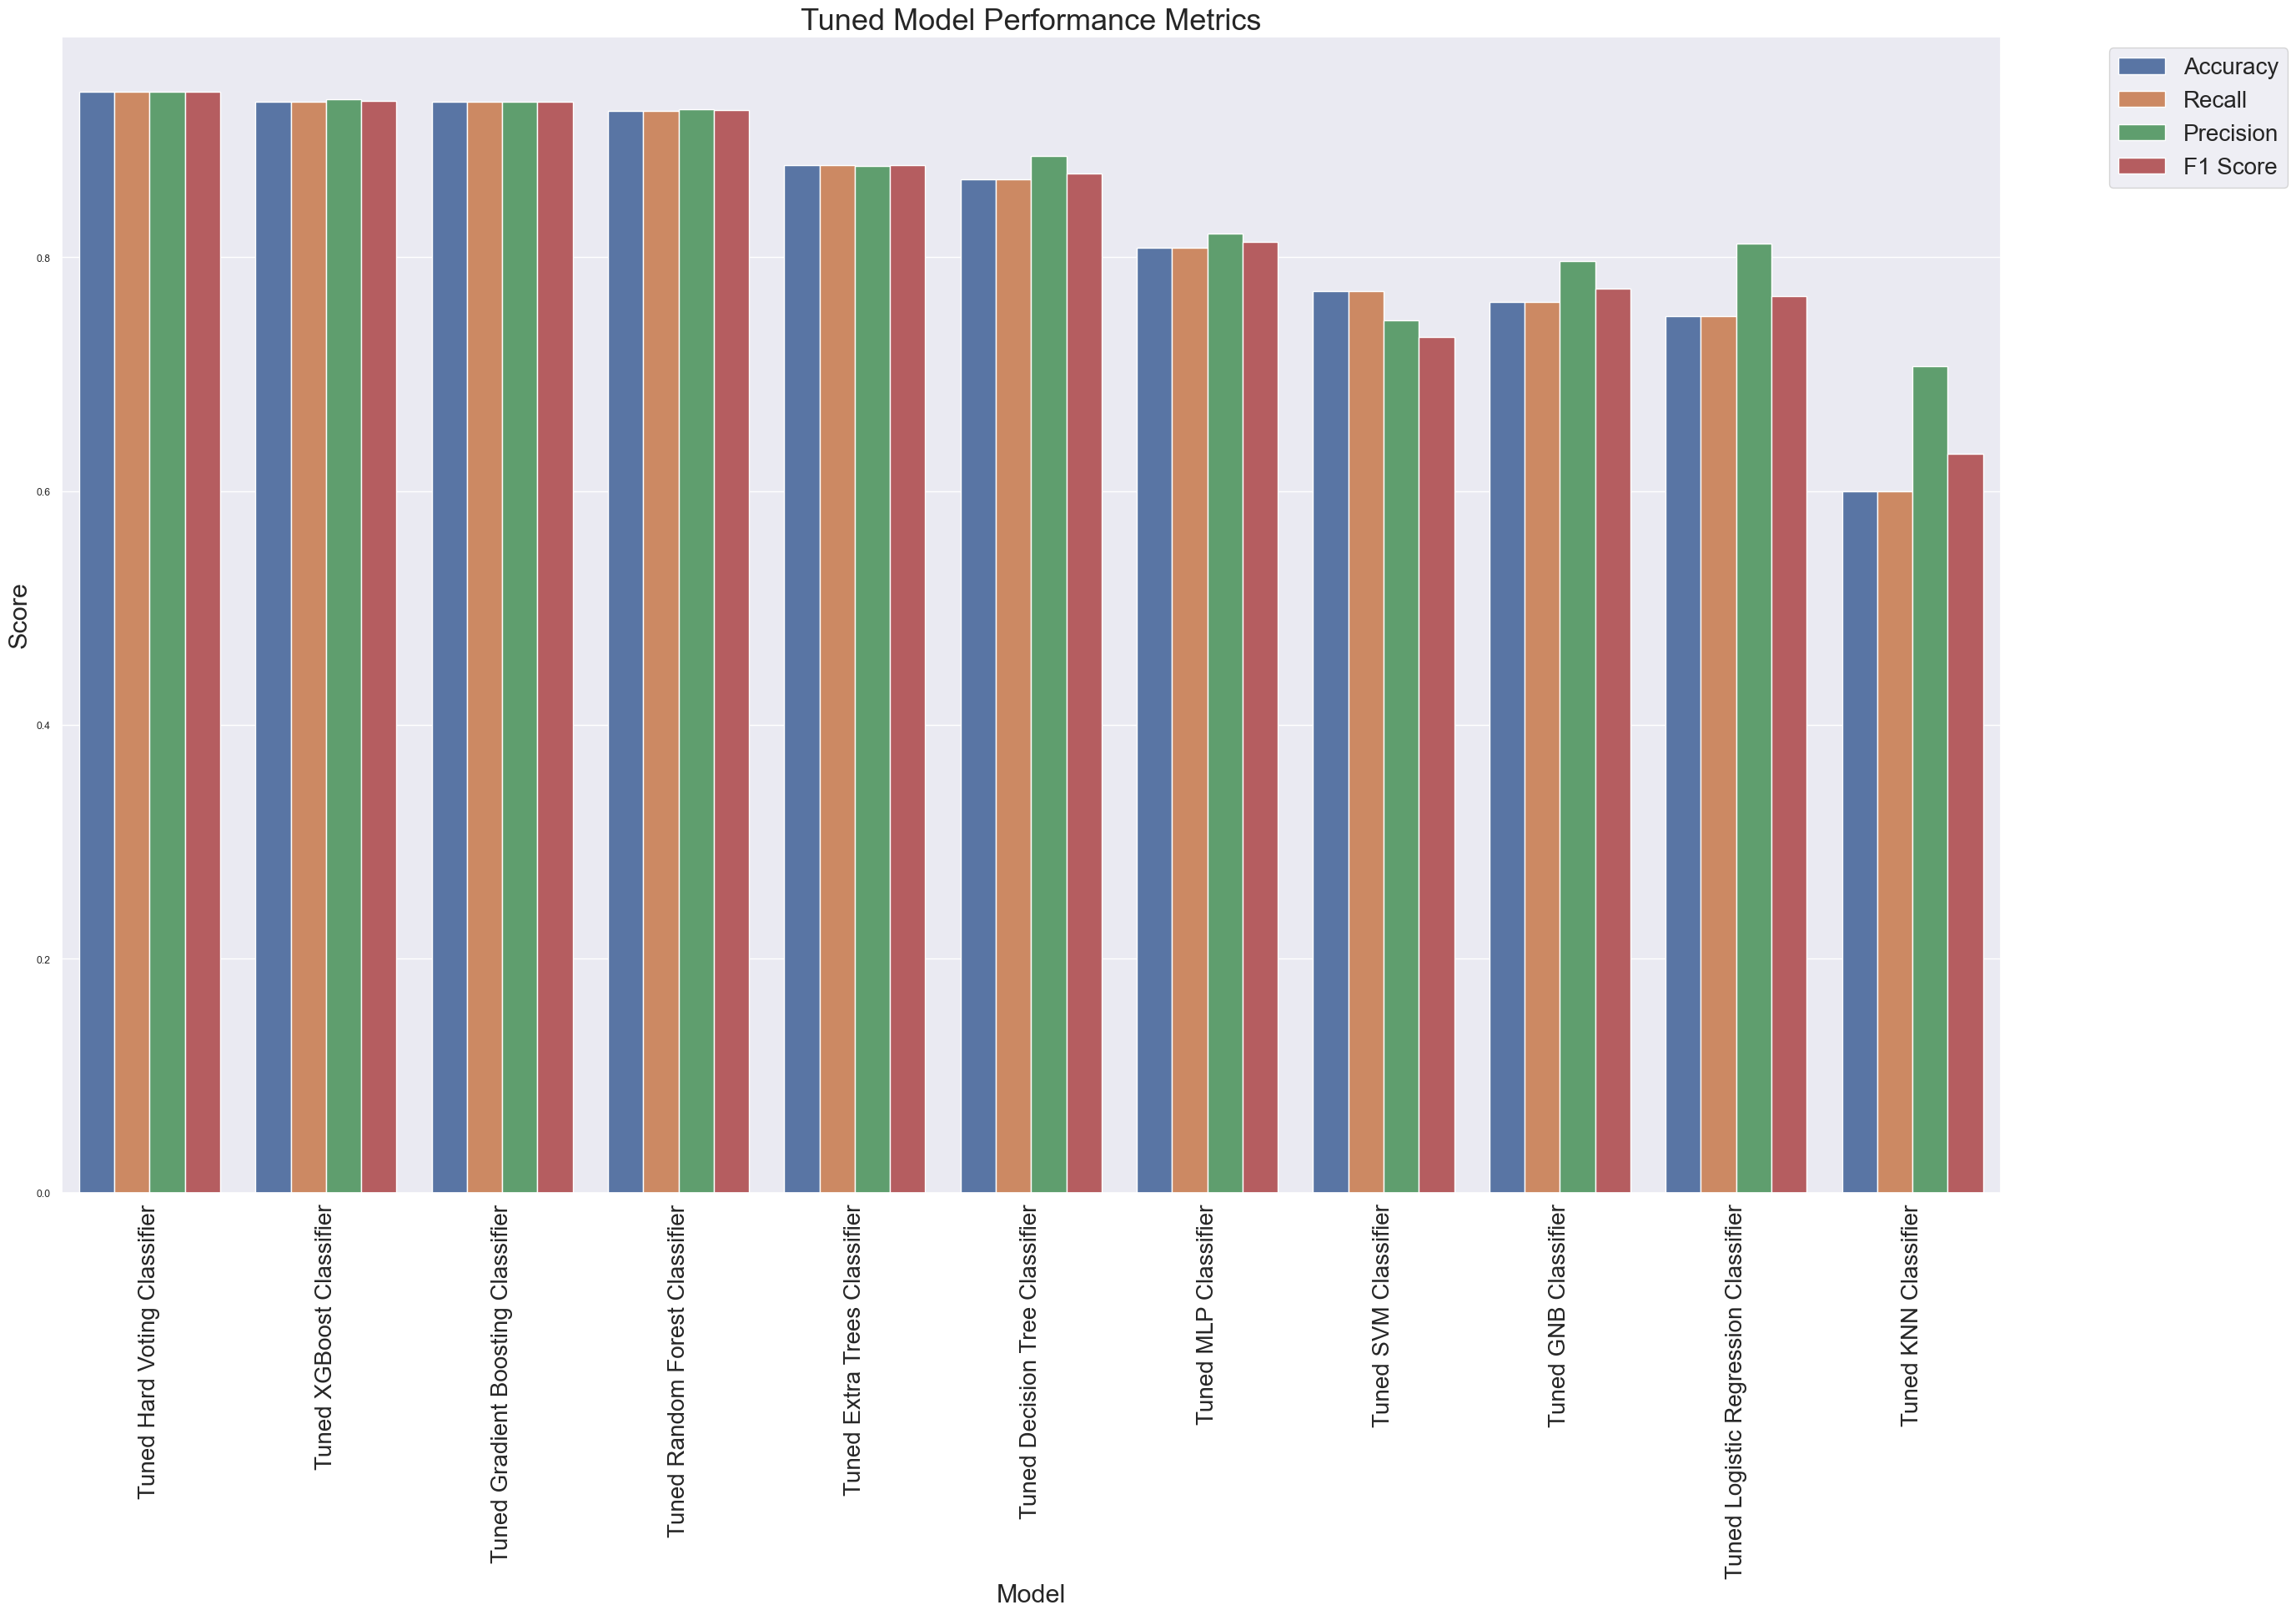

In [137]:
# Plot the Tuned Models' performance metrics i.e  Accuracy, Precision, Recall, F1 Score and ROC_AUC Scores
# Melt the DataFrame to have metrics as a single column
df_melted = pd.melt(combined_tuned_models_df_sorted_reset, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(30,18))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title('Tuned Model Performance Metrics', fontsize=26)
plt.xlabel('Model', fontsize=22)
plt.ylabel('Score', fontsize=22)
plt.xticks(rotation=90, fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=20, loc='upper left')
plt.show()

##### Comprehensive Analysis of Model Performance Metrics
The bar plot you've provided illustrates the performance metrics of several tuned machine learning models on a classification task. The metrics displayed include Accuracy, Recall, Precision, and F1 Score for each model. 
Here's a breakdown of the analysis:

1. **Model Comparisons**
- High-Performing Models:
  * Tuned Hard Voting Classifier
  * Tuned XGBoost Classifier
  * Tuned Gradient Boosting Classifier
  * Tuned Random Forest Classifier
  * Tuned Extra Trees Classifier
These models exhibit very high performance across all metrics (Accuracy, Recall, Precision, F1 Score), suggesting that they are well-suited for the classification task.

- Moderate-Performing Models:
  * Tuned Multi-Layer Perceptron Classifier (MLP)
  * Tuned Support Vector Machine (SVM) Classifier
  * Tuned Decision Tree Classifier
  * Tuned Logistic Regression Classifier
These models show a slight dip in performance, particularly in recall and F1 score, compared to the top performers. They may be less effective in handling imbalances in the data or complex patterns.

- Lower-Performing Models:
  * Tuned Gaussian Naive Bayes Classifier
  * Tuned K-Nearest Neighbors (KNN) Classifier
These models show the lowest performance metrics, particularly with a noticeable drop in recall and F1 score. This indicates potential issues with misclassification, especially for the minority class in the dataset.

2. **Metric Analysis**
- Accuracy: Measures the overall correctness of the model's predictions. Most models show high accuracy, indicating that they are generally making correct predictions.
- Recall: Measures the ability of the model to capture all positive instances. Higher recall in top models suggests that they are better at identifying true positives.
- Precision: Measures the ability of the model to make correct positive predictions. High precision indicates fewer false positives, with models like XGBoost, Gradient Boosting, and Random Forest performing particularly well.
- F1 Score: A balance between precision and recall. The highest F1 scores are observed in the models with balanced precision and recall, further reinforcing their reliability.

3. **Insights**
- Model Selection: The Tuned, Hard Voting Classifier, Gradient Boosting Classifier, XGBoost Classifier, and Random Forest Classifier appear to be the best choices given their superior performance across all metrics. These models should be prioritized for further deployment and fine-tuning.
- Performance Trade-offs: For applications where recall is more critical (e.g., identifying all instances of attrition), models with higher recall should be chosen, even if precision slightly decreases.
- Deployment: The top-performing models are robust and would likely perform well in real-world scenarios. For this project Hard Voting Classifier was selected for deployment.


### **Justification of choosing Hard Voting Classifier Model to Deploy**

##### Comparison Between Tuned and Untuned Models:
- **Improvement Through Tuning:**
 * Hard Voting Classifier, Gradient Boosting Classifier, XGBoost, and Random Forest Classifiers: Noticeable improvements through tuning, especially in recall and F1 scores, suggest that these models benefited significantly from hyperparameter optimization.
 * Decision Tree and Extra Trees Classifiers: Also showed gains but to a lesser extent, indicating possible overfitting in untuned models.

- **Models with Minimal Gain:**
 * Multi-Layer Perceptron Classifier (MLP), Support Vector Machine (SVM) Classifier, and Gaussian Naive Bayes Classifier: Only slight improvements were observed, suggesting that tuning had a limited impact, possibly due to inherent model limitations or robustness to initial settings.
 * K-Nearest Neighbors (KNN) Classifier: Remains the weakest performer in both tuned and untuned scenarios, with tuning only marginally improving its precision while other metrics remain low.

**Conclusion:**
- The analysis suggests that tuning significantly enhances the performance of ensemble methods like Hard Voting, XGBoost, and Random Forest, making them the top choices for predicting employee attrition. These models offer high accuracy and consistency across metrics, making them robust for real-world application.

- However, simpler models like K-Nearest Neighbors (KNN) Classifier and Logistic Regression struggle even with tuning, indicating that they may not be well-suited for this particular dataset or the complexity of the task at hand. Future efforts could focus on further fine-tuning the top-performing models or exploring advanced methods like deep learning for potentially better results.

# Model Deployment

In [138]:
# Select and save the best model which in our case is the Tuned Hard Voting Classifier
filename = 'performance_rating_prediction_model.pkl'
pickle.dump(VC_hard_tuned, open(filename, 'wb'))

The code snippet pickle.dump(VC_hard_tuned, open(filename, 'wb')) is used to save the trained and tuned model (in this case, the Tuned Hard Voting Classifier) to a file using the pickle module. 

**Implications:**
- Persistence of the Model: By saving the model to a file, you can persist the model's state. This allows you to reuse the model later without needing to retrain it, which can save a lot of time, especially if training is computationally expensive.

- Portability: The saved model can be easily shared with others or moved between different environments. For example, you can deploy the model on a server, share it with team members, or use it in different projects.

- Reusability: Once the model is saved, it can be loaded and used for predictions on new data. This is particularly useful in production environments where the model is used to make predictions in real-time or batch processes.

- Version Control: Saving the model with a filename that includes version information or a timestamp allows you to keep track of different iterations of the model. This is helpful for model management and tracking model performance over time.

**Importance:**
- Efficiency: By saving the model, you avoid the need to retrain it every time you want to use it. This can be particularly important when working with large datasets or complex models that take a long time to train.

- Consistency: Once a model is trained and tuned, saving it ensures that the exact same model is used consistently for predictions. This avoids discrepancies that might arise from retraining or tuning the model differently in future sessions.

- Deployment: In a real-world application, models are often deployed to production systems where they need to make predictions on new data. Saving the model is a crucial step in preparing it for deployment.

**In summary, saving the best-performing model ensures that there is a reliable, consistent, and reusable model ready for deployment or further analysis.**

### **Streamlit Script Based on Hard Voting Classifier Model**

In [ ]:
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the saved model
performance_rating_predictor = pickle.load(open("performance_rating_prediction_model.pkl", 'rb'))

# Input fields for the features

# Numerical inputs
age = st.number_input("Enter Age:")
distancefromhome = st.number_input("Enter Distance From Home:")
empeducationlevel = st.number_input("Enter Emp Education Level:")
empenvironmentsatisfaction = st.number_input("Enter Emp Environment Satisfaction:")
emphourlyrate = st.number_input("Enter Emp Hourly Rate:")
empjobinvolvement = st.number_input("Enter Emp Job Involvement:")
empjoblevel = st.number_input("Enter Emp Job Level:")
empjobsatisfaction = st.number_input("Enter Emp Job Satisfaction:")
numcompaniesworked = st.number_input("Enter Number of Companies Worked:")
emplastsalaryhikepercent = st.number_input("Enter Emp Last Salary Hike Percent:")
emprelationshipsatisfaction = st.number_input("Enter Emp Relationship Satisfaction:")
totalworkexperienceinyears = st.number_input("Enter Total Work Experience In Years:")
trainingtimeslastyear = st.number_input("Enter Training Times Last Year:")
empworklifebalance = st.number_input("Enter Emp Work Life Balance:")
experienceyearsatthiscompany = st.number_input("Enter Experience Years At This Company:")
experienceyearsincurrentrole = st.number_input("Enter Experience Years In Current Role:")
yearssincelastpromotion = st.number_input("Enter Years Since Last Promotion:")
yearswithcurrmanager = st.number_input("Enter Years With Current Manager:")

# Categorical inputs using dropdown menus
gender = st.selectbox("Enter Gender:", ['Male', 'Female', 'Other'])
educationbackground = st.selectbox("Enter Education Background:", ['Bachelors', 'Masters', 'PhD', 'Diploma', 'Other'])
maritalstatus = st.selectbox("Enter Marital Status:", ['Single', 'Married', 'Divorced'])
empdepartment = st.selectbox("Enter Emp Department:", ['Sales', 'HR', 'R&D', 'IT', 'Finance', 'Admin'])
empjobrole = st.selectbox("Enter Emp Job Role:", ['Manager', 'Analyst', 'Sales Executive', 'Research Scientist', 'Developer'])
businesstravelfrequency = st.selectbox("Enter Business Travel Frequency:", ['Rarely', 'Frequently', 'Non-Travel'])
overtime = st.selectbox("Enter Overtime:", ['Yes', 'No'])
attrition = st.selectbox("Enter Attrition:", ['Yes', 'No'])

# Collect input in a dictionary
manual_test_input = {
    'age': [age],
    'gender': [gender],
    'educationbackground': [educationbackground],
    'maritalstatus': [maritalstatus],
    'empdepartment': [empdepartment],
    'empjobrole': [empjobrole],
    'businesstravelfrequency': [businesstravelfrequency],
    'distancefromhome': [distancefromhome],
    'empeducationlevel': [empeducationlevel],
    'empenvironmentsatisfaction': [empenvironmentsatisfaction],
    'emphourlyrate': [emphourlyrate],
    'empjobinvolvement': [empjobinvolvement],
    'empjoblevel': [empjoblevel],
    'empjobsatisfaction': [empjobsatisfaction],
    'numcompaniesworked': [numcompaniesworked],
    'overtime': [overtime],
    'emplastsalaryhikepercent': [emplastsalaryhikepercent],
    'emprelationshipsatisfaction': [emprelationshipsatisfaction],
    'totalworkexperienceinyears': [totalworkexperienceinyears],
    'trainingtimeslastyear': [trainingtimeslastyear],
    'empworklifebalance': [empworklifebalance],
    'experienceyearsatthiscompany': [experienceyearsatthiscompany],
    'experienceyearsincurrentrole': [experienceyearsincurrentrole],
    'yearssincelastpromotion': [yearssincelastpromotion],
    'yearswithcurrmanager': [yearswithcurrmanager],
    'attrition': [attrition]
}

# Convert to DataFrame
df_manual_test = pd.DataFrame(manual_test_input)

# Encode categorical variables
numerical_cols = df_manual_test._get_numeric_data().columns
cols = df_manual_test.columns
categorical_cols = list(set(cols) - set(numerical_cols))

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical values
for col in categorical_cols:
    df_manual_test[col] = label_encoder.fit_transform(df_manual_test[col])

# Make a prediction using the model
if st.button("Predict Performance Rating"):
    predicted_performance_rating = performance_rating_predictor.predict(df_manual_test)
    st.write(f"The predicted performance rating is: {predicted_performance_rating[0]}")


### **Summary**

- ***Results, Analysis, and Insights***
     
     **Key Findings**
    - Top Three Features Affecting Performance:
    1. EmpEnvironmentSatisfaction: Employee satisfaction with the work environment significantly influences performance.
    2. EmpLastSalaryHikePercent: The percentage of salary hike is a strong motivator and predictor of performance.
    3. YearsSinceLastPromotion: Time since the last promotion affects performance, with longer intervals correlating with lower ratings.


- ***Business Problem Solutions:***: 
The model effectively predicts employee performance ratings, enabling INX Future Inc. to identify high-performing employees and potential underperformers early, facilitating targeted interventions and rewards with a tool to:
  - Identify high-performing employees for rewards and recognition.
  - Spot potential underperformers early for intervention and support.
  - Make informed decisions regarding promotions, training, and resource allocation.

- ***Additional Business Insights:***
Beyond solving the primary business problem, the analysis uncovered insights into the drivers of employee performance:
  * Focus on Job Satisfaction: Initiatives to enhance job satisfaction, such as improving the work environment, are likely to yield significant improvements in employee performance.
  * Support Work-Life Balance: Encouraging work-life balance can lead to higher productivity and reduced burnout, contributing to better performance ratings.
  * Regular Promotions: Ensuring regular promotions can help maintain employee motivation and performance.

These insights can inform future HR policies and strategies, helping INX Future Inc. maintain its position as a leading employer.

- **Most Important Technique**: 
The most impactful technique used in this project was Ensemble Learning, specifically through the Hard Voting Classifier. This method was pivotal in achieving a robust prediction model by aggregating the strengths of different algorithms, resulting in improved accuracy and reliability. This approach significantly improved prediction accuracy by combining the strengths of different algorithms.
 
- **Model Deployment**: 
A Streamlit application was created to predict employee performance ratings based on the selected model. The model was saved as a pickle file (performance_rating_prediction_model.pkl) and deployed through the Streamlit app, allowing real-time predictions based on user inputs. This will allow Human Resources managers and other stakeholders at INX Future Inc. to interactively input employee data and receive predicted performance ratings. The app is based on the Tuned Hard Voting Classifier model and provides an easy-to-use interface for end-users.


 ### **References**
1. ***Data Dictionaries***
INX Future Inc. Employee Dataset: The dataset included a wide array of features, such as employee demographics, job roles, work satisfaction metrics, and performance ratings. The data dictionary provided definitions and descriptions for each feature, ensuring that the data was correctly understood and appropriately used in the analysis.

2. ***Manuals***
   - Scikit-learn User Guide: This guide was instrumental in implementing machine learning models, including the Voting Classifier and other individual models like RandomForestClassifier, GradientBoostingClassifier, and SVM. It provided detailed information on model parameters, usage examples, and best practices for model evaluation.
   - TensorFlow and Keras Documentation: Used when exploring neural network models for the project. The documentation helped in understanding model architecture, parameter tuning, and deployment strategies.
   - Streamlit Documentation: This manual was used to deploy the predictive model as a web application, providing guidance on building user interfaces, handling user input, and integrating the trained model into the application.
   - YData Profiling Documentation: Provided insights into generating detailed data reports, which helped in the initial exploratory data analysis and feature selection stages.

3. ***Other Explanatory Materials***
    - Pandas and NumPy Documentation: These resources were essential for data manipulation, preprocessing, and feature engineering tasks. They offered comprehensive information on functions and methods used for handling the dataset.
    - Matplotlib and Seaborn Documentation: Utilized for creating visualizations that helped in understanding data distributions, feature correlations, and model performance metrics. These tools were key in communicating findings visually.
   - Plotly Documentation: Used for interactive visualizations, especially during the exploration of complex relationships in the data. The documentation provided the necessary details to implement these interactive plots effectively.
   - Statsmodels and Scipy Documentation: These were referenced for statistical analyses, hypothesis testing, and understanding the relationships between different features in the dataset.

These were crucial in ensuring the project was built on a solid foundation of reliable and well-documented tools and methodologies.


***Website References**
- Scikit-learn Documentation: Official documentation for Scikit-learn, which was used for implementing various machine learning models such as the Voting Classifier, RandomForestClassifier, GradientBoostingClassifier, and others.
URL: https://scikit-learn.org/stable/user_guide.html

- TensorFlow and Keras Documentation: Resources for building and deploying neural network models using TensorFlow and Keras.
URL: https://www.tensorflow.org/guide
URL: https://keras.io/guides/

- Streamlit Documentation: Guide for deploying machine learning models as web applications using Streamlit, particularly relevant for the deployed hard voting classifier model.
URL: https://docs.streamlit.io/

- YData Profiling Documentation: Information on generating detailed data reports using YData Profiling, which was used for the initial data analysis.
URL: https://ydata-profiling.ydata.ai/docs/master/index.html

- Pandas Documentation: Reference for data manipulation and preprocessing tasks performed during the project.
URL: https://pandas.pydata.org/docs/

- NumPy Documentation: Documentation on NumPy, used for numerical operations and handling array data.
URL: https://numpy.org/doc/

- Matplotlib Documentation: Resource for creating static, animated, and interactive visualizations in Python.
URL: https://matplotlib.org/stable/contents.html

- Seaborn Documentation: Guide for generating statistical visualizations with Seaborn, used for exploring data distributions and feature correlations.
URL: https://seaborn.pydata.org/

- Plotly Documentation:Reference for creating interactive visualizations with Plotly, used during the exploration of complex data relationships.
URL: https://plotly.com/python/

- Statsmodels Documentation: Documentation for Statsmodels, used for statistical analysis and hypothesis testing.
URL: https://www.statsmodels.org/stable/index.html

- Scipy Documentation: Resource for scientific and technical computing in Python, including statistical functions used in the project.
URL: https://docs.scipy.org/doc/scipy/

These website references provided a solid foundation for understanding the tools and techniques used for project.








